In [ ]:
import numpy as np
import pandas as pd

import cv2
import os
import shutil
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from keras.models import load_model
from PIL import Image
from tqdm import tqdm

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kaggle-medicine/Training_set.csv')

In [ ]:
df

,filename,label
0,Image_1.jpg,Bioflu
1,Image_2.jpg,Bactidol
2,Image_3.jpg,Fish Oil
3,Image_4.jpg,Fish Oil
4,Image_5.jpg,Bioflu
...,...,...
6995,Image_6996.jpg,Alaxan
6996,Image_6997.jpg,DayZinc
6997,Image_6998.jpg,Medicol
6998,Image_6999.jpg,Bactidol


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  7000 non-null   object
 1   label     7000 non-null   object
dtypes: object(2)
memory usage: 109.5+ KB


In [ ]:
BATCH_SIZE =52
IMAGE_SIZE = 300
CHANNELS=3

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/kaggle-medicine/XYZ",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 7000 files belonging to 10 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Alaxan',
 'Bactidol',
 'Bioflu',
 'Biogesic',
 'DayZinc',
 'Decolgen',
 'Fish Oil',
 'Kremil S',
 'Medicol',
 'Neozep']

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)

(52, 300, 300, 3)


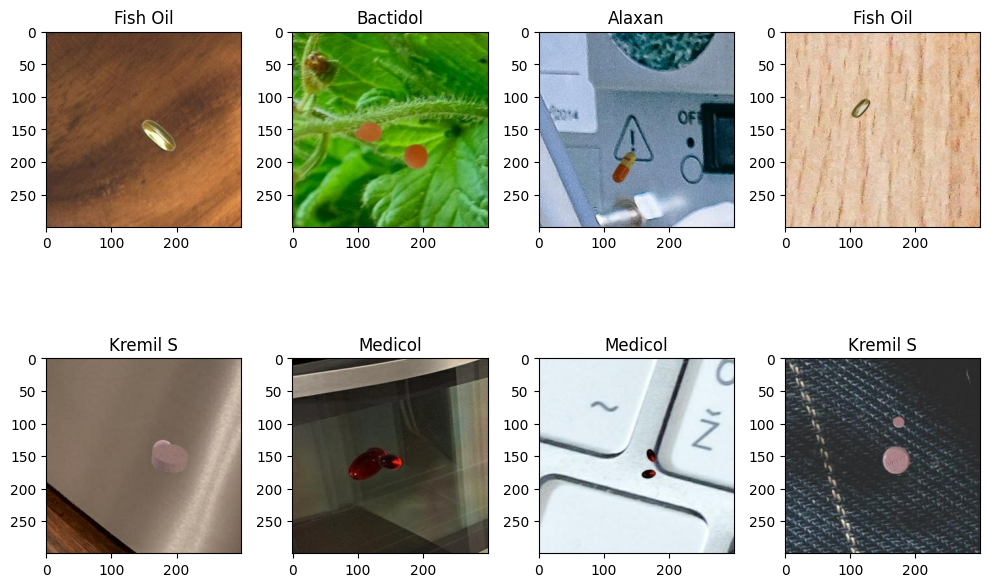

In [ ]:
plt.figure(figsize=(10, 10))
num_images_to_plot = 8

for _ in range(num_images_to_plot):
    image_batch, label_batch = next(iter(dataset))
    num_images_in_batch = image_batch.shape[0]
    random_index = np.random.randint(0, num_images_in_batch)
    ax = plt.subplot(3, 4, _ + 1)
    plt.imshow(image_batch[random_index].numpy().astype('uint8'))
    plt.title(class_names[label_batch[random_index]])

plt.tight_layout()
plt.show()

In [ ]:
def get_data_partition(ds,training_size=0.7,val_size=0.3):

  len_ds=len(ds)
  training=int(len_ds*training_size)
  val=int(len_ds*val_size)
  train_ds=ds.take(training)
  val_ds=ds.skip(training).take(val)

  return train_ds, val_ds

In [ ]:
train_ds, val_ds = get_data_partition(dataset)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
# Apply the resizing and rescaling on train_ds and val_ds
train_ds = train_ds.map(
    lambda x, y: (resize_and_rescale(x, training=True), y)
    )

val_ds= val_ds.map(
    lambda x, y: (resize_and_rescale(x, training=True), y)
    )

# Visualizing the Accuracy of Models by Pretrained saved model and Model History Path

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Function to load the saved model and its training history
def load_model_and_history(model_path, history_path):
    model = tf.keras.models.load_model(model_path)
    history = np.load(history_path, allow_pickle='TRUE').item()
    return model, history

# Paths to saved models and their training history
model1_path = '/content/drive/MyDrive/kaggle-medicine/CNN_model.h5'
model1_history_path = '/content/drive/MyDrive/kaggle-medicine/Visual/CNN_training_history.npy'

model2_path = '/content/drive/MyDrive/kaggle-medicine/Visual/VGG19_model3.h5'
model2_history_path = '/content/drive/MyDrive/kaggle-medicine/Visual/vgg19_training_history3.npy'

model3_path = '/content/drive/MyDrive/kaggle-medicine/Model/Inceptionresnetv2_model.h5'
model3_history_path = '/content/drive/MyDrive/kaggle-medicine/Visual/inceptionresnetv2_training_history.npy'

# Load models and their training history
model1, history1 = load_model_and_history(model1_path, model1_history_path)
model2, history2 = load_model_and_history(model2_path, model2_history_path)
model3, history3 = load_model_and_history(model3_path, model3_history_path)



In [ ]:
# Print validation accuracy for each model
print("Model 1 Validation Accuracy:", history1['val_accuracy'][-1])
print("Model 2 Validation Accuracy:", history2['val_accuracy'][-1])
print("Model 3 Validation Accuracy:", history3['val_accuracy'][-1])

Model 1 Validation Accuracy: 0.9523121118545532
Model 2 Validation Accuracy: 0.8041907548904419
Model 3 Validation Accuracy: 0.8150289058685303


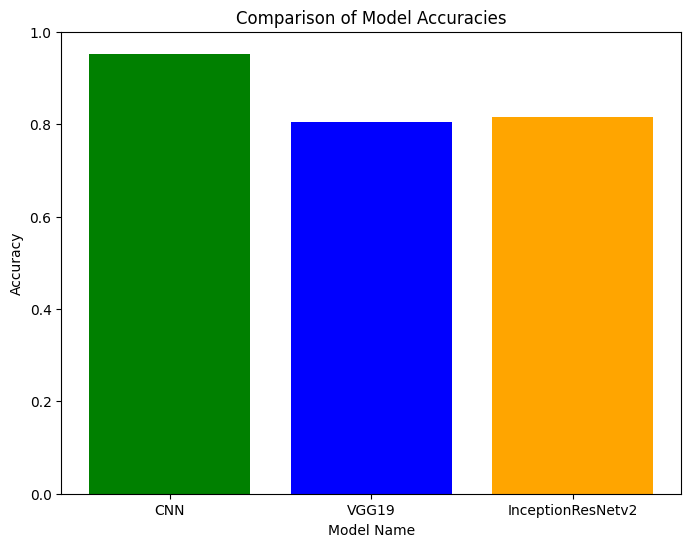

In [ ]:
models = ['CNN','VGG19', 'InceptionResNetv2']
accuracies = [history1['val_accuracy'][-1], history2['val_accuracy'][-1], history3['val_accuracy'][-1]]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=["Green",'blue', 'orange'])
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Limit y-axis to range between 0 and 1
plt.show()

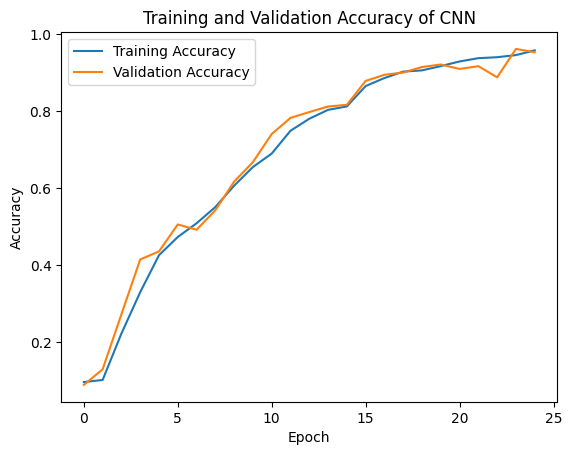

In [ ]:
# Plot training and validation accuracy
plt.plot(history1['accuracy'], label='Training Accuracy')
plt.plot(history1['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy of CNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

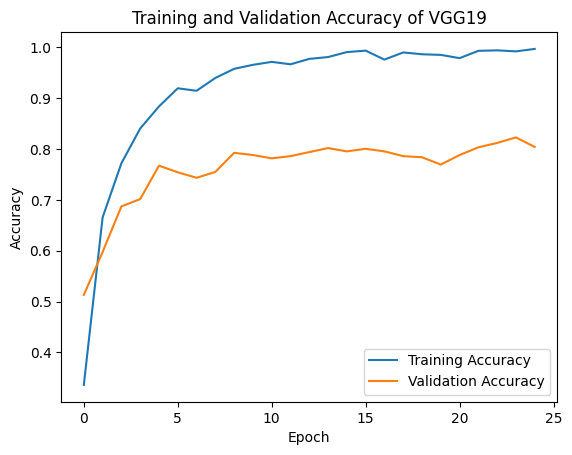

In [ ]:
# Plot training and validation accuracy
plt.plot(history2['accuracy'], label='Training Accuracy')
plt.plot(history2['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy of VGG19')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

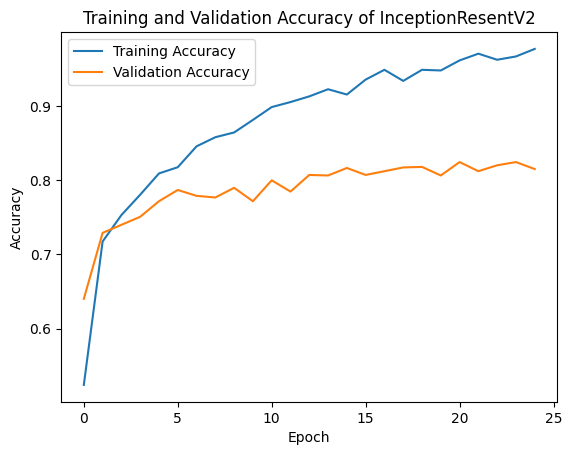

In [ ]:
# Plot training and validation accuracy
plt.plot(history3['accuracy'], label='Training Accuracy')
plt.plot(history3['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy of InceptionResentV2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

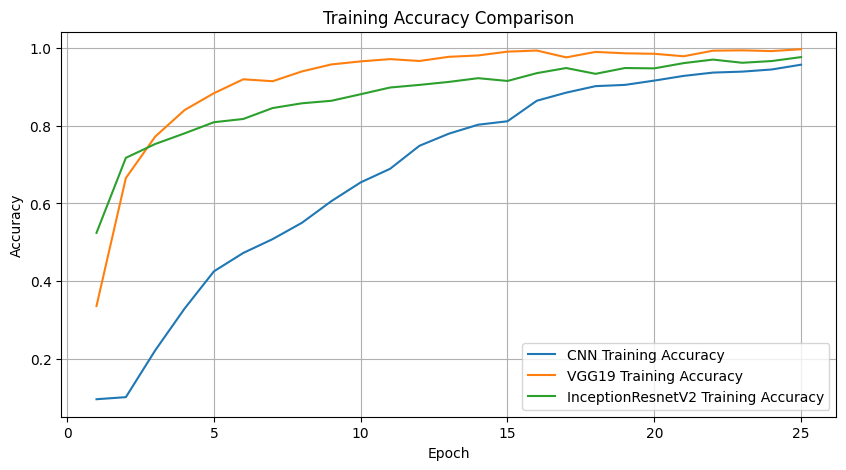

In [ ]:
# Print validation accuracy for each model and plot
plt.figure(figsize=(10, 5))

# Model 1
plt.plot(range(1, len(history1['accuracy']) + 1), history1['accuracy'], label='CNN Training Accuracy')

# Model 2
plt.plot(range(1, len(history2['accuracy']) + 1), history2['accuracy'], label='VGG19 Training Accuracy')

# Model 3
plt.plot(range(1, len(history3['accuracy']) + 1), history3['accuracy'], label='InceptionResnetV2 Training Accuracy')

plt.title('Training Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

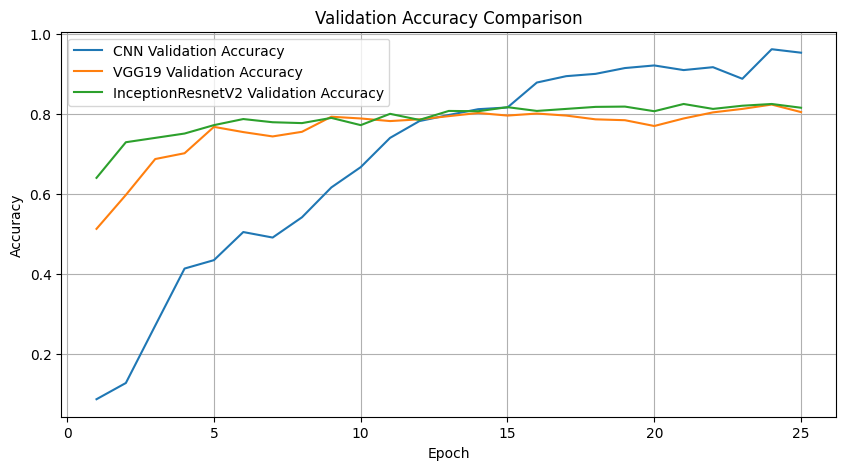

In [ ]:
# Plot validation accuracy for each model
plt.figure(figsize=(10, 5))

# Model 1
plt.plot(range(1, len(history1['val_accuracy']) + 1), history1['val_accuracy'], label='CNN Validation Accuracy')

# Model 2
plt.plot(range(1, len(history2['val_accuracy']) + 1), history2['val_accuracy'], label='VGG19 Validation Accuracy')

# Model 3
plt.plot(range(1, len(history3['val_accuracy']) + 1), history3['val_accuracy'], label='InceptionResnetV2 Validation Accuracy')

plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Predicting the Names of Pharmaceutical Drugs and plotting both the images side by side to cross verify.

1/1 [==============================] - 0s 20ms/step


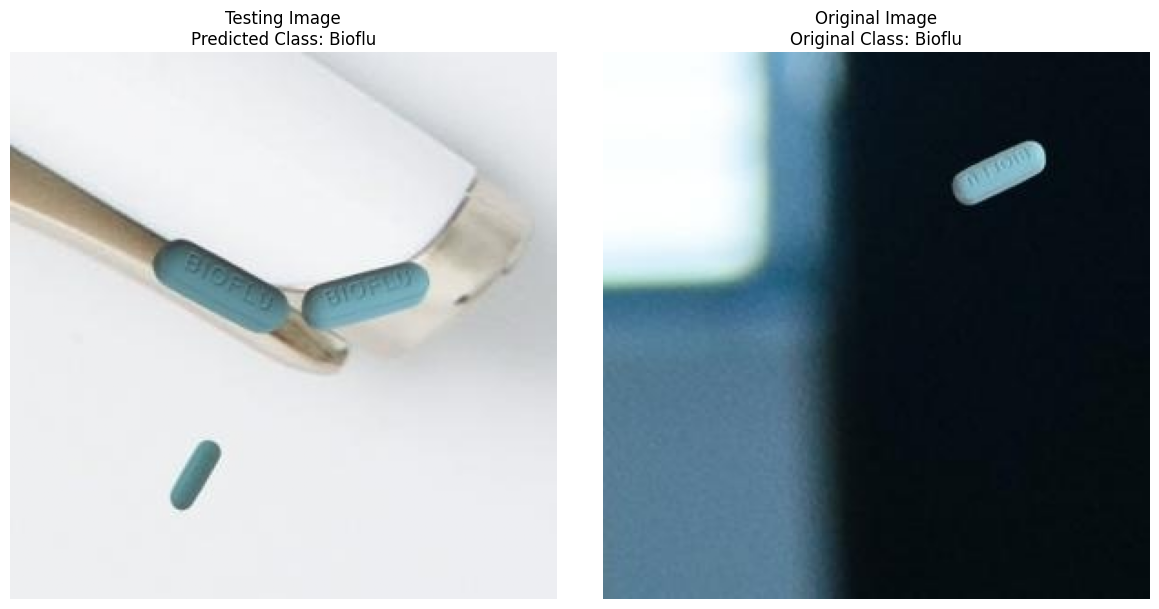

In [ ]:
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((300, 300))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    img = img.astype('float32')
    return img

# Load and preprocess the testing image
testing_image_path = '/content/drive/MyDrive/kaggle-medicine/test/Image_1180.jpg'
testing_image = preprocess_image(testing_image_path)

# Make predictions
testing_image_input = np.expand_dims(testing_image, axis=0)
predictions = model1.predict(testing_image_input)
predicted_class_index = tf.argmax(predictions, axis=1)[0].numpy()
predicted_class_name = class_names[predicted_class_index]


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(testing_image)
plt.title(f'Testing Image\nPredicted Class: {predicted_class_name}')
plt.axis('off')

# Find original image based on predicted class name
original_image_folder = '/content/drive/MyDrive/kaggle-medicine/XYZ'
predicted_class_folder = os.path.join(original_image_folder, predicted_class_name)
class_images = os.listdir(predicted_class_folder)

# Select the first image (you may adjust this based on your preference)
if class_images:
    original_image_path = os.path.join(predicted_class_folder, class_images[1])
    original_image = Image.open(original_image_path)

    # Plot the original image
    plt.subplot(1, 2, 2)
    plt.imshow(original_image)
    original_class_name = os.path.basename(predicted_class_folder)  # Extract original class name
    plt.title(f'Original Image\nOriginal Class: {original_class_name}')
    plt.axis('off')
else:
    print("No original images found for the predicted class:", predicted_class_name)

plt.tight_layout()
plt.show()


# Predicting the Name of the Drug using Saved Model and storing in the Testing CSV File with file name.

In [ ]:
import os
import pandas as pd
from PIL import Image
import tensorflow as tf
from tqdm import tqdm

# Function to preprocess an image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((300, 300))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    return img

trained_model = tf.keras.models.load_model('/content/drive/MyDrive/kaggle-medicine/CNN_model.h5')

def predict_and_update_csv(image_folder, csv_path):
    df = pd.read_csv(csv_path)

    # Initialize tqdm progress bar
    with tqdm(total=len(os.listdir(image_folder)), desc='Processing Images') as pbar:
        # Loop through images in the folder
        for image_file in os.listdir(image_folder):
            if image_file.endswith('.jpg') or image_file.endswith('.jpeg') or image_file.endswith('.png'):
                # Preprocess the image
                image_path = os.path.join(image_folder, image_file)
                testing_image = preprocess_image(image_path)
                testing_image = tf.expand_dims(testing_image, axis=0)

                # Make predictions
                predictions = trained_model.predict(testing_image)
                predicted_class_index = tf.argmax(predictions, axis=1)[0].numpy()
                predicted_class_name = class_names[predicted_class_index]

                # Update the CSV with the prediction
                df.loc[df['filename'] == image_file, 'Predicted_Class'] = predicted_class_name

                # Update tqdm progress bar
                pbar.update(1)

    # Save the updated CSV
    df.to_csv(csv_path, index=False)

image_folder = '/content/drive/MyDrive/kaggle-medicine/test'
csv_path = '/content/drive/MyDrive/kaggle-medicine/Testing_set.csv'
predict_and_update_csv(image_folder, csv_path)



Processing Images:   0%|          | 0/3000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 167ms/step



Processing Images:   0%|          | 1/3000 [00:00<15:50,  3.15it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:   0%|          | 2/3000 [00:00<10:12,  4.90it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:   0%|          | 3/3000 [00:00<08:11,  6.09it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:   0%|          | 4/3000 [00:00<07:27,  6.69it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:   0%|          | 5/3000 [00:00<07:04,  7.06it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:   0%|          | 6/3000 [00:00<06:49,  7.31it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:   0%|          | 7/3000 [00:01<06:47,  7.34it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:   0%|          | 8/3000 [00:01<06:49,  7.31it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   0%|          | 9/3000 [00:01<06:23,  7.80it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   0%|          | 11/3000 [00:01<05:09,  9.65it/s]

1/1 [==============================] - 0s 25ms/step



Processing Images:   0%|          | 13/3000 [00:01<04:44, 10.48it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   0%|          | 15/3000 [00:01<04:29, 11.07it/s]

1/1 [==============================] - 0s 18ms/step



Processing Images:   1%|          | 17/3000 [00:01<04:13, 11.77it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   1%|          | 19/3000 [00:02<04:03, 12.24it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   1%|          | 21/3000 [00:02<03:59, 12.44it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   1%|          | 23/3000 [00:02<04:01, 12.34it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   1%|          | 25/3000 [00:02<03:58, 12.45it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:   1%|          | 27/3000 [00:02<04:25, 11.20it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:   1%|          | 29/3000 [00:03<04:42, 10.53it/s]

1/1 [==============================] - 0s 83ms/step



Processing Images:   1%|          | 31/3000 [00:03<06:04,  8.15it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   1%|          | 32/3000 [00:35<4:51:49,  5.90s/it]

1/1 [==============================] - 0s 18ms/step



Processing Images:   1%|          | 34/3000 [00:36<3:14:33,  3.94s/it]

1/1 [==============================] - 0s 19ms/step



Processing Images:   1%|          | 36/3000 [00:36<2:12:25,  2.68s/it]

1/1 [==============================] - 0s 19ms/step



Processing Images:   1%|▏         | 38/3000 [00:36<1:31:34,  1.86s/it]

1/1 [==============================] - 0s 18ms/step



Processing Images:   1%|▏         | 40/3000 [00:36<1:04:08,  1.30s/it]

1/1 [==============================] - 0s 19ms/step



Processing Images:   1%|▏         | 42/3000 [00:36<45:35,  1.08it/s]  

1/1 [==============================] - 0s 18ms/step



Processing Images:   1%|▏         | 44/3000 [00:36<32:48,  1.50it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:   2%|▏         | 46/3000 [00:37<23:58,  2.05it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   2%|▏         | 48/3000 [00:37<17:49,  2.76it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   2%|▏         | 50/3000 [00:37<13:38,  3.60it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   2%|▏         | 52/3000 [00:37<10:39,  4.61it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   2%|▏         | 54/3000 [00:37<08:34,  5.73it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   2%|▏         | 56/3000 [00:37<07:10,  6.83it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   2%|▏         | 58/3000 [00:37<06:09,  7.96it/s]

1/1 [==============================] - 0s 18ms/step



Processing Images:   2%|▏         | 60/3000 [00:38<05:29,  8.92it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:   2%|▏         | 62/3000 [00:38<04:56,  9.90it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   2%|▏         | 64/3000 [00:38<04:34, 10.70it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   2%|▏         | 66/3000 [00:38<04:15, 11.47it/s]

1/1 [==============================] - 0s 18ms/step



Processing Images:   2%|▏         | 68/3000 [00:38<04:05, 11.93it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:   2%|▏         | 70/3000 [00:38<04:01, 12.11it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:   2%|▏         | 72/3000 [00:39<03:59, 12.25it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   2%|▏         | 74/3000 [00:39<03:54, 12.48it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:   3%|▎         | 76/3000 [00:39<03:52, 12.55it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:   3%|▎         | 78/3000 [00:39<03:53, 12.52it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   3%|▎         | 80/3000 [00:39<03:49, 12.74it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   3%|▎         | 82/3000 [00:39<03:47, 12.85it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   3%|▎         | 84/3000 [00:39<03:50, 12.66it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   3%|▎         | 86/3000 [00:40<03:47, 12.81it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:   3%|▎         | 88/3000 [00:40<03:56, 12.33it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   3%|▎         | 90/3000 [00:40<03:51, 12.56it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   3%|▎         | 92/3000 [00:40<03:47, 12.78it/s]

1/1 [==============================] - 0s 18ms/step



Processing Images:   3%|▎         | 94/3000 [00:40<03:46, 12.85it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   3%|▎         | 96/3000 [00:40<03:58, 12.17it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   3%|▎         | 98/3000 [00:41<03:53, 12.40it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   3%|▎         | 100/3000 [00:41<03:51, 12.53it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   3%|▎         | 102/3000 [00:41<03:50, 12.59it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   3%|▎         | 104/3000 [00:41<03:48, 12.69it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   4%|▎         | 106/3000 [00:41<03:48, 12.65it/s]

1/1 [==============================] - 0s 25ms/step



Processing Images:   4%|▎         | 108/3000 [00:41<03:51, 12.49it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   4%|▎         | 110/3000 [00:42<03:50, 12.53it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   4%|▎         | 112/3000 [00:42<03:45, 12.79it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   4%|▍         | 114/3000 [00:42<03:47, 12.71it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   4%|▍         | 116/3000 [00:42<03:44, 12.86it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   4%|▍         | 118/3000 [00:42<03:41, 13.01it/s]

1/1 [==============================] - 0s 18ms/step



Processing Images:   4%|▍         | 120/3000 [00:42<03:40, 13.05it/s]

1/1 [==============================] - 0s 18ms/step



Processing Images:   4%|▍         | 122/3000 [00:42<03:42, 12.94it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:   4%|▍         | 124/3000 [00:43<03:58, 12.07it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:   4%|▍         | 126/3000 [00:43<04:23, 10.92it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:   4%|▍         | 128/3000 [00:43<04:33, 10.49it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:   4%|▍         | 130/3000 [00:43<04:38, 10.32it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:   4%|▍         | 132/3000 [00:44<04:50,  9.86it/s]

1/1 [==============================] - 0s 26ms/step



Processing Images:   4%|▍         | 134/3000 [00:44<04:57,  9.64it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:   4%|▍         | 135/3000 [00:44<05:05,  9.39it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:   5%|▍         | 136/3000 [00:44<05:15,  9.08it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:   5%|▍         | 137/3000 [00:44<05:16,  9.06it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:   5%|▍         | 138/3000 [00:44<05:19,  8.97it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:   5%|▍         | 139/3000 [00:44<05:21,  8.91it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:   5%|▍         | 140/3000 [00:44<05:22,  8.86it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:   5%|▍         | 141/3000 [00:45<05:43,  8.32it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:   5%|▍         | 142/3000 [00:45<05:31,  8.62it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:   5%|▍         | 143/3000 [00:45<05:33,  8.58it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:   5%|▍         | 144/3000 [00:45<05:28,  8.69it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:   5%|▍         | 145/3000 [00:45<05:37,  8.46it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:   5%|▍         | 146/3000 [00:45<05:29,  8.67it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:   5%|▍         | 147/3000 [00:45<05:42,  8.33it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:   5%|▍         | 148/3000 [00:45<05:53,  8.07it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:   5%|▍         | 149/3000 [00:46<05:54,  8.03it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:   5%|▌         | 150/3000 [00:46<06:14,  7.61it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:   5%|▌         | 151/3000 [00:46<06:14,  7.62it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:   5%|▌         | 152/3000 [00:46<06:10,  7.68it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:   5%|▌         | 153/3000 [00:46<06:06,  7.77it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:   5%|▌         | 154/3000 [00:46<05:56,  7.99it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:   5%|▌         | 155/3000 [00:46<05:54,  8.03it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:   5%|▌         | 156/3000 [00:46<05:48,  8.15it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:   5%|▌         | 157/3000 [00:47<05:58,  7.93it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   5%|▌         | 158/3000 [00:47<05:40,  8.34it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   5%|▌         | 160/3000 [00:47<04:57,  9.54it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   5%|▌         | 162/3000 [00:47<04:28, 10.58it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   5%|▌         | 164/3000 [00:47<04:12, 11.25it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   6%|▌         | 166/3000 [00:47<03:58, 11.89it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:   6%|▌         | 168/3000 [00:47<03:56, 11.99it/s]

1/1 [==============================] - 0s 24ms/step



Processing Images:   6%|▌         | 170/3000 [00:48<04:06, 11.49it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   6%|▌         | 172/3000 [00:48<04:00, 11.75it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   6%|▌         | 174/3000 [00:48<03:54, 12.07it/s]

1/1 [==============================] - 0s 18ms/step



Processing Images:   6%|▌         | 176/3000 [00:48<03:48, 12.34it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   6%|▌         | 178/3000 [00:48<03:46, 12.44it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   6%|▌         | 180/3000 [00:48<03:43, 12.61it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   6%|▌         | 182/3000 [00:49<03:42, 12.64it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   6%|▌         | 184/3000 [00:49<03:43, 12.57it/s]

1/1 [==============================] - 0s 18ms/step



Processing Images:   6%|▌         | 186/3000 [00:49<03:39, 12.82it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   6%|▋         | 188/3000 [00:49<03:40, 12.75it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   6%|▋         | 190/3000 [00:49<03:40, 12.72it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   6%|▋         | 192/3000 [00:49<03:38, 12.85it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   6%|▋         | 194/3000 [00:50<03:37, 12.91it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   7%|▋         | 196/3000 [00:50<03:40, 12.71it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   7%|▋         | 198/3000 [00:50<03:48, 12.27it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   7%|▋         | 200/3000 [00:50<03:51, 12.10it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:   7%|▋         | 202/3000 [00:50<03:48, 12.23it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   7%|▋         | 204/3000 [00:50<03:48, 12.22it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:   7%|▋         | 206/3000 [00:51<03:50, 12.11it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   7%|▋         | 208/3000 [00:51<03:50, 12.11it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   7%|▋         | 210/3000 [00:51<03:52, 12.00it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   7%|▋         | 212/3000 [00:51<03:50, 12.10it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   7%|▋         | 214/3000 [00:51<03:47, 12.27it/s]

1/1 [==============================] - 0s 22ms/step


Processing Images:  15%|█▍        | 439/3000 [03:29<20:23,  2.09it/s]

1/1 [==============================] - 0s 24ms/step




Processing Images:   7%|▋         | 216/3000 [00:52<06:34,  7.06it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:   7%|▋         | 217/3000 [00:52<06:24,  7.24it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:   7%|▋         | 218/3000 [00:52<06:03,  7.66it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:   7%|▋         | 220/3000 [00:52<05:17,  8.75it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   7%|▋         | 222/3000 [00:52<04:46,  9.70it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:   7%|▋         | 224/3000 [00:52<04:30, 10.28it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:   8%|▊         | 226/3000 [00:53<04:18, 10.74it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:   8%|▊         | 228/3000 [00:53<04:08, 11.15it/s]

1/1 [==============================] - 0s 24ms/step



Processing Images:   8%|▊         | 230/3000 [00:53<04:05, 11.29it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:   8%|▊         | 232/3000 [00:53<03:59, 11.58it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:   8%|▊         | 234/3000 [00:53<04:00, 11.49it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   8%|▊         | 236/3000 [00:54<03:54, 11.77it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:   8%|▊         | 238/3000 [00:54<03:47, 12.13it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:   8%|▊         | 240/3000 [00:54<03:47, 12.16it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   8%|▊         | 242/3000 [00:54<03:55, 11.73it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   8%|▊         | 244/3000 [00:54<03:52, 11.87it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   8%|▊         | 246/3000 [00:54<03:49, 12.02it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:   8%|▊         | 248/3000 [00:55<03:52, 11.82it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   8%|▊         | 250/3000 [00:55<03:49, 11.96it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:   8%|▊         | 252/3000 [00:55<03:55, 11.65it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:   8%|▊         | 254/3000 [00:55<03:59, 11.48it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   9%|▊         | 256/3000 [00:55<03:56, 11.60it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:   9%|▊         | 258/3000 [00:55<03:53, 11.77it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:   9%|▊         | 260/3000 [00:56<03:57, 11.55it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:   9%|▊         | 262/3000 [00:56<03:53, 11.72it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:   9%|▉         | 264/3000 [00:56<03:50, 11.85it/s]

1/1 [==============================] - 0s 26ms/step



Processing Images:   9%|▉         | 266/3000 [00:56<03:57, 11.50it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:   9%|▉         | 268/3000 [00:56<03:54, 11.66it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:   9%|▉         | 270/3000 [00:56<03:57, 11.48it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:   9%|▉         | 272/3000 [00:57<03:57, 11.48it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:   9%|▉         | 274/3000 [00:57<04:19, 10.52it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:   9%|▉         | 276/3000 [00:57<04:38,  9.77it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:   9%|▉         | 277/3000 [00:57<04:47,  9.46it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:   9%|▉         | 278/3000 [00:57<05:01,  9.02it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:   9%|▉         | 279/3000 [00:57<05:09,  8.81it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:   9%|▉         | 280/3000 [00:58<05:11,  8.74it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:   9%|▉         | 281/3000 [00:58<05:09,  8.78it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:   9%|▉         | 282/3000 [00:58<05:10,  8.76it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:   9%|▉         | 283/3000 [00:58<05:03,  8.95it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:   9%|▉         | 284/3000 [00:58<05:05,  8.90it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  10%|▉         | 285/3000 [00:58<05:20,  8.48it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  10%|▉         | 286/3000 [00:58<05:23,  8.38it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  10%|▉         | 287/3000 [00:58<05:32,  8.16it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  10%|▉         | 288/3000 [00:58<05:21,  8.44it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  10%|▉         | 289/3000 [00:59<05:17,  8.55it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  10%|▉         | 290/3000 [00:59<05:14,  8.62it/s]

1/1 [==============================] - 0s 26ms/step



Processing Images:  10%|▉         | 291/3000 [00:59<05:12,  8.67it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  10%|▉         | 292/3000 [00:59<05:09,  8.74it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  10%|▉         | 293/3000 [00:59<05:00,  8.99it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  10%|▉         | 294/3000 [00:59<05:16,  8.54it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  10%|▉         | 295/3000 [00:59<05:24,  8.32it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  10%|▉         | 296/3000 [00:59<05:31,  8.15it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  10%|▉         | 297/3000 [01:00<05:32,  8.13it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  10%|▉         | 298/3000 [01:00<05:30,  8.17it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  10%|▉         | 299/3000 [01:00<05:36,  8.04it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  10%|█         | 300/3000 [01:00<05:25,  8.28it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  10%|█         | 301/3000 [01:00<05:40,  7.93it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  10%|█         | 302/3000 [01:00<05:45,  7.80it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  10%|█         | 303/3000 [01:00<05:38,  7.97it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  10%|█         | 304/3000 [01:00<05:33,  8.09it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  10%|█         | 305/3000 [01:01<05:58,  7.53it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  10%|█         | 306/3000 [01:01<05:55,  7.59it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  10%|█         | 307/3000 [01:01<05:39,  7.94it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  10%|█         | 309/3000 [01:01<04:42,  9.52it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  10%|█         | 311/3000 [01:01<04:20, 10.32it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  10%|█         | 313/3000 [01:01<04:15, 10.53it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  10%|█         | 315/3000 [01:02<04:19, 10.35it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  11%|█         | 317/3000 [01:02<04:06, 10.90it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  11%|█         | 319/3000 [01:02<03:56, 11.35it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  11%|█         | 321/3000 [01:02<03:49, 11.65it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  11%|█         | 323/3000 [01:02<03:54, 11.43it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  11%|█         | 325/3000 [01:02<03:56, 11.33it/s]

1/1 [==============================] - 0s 24ms/step



Processing Images:  11%|█         | 327/3000 [01:03<03:54, 11.40it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  11%|█         | 329/3000 [01:03<03:51, 11.56it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  11%|█         | 331/3000 [01:03<03:48, 11.66it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  11%|█         | 333/3000 [01:03<03:50, 11.57it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  11%|█         | 335/3000 [01:03<03:46, 11.74it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  11%|█         | 337/3000 [01:03<03:46, 11.74it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  11%|█▏        | 339/3000 [01:04<03:44, 11.84it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  11%|█▏        | 341/3000 [01:04<03:40, 12.07it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  11%|█▏        | 343/3000 [01:04<03:43, 11.88it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  12%|█▏        | 345/3000 [01:04<03:45, 11.80it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  12%|█▏        | 347/3000 [01:04<03:41, 11.96it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  12%|█▏        | 349/3000 [01:04<03:47, 11.67it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  12%|█▏        | 351/3000 [01:05<03:46, 11.67it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  12%|█▏        | 353/3000 [01:05<03:41, 11.94it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  12%|█▏        | 355/3000 [01:05<03:38, 12.11it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  12%|█▏        | 357/3000 [01:05<03:38, 12.11it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  12%|█▏        | 359/3000 [01:05<03:37, 12.17it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  12%|█▏        | 361/3000 [01:05<03:45, 11.71it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  12%|█▏        | 363/3000 [01:06<03:41, 11.91it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  12%|█▏        | 365/3000 [01:06<03:35, 12.22it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  12%|█▏        | 367/3000 [01:06<03:32, 12.38it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  12%|█▏        | 369/3000 [01:06<03:33, 12.31it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  12%|█▏        | 371/3000 [01:06<03:37, 12.11it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  12%|█▏        | 373/3000 [01:06<03:41, 11.87it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  12%|█▎        | 375/3000 [01:07<03:39, 11.95it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  13%|█▎        | 377/3000 [01:07<03:36, 12.13it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  13%|█▎        | 379/3000 [01:07<03:37, 12.06it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  13%|█▎        | 381/3000 [01:07<03:36, 12.12it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  13%|█▎        | 383/3000 [01:07<03:32, 12.30it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  13%|█▎        | 385/3000 [01:07<03:47, 11.50it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  13%|█▎        | 387/3000 [01:08<03:42, 11.72it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  13%|█▎        | 389/3000 [01:08<03:40, 11.86it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  13%|█▎        | 391/3000 [01:08<03:39, 11.90it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  13%|█▎        | 393/3000 [01:08<03:37, 11.98it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  13%|█▎        | 395/3000 [01:08<03:37, 11.98it/s]

1/1 [==============================] - 0s 24ms/step



Processing Images:  13%|█▎        | 397/3000 [01:08<03:38, 11.91it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  13%|█▎        | 399/3000 [01:09<03:36, 12.00it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  13%|█▎        | 401/3000 [01:09<03:34, 12.10it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  13%|█▎        | 403/3000 [01:09<03:33, 12.14it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  14%|█▎        | 405/3000 [01:09<03:33, 12.15it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  14%|█▎        | 407/3000 [01:09<03:37, 11.95it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  14%|█▎        | 409/3000 [01:09<03:34, 12.09it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  14%|█▎        | 411/3000 [01:10<03:33, 12.13it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  14%|█▍        | 413/3000 [01:10<03:32, 12.16it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  14%|█▍        | 415/3000 [01:10<03:31, 12.22it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  14%|█▍        | 417/3000 [01:10<03:33, 12.12it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  14%|█▍        | 419/3000 [01:10<03:32, 12.15it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  14%|█▍        | 421/3000 [01:10<03:30, 12.23it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  14%|█▍        | 423/3000 [01:11<03:34, 12.04it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  14%|█▍        | 425/3000 [01:11<03:36, 11.87it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  14%|█▍        | 427/3000 [01:11<04:01, 10.66it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  14%|█▍        | 429/3000 [01:11<04:20,  9.88it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  14%|█▍        | 431/3000 [01:11<04:25,  9.67it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  14%|█▍        | 432/3000 [01:12<04:30,  9.48it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  14%|█▍        | 433/3000 [01:12<04:43,  9.05it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  14%|█▍        | 434/3000 [01:12<05:02,  8.49it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  14%|█▍        | 435/3000 [01:12<05:11,  8.25it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  15%|█▍        | 436/3000 [01:12<05:13,  8.17it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  15%|█▍        | 437/3000 [01:12<05:23,  7.93it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  15%|█▍        | 438/3000 [01:12<05:25,  7.86it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  15%|█▍        | 439/3000 [01:12<05:28,  7.79it/s]

1/1 [==============================] - 0s 47ms/step



Processing Images:  15%|█▍        | 440/3000 [01:13<05:37,  7.58it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  15%|█▍        | 441/3000 [01:13<05:31,  7.71it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  15%|█▍        | 442/3000 [01:13<05:14,  8.15it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  15%|█▍        | 443/3000 [01:13<05:12,  8.19it/s]

1/1 [==============================] - 0s 173ms/step



Processing Images:  15%|█▍        | 444/3000 [01:13<07:06,  6.00it/s]

1/1 [==============================] - 0s 170ms/step



Processing Images:  15%|█▍        | 445/3000 [01:14<11:39,  3.65it/s]

1/1 [==============================] - 0s 75ms/step



Processing Images:  15%|█▍        | 446/3000 [01:14<12:00,  3.54it/s]

1/1 [==============================] - 0s 95ms/step



Processing Images:  15%|█▍        | 447/3000 [01:14<11:57,  3.56it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  15%|█▍        | 448/3000 [01:14<09:49,  4.33it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  15%|█▍        | 449/3000 [01:15<08:19,  5.11it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  15%|█▌        | 450/3000 [01:15<07:23,  5.75it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  15%|█▌        | 451/3000 [01:15<06:38,  6.40it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  15%|█▌        | 452/3000 [01:15<06:20,  6.69it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  15%|█▌        | 453/3000 [01:15<06:05,  6.97it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  15%|█▌        | 454/3000 [01:15<05:49,  7.28it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  15%|█▌        | 455/3000 [01:15<05:46,  7.34it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  15%|█▌        | 457/3000 [01:15<04:51,  8.73it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  15%|█▌        | 458/3000 [01:16<04:53,  8.67it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  15%|█▌        | 460/3000 [01:16<04:25,  9.57it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  15%|█▌        | 462/3000 [01:16<04:09, 10.16it/s]

1/1 [==============================] - 0s 25ms/step



Processing Images:  15%|█▌        | 464/3000 [01:16<04:34,  9.23it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  16%|█▌        | 466/3000 [01:16<04:13,  9.98it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  16%|█▌        | 468/3000 [01:17<04:03, 10.41it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  16%|█▌        | 470/3000 [01:17<03:57, 10.67it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  16%|█▌        | 472/3000 [01:17<03:52, 10.86it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  16%|█▌        | 474/3000 [01:17<03:49, 11.01it/s]

1/1 [==============================] - 0s 24ms/step



Processing Images:  16%|█▌        | 476/3000 [01:17<03:44, 11.22it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  16%|█▌        | 478/3000 [01:17<03:37, 11.59it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  16%|█▌        | 480/3000 [01:18<03:36, 11.63it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  16%|█▌        | 482/3000 [01:18<03:31, 11.91it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  16%|█▌        | 484/3000 [01:18<03:33, 11.78it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  16%|█▌        | 486/3000 [01:18<03:30, 11.94it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  16%|█▋        | 488/3000 [01:18<03:30, 11.91it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  16%|█▋        | 490/3000 [01:18<03:31, 11.86it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  16%|█▋        | 492/3000 [01:19<03:27, 12.07it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  16%|█▋        | 494/3000 [01:19<03:25, 12.20it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  17%|█▋        | 496/3000 [01:19<03:27, 12.04it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  17%|█▋        | 498/3000 [01:19<03:25, 12.18it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  17%|█▋        | 500/3000 [01:19<03:30, 11.86it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  17%|█▋        | 502/3000 [01:19<03:28, 11.96it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  17%|█▋        | 504/3000 [01:20<03:28, 12.00it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  17%|█▋        | 506/3000 [01:20<03:25, 12.16it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  17%|█▋        | 508/3000 [01:20<03:33, 11.69it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  17%|█▋        | 510/3000 [01:20<03:30, 11.85it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  17%|█▋        | 512/3000 [01:20<03:28, 11.96it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  17%|█▋        | 514/3000 [01:20<03:28, 11.90it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  17%|█▋        | 516/3000 [01:21<03:25, 12.09it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  17%|█▋        | 518/3000 [01:21<03:25, 12.10it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  17%|█▋        | 520/3000 [01:21<03:26, 12.00it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  17%|█▋        | 522/3000 [01:21<03:32, 11.66it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  17%|█▋        | 524/3000 [01:21<03:30, 11.77it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  18%|█▊        | 526/3000 [01:21<03:27, 11.92it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  18%|█▊        | 528/3000 [01:22<03:34, 11.51it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  18%|█▊        | 530/3000 [01:22<03:31, 11.66it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  18%|█▊        | 532/3000 [01:22<03:41, 11.14it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  18%|█▊        | 534/3000 [01:22<03:43, 11.03it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  18%|█▊        | 536/3000 [01:22<03:40, 11.18it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  18%|█▊        | 538/3000 [01:23<03:38, 11.29it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  18%|█▊        | 540/3000 [01:23<03:33, 11.53it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  18%|█▊        | 542/3000 [01:23<03:30, 11.69it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  18%|█▊        | 544/3000 [01:23<03:29, 11.70it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  18%|█▊        | 546/3000 [01:23<03:30, 11.67it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  18%|█▊        | 548/3000 [01:23<03:29, 11.72it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  18%|█▊        | 550/3000 [01:24<03:30, 11.65it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  18%|█▊        | 552/3000 [01:24<03:27, 11.82it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  18%|█▊        | 554/3000 [01:24<03:25, 11.92it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  19%|█▊        | 556/3000 [01:24<03:29, 11.66it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  19%|█▊        | 558/3000 [01:24<03:26, 11.85it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  19%|█▊        | 560/3000 [01:24<03:26, 11.83it/s]

1/1 [==============================] - 0s 18ms/step



Processing Images:  19%|█▊        | 562/3000 [01:25<03:22, 12.04it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  19%|█▉        | 564/3000 [01:25<03:23, 11.99it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  19%|█▉        | 566/3000 [01:25<03:19, 12.20it/s]

1/1 [==============================] - 0s 25ms/step



Processing Images:  19%|█▉        | 568/3000 [01:25<03:26, 11.79it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  19%|█▉        | 570/3000 [01:25<03:23, 11.93it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  19%|█▉        | 572/3000 [01:25<03:21, 12.04it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  19%|█▉        | 574/3000 [01:26<03:47, 10.66it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  19%|█▉        | 576/3000 [01:26<04:01, 10.03it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  19%|█▉        | 578/3000 [01:26<04:14,  9.52it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  19%|█▉        | 579/3000 [01:26<04:23,  9.17it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  19%|█▉        | 580/3000 [01:26<04:29,  8.98it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  19%|█▉        | 581/3000 [01:26<04:42,  8.56it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  19%|█▉        | 582/3000 [01:27<04:49,  8.35it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  19%|█▉        | 583/3000 [01:27<04:44,  8.50it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  19%|█▉        | 584/3000 [01:27<04:44,  8.50it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  20%|█▉        | 585/3000 [01:27<04:46,  8.44it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  20%|█▉        | 586/3000 [01:27<04:50,  8.31it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  20%|█▉        | 587/3000 [01:27<04:51,  8.29it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  20%|█▉        | 588/3000 [01:27<05:01,  8.00it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  20%|█▉        | 589/3000 [01:27<05:00,  8.01it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  20%|█▉        | 590/3000 [01:28<04:59,  8.03it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  20%|█▉        | 591/3000 [01:28<05:03,  7.94it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  20%|█▉        | 592/3000 [01:28<04:55,  8.16it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  20%|█▉        | 593/3000 [01:28<04:58,  8.06it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  20%|█▉        | 594/3000 [01:28<04:52,  8.22it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  20%|█▉        | 595/3000 [01:28<05:00,  8.01it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  20%|█▉        | 596/3000 [01:28<05:05,  7.87it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  20%|█▉        | 597/3000 [01:28<05:01,  7.96it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  20%|█▉        | 598/3000 [01:29<04:57,  8.07it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  20%|█▉        | 599/3000 [01:29<04:52,  8.22it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  20%|██        | 600/3000 [01:29<05:10,  7.73it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  20%|██        | 601/3000 [01:29<05:22,  7.43it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  20%|██        | 602/3000 [01:29<05:16,  7.57it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  20%|██        | 603/3000 [01:29<05:15,  7.60it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  20%|██        | 604/3000 [01:29<05:15,  7.58it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  20%|██        | 605/3000 [01:30<05:34,  7.15it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  20%|██        | 606/3000 [01:30<05:21,  7.44it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  20%|██        | 607/3000 [01:30<05:11,  7.68it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  20%|██        | 608/3000 [01:30<05:11,  7.68it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  20%|██        | 609/3000 [01:30<05:01,  7.93it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  20%|██        | 611/3000 [01:30<04:10,  9.52it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  20%|██        | 613/3000 [01:30<03:53, 10.22it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  20%|██        | 615/3000 [01:30<03:38, 10.93it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  21%|██        | 617/3000 [01:31<03:31, 11.29it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  21%|██        | 619/3000 [01:31<03:28, 11.43it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  21%|██        | 621/3000 [01:31<03:23, 11.72it/s]

1/1 [==============================] - 0s 24ms/step



Processing Images:  21%|██        | 623/3000 [01:31<03:18, 11.95it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  21%|██        | 625/3000 [01:31<03:21, 11.78it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  21%|██        | 627/3000 [01:31<03:19, 11.87it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  21%|██        | 629/3000 [01:32<03:23, 11.62it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  21%|██        | 631/3000 [01:32<03:23, 11.66it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  21%|██        | 633/3000 [01:32<03:21, 11.77it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  21%|██        | 635/3000 [01:32<03:19, 11.83it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  21%|██        | 637/3000 [01:32<03:27, 11.36it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  21%|██▏       | 639/3000 [01:33<03:25, 11.52it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  21%|██▏       | 641/3000 [01:33<03:22, 11.63it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  21%|██▏       | 643/3000 [01:33<03:21, 11.71it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  22%|██▏       | 645/3000 [01:33<03:17, 11.92it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  22%|██▏       | 647/3000 [01:33<03:19, 11.80it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  22%|██▏       | 649/3000 [01:33<03:21, 11.69it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  22%|██▏       | 651/3000 [01:34<03:20, 11.70it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  22%|██▏       | 653/3000 [01:34<03:20, 11.70it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  22%|██▏       | 655/3000 [01:34<03:21, 11.61it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  22%|██▏       | 657/3000 [01:34<03:24, 11.45it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  22%|██▏       | 659/3000 [01:34<03:22, 11.54it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  22%|██▏       | 661/3000 [01:34<03:27, 11.26it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  22%|██▏       | 663/3000 [01:35<03:22, 11.52it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  22%|██▏       | 665/3000 [01:35<03:19, 11.73it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  22%|██▏       | 667/3000 [01:35<03:15, 11.92it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  22%|██▏       | 669/3000 [01:35<03:13, 12.08it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  22%|██▏       | 671/3000 [01:35<03:11, 12.17it/s]

1/1 [==============================] - 0s 25ms/step



Processing Images:  22%|██▏       | 673/3000 [01:35<03:13, 12.04it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  22%|██▎       | 675/3000 [01:36<03:21, 11.54it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  23%|██▎       | 677/3000 [01:36<03:29, 11.10it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  23%|██▎       | 679/3000 [01:36<03:23, 11.38it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  23%|██▎       | 681/3000 [01:36<03:21, 11.51it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  23%|██▎       | 683/3000 [01:36<03:24, 11.33it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  23%|██▎       | 685/3000 [01:36<03:24, 11.33it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  23%|██▎       | 687/3000 [01:37<03:25, 11.28it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  23%|██▎       | 689/3000 [01:37<03:22, 11.40it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  23%|██▎       | 691/3000 [01:37<03:19, 11.55it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  23%|██▎       | 693/3000 [01:37<03:23, 11.34it/s]

1/1 [==============================] - 0s 25ms/step



Processing Images:  23%|██▎       | 695/3000 [01:37<03:22, 11.40it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  23%|██▎       | 697/3000 [01:38<03:24, 11.25it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  23%|██▎       | 699/3000 [01:38<03:21, 11.41it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  23%|██▎       | 701/3000 [01:38<03:19, 11.52it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  23%|██▎       | 703/3000 [01:38<03:21, 11.38it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  24%|██▎       | 705/3000 [01:38<03:18, 11.55it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  24%|██▎       | 707/3000 [01:38<03:16, 11.64it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  24%|██▎       | 709/3000 [01:39<03:19, 11.46it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  24%|██▎       | 711/3000 [01:39<03:18, 11.54it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  24%|██▍       | 713/3000 [01:39<03:15, 11.73it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  24%|██▍       | 715/3000 [01:39<03:20, 11.41it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  24%|██▍       | 717/3000 [01:39<03:19, 11.46it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  24%|██▍       | 719/3000 [01:39<03:16, 11.59it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  24%|██▍       | 721/3000 [01:40<03:22, 11.26it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  24%|██▍       | 723/3000 [01:40<03:19, 11.42it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  24%|██▍       | 725/3000 [01:40<03:22, 11.24it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  24%|██▍       | 727/3000 [01:40<03:44, 10.11it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  24%|██▍       | 729/3000 [01:40<04:03,  9.32it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  24%|██▍       | 730/3000 [01:41<04:08,  9.13it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  24%|██▍       | 731/3000 [01:41<04:09,  9.09it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  24%|██▍       | 732/3000 [01:41<04:10,  9.04it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  24%|██▍       | 733/3000 [01:41<04:08,  9.11it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  24%|██▍       | 734/3000 [01:41<04:07,  9.14it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  24%|██▍       | 735/3000 [01:41<04:14,  8.90it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  25%|██▍       | 737/3000 [01:41<04:10,  9.04it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  25%|██▍       | 738/3000 [01:42<04:26,  8.50it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  25%|██▍       | 739/3000 [01:42<04:36,  8.19it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  25%|██▍       | 740/3000 [01:42<04:43,  7.98it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  25%|██▍       | 741/3000 [01:42<04:46,  7.89it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  25%|██▍       | 742/3000 [01:42<04:44,  7.92it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  25%|██▍       | 743/3000 [01:42<04:45,  7.91it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  25%|██▍       | 744/3000 [01:42<04:42,  7.98it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  25%|██▍       | 745/3000 [01:42<04:52,  7.71it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  25%|██▍       | 746/3000 [01:43<04:48,  7.81it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  25%|██▍       | 747/3000 [01:43<04:52,  7.70it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  25%|██▍       | 748/3000 [01:43<04:44,  7.91it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  25%|██▍       | 749/3000 [01:43<04:52,  7.70it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  25%|██▌       | 750/3000 [01:43<05:02,  7.44it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  25%|██▌       | 751/3000 [01:43<04:55,  7.61it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  25%|██▌       | 752/3000 [01:43<04:58,  7.54it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  25%|██▌       | 753/3000 [01:43<04:54,  7.63it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  25%|██▌       | 754/3000 [01:44<04:52,  7.68it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  25%|██▌       | 755/3000 [01:44<04:49,  7.76it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  25%|██▌       | 756/3000 [01:44<04:58,  7.52it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  25%|██▌       | 757/3000 [01:44<05:06,  7.32it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  25%|██▌       | 758/3000 [01:44<05:02,  7.41it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  25%|██▌       | 759/3000 [01:44<04:54,  7.60it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  25%|██▌       | 760/3000 [01:44<04:52,  7.66it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  25%|██▌       | 761/3000 [01:45<04:51,  7.68it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  25%|██▌       | 762/3000 [01:45<04:54,  7.60it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  25%|██▌       | 763/3000 [01:45<04:49,  7.72it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  25%|██▌       | 764/3000 [01:45<04:34,  8.15it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  26%|██▌       | 766/3000 [01:45<03:53,  9.56it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  26%|██▌       | 768/3000 [01:45<03:37, 10.24it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  26%|██▌       | 769/3000 [01:45<03:40, 10.13it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  26%|██▌       | 771/3000 [01:46<03:32, 10.50it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  26%|██▌       | 773/3000 [01:46<03:27, 10.72it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  26%|██▌       | 775/3000 [01:46<03:31, 10.52it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  26%|██▌       | 777/3000 [01:46<03:24, 10.87it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  26%|██▌       | 779/3000 [01:46<03:26, 10.77it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  26%|██▌       | 781/3000 [01:46<03:22, 10.95it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  26%|██▌       | 783/3000 [01:47<03:21, 11.02it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  26%|██▌       | 785/3000 [01:47<03:21, 10.98it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  26%|██▌       | 787/3000 [01:47<03:20, 11.01it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  26%|██▋       | 789/3000 [01:47<03:15, 11.32it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  26%|██▋       | 791/3000 [01:47<03:12, 11.50it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  26%|██▋       | 793/3000 [01:47<03:11, 11.53it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  26%|██▋       | 795/3000 [01:48<03:09, 11.64it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  27%|██▋       | 797/3000 [01:48<03:06, 11.82it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  27%|██▋       | 799/3000 [01:48<03:09, 11.62it/s]

1/1 [==============================] - 0s 18ms/step



Processing Images:  27%|██▋       | 801/3000 [01:48<03:07, 11.70it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  27%|██▋       | 803/3000 [01:48<03:08, 11.65it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  27%|██▋       | 805/3000 [01:49<03:05, 11.81it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  27%|██▋       | 807/3000 [01:49<03:05, 11.83it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  27%|██▋       | 809/3000 [01:49<03:05, 11.80it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  27%|██▋       | 811/3000 [01:49<03:11, 11.42it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  27%|██▋       | 813/3000 [01:49<03:10, 11.49it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  27%|██▋       | 815/3000 [01:49<03:09, 11.54it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  27%|██▋       | 817/3000 [01:50<03:10, 11.44it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  27%|██▋       | 819/3000 [01:50<03:07, 11.62it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  27%|██▋       | 821/3000 [01:50<03:10, 11.42it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  27%|██▋       | 823/3000 [01:50<03:15, 11.14it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  28%|██▊       | 825/3000 [01:50<03:23, 10.67it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  28%|██▊       | 827/3000 [01:50<03:16, 11.03it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  28%|██▊       | 829/3000 [01:51<03:16, 11.05it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  28%|██▊       | 831/3000 [01:51<03:10, 11.41it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  28%|██▊       | 833/3000 [01:51<03:08, 11.49it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  28%|██▊       | 835/3000 [01:51<03:10, 11.36it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  28%|██▊       | 837/3000 [01:51<03:04, 11.70it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  28%|██▊       | 839/3000 [01:51<03:05, 11.63it/s]

1/1 [==============================] - 0s 18ms/step



Processing Images:  28%|██▊       | 841/3000 [01:52<03:02, 11.81it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  28%|██▊       | 843/3000 [01:52<02:59, 11.99it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  28%|██▊       | 845/3000 [01:52<03:00, 11.96it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  28%|██▊       | 847/3000 [01:52<03:08, 11.43it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  28%|██▊       | 849/3000 [01:52<03:09, 11.38it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  28%|██▊       | 851/3000 [01:53<03:06, 11.51it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  28%|██▊       | 853/3000 [01:53<03:05, 11.58it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  28%|██▊       | 855/3000 [01:53<03:06, 11.48it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  29%|██▊       | 857/3000 [01:53<03:07, 11.41it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  29%|██▊       | 859/3000 [01:53<03:10, 11.23it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  29%|██▊       | 861/3000 [01:53<03:06, 11.48it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  29%|██▉       | 863/3000 [01:54<03:04, 11.55it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  29%|██▉       | 865/3000 [01:54<03:03, 11.64it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  29%|██▉       | 867/3000 [01:54<03:05, 11.47it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  29%|██▉       | 869/3000 [01:54<03:05, 11.48it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  29%|██▉       | 871/3000 [01:54<03:10, 11.16it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  29%|██▉       | 873/3000 [01:54<03:09, 11.21it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  29%|██▉       | 875/3000 [01:55<03:08, 11.24it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  29%|██▉       | 877/3000 [01:55<03:03, 11.55it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  29%|██▉       | 879/3000 [01:55<03:19, 10.61it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  29%|██▉       | 881/3000 [01:55<03:39,  9.66it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  29%|██▉       | 882/3000 [01:55<03:41,  9.58it/s]

1/1 [==============================] - 0s 26ms/step



Processing Images:  29%|██▉       | 883/3000 [01:56<03:45,  9.39it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  29%|██▉       | 884/3000 [01:56<03:57,  8.90it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  30%|██▉       | 885/3000 [01:56<04:05,  8.63it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  30%|██▉       | 886/3000 [01:56<04:13,  8.33it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  30%|██▉       | 887/3000 [01:56<04:16,  8.23it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  30%|██▉       | 888/3000 [01:56<04:26,  7.93it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  30%|██▉       | 889/3000 [01:56<04:23,  8.00it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  30%|██▉       | 890/3000 [01:56<04:25,  7.95it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  30%|██▉       | 891/3000 [01:57<04:15,  8.25it/s]

1/1 [==============================] - 0s 46ms/step



Processing Images:  30%|██▉       | 892/3000 [01:57<04:21,  8.05it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  30%|██▉       | 893/3000 [01:57<04:41,  7.49it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  30%|██▉       | 894/3000 [01:57<04:38,  7.56it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  30%|██▉       | 895/3000 [01:57<04:37,  7.58it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  30%|██▉       | 896/3000 [01:57<04:55,  7.12it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  30%|██▉       | 897/3000 [01:57<04:52,  7.18it/s]

1/1 [==============================] - 0s 47ms/step



Processing Images:  30%|██▉       | 898/3000 [01:58<04:57,  7.05it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  30%|██▉       | 899/3000 [01:58<04:45,  7.37it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  30%|███       | 900/3000 [01:58<04:34,  7.64it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  30%|███       | 901/3000 [01:58<04:34,  7.64it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  30%|███       | 902/3000 [01:58<04:32,  7.71it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  30%|███       | 903/3000 [01:58<04:45,  7.34it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  30%|███       | 904/3000 [01:58<04:49,  7.25it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  30%|███       | 905/3000 [01:58<04:51,  7.17it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  30%|███       | 906/3000 [01:59<04:44,  7.35it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  30%|███       | 907/3000 [01:59<04:40,  7.46it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  30%|███       | 908/3000 [01:59<04:36,  7.57it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  30%|███       | 909/3000 [01:59<04:29,  7.76it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  30%|███       | 910/3000 [01:59<04:20,  8.04it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  30%|███       | 911/3000 [01:59<04:23,  7.92it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  30%|███       | 912/3000 [01:59<04:46,  7.30it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  30%|███       | 913/3000 [01:59<04:46,  7.28it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  30%|███       | 914/3000 [02:00<04:51,  7.16it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  30%|███       | 915/3000 [02:00<04:47,  7.24it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  31%|███       | 916/3000 [02:00<04:48,  7.23it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  31%|███       | 917/3000 [02:00<04:29,  7.73it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  31%|███       | 919/3000 [02:00<03:45,  9.22it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  31%|███       | 921/3000 [02:00<03:30,  9.88it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  31%|███       | 922/3000 [02:00<03:30,  9.87it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  31%|███       | 923/3000 [02:01<03:30,  9.88it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  31%|███       | 924/3000 [02:01<03:30,  9.88it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  31%|███       | 926/3000 [02:01<03:16, 10.55it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  31%|███       | 928/3000 [02:01<03:09, 10.91it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  31%|███       | 930/3000 [02:01<03:07, 11.03it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  31%|███       | 932/3000 [02:01<03:06, 11.10it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  31%|███       | 934/3000 [02:02<03:00, 11.44it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  31%|███       | 936/3000 [02:02<03:03, 11.26it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  31%|███▏      | 938/3000 [02:02<03:01, 11.35it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  31%|███▏      | 940/3000 [02:02<03:01, 11.35it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  31%|███▏      | 942/3000 [02:02<03:02, 11.30it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  31%|███▏      | 944/3000 [02:02<03:00, 11.40it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  32%|███▏      | 946/3000 [02:03<02:59, 11.47it/s]

1/1 [==============================] - 0s 24ms/step



Processing Images:  32%|███▏      | 948/3000 [02:03<03:05, 11.05it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  32%|███▏      | 950/3000 [02:03<03:04, 11.12it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  32%|███▏      | 952/3000 [02:03<03:02, 11.20it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  32%|███▏      | 954/3000 [02:03<03:01, 11.28it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  32%|███▏      | 956/3000 [02:03<03:01, 11.29it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  32%|███▏      | 958/3000 [02:04<03:04, 11.07it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  32%|███▏      | 960/3000 [02:04<03:12, 10.62it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  32%|███▏      | 962/3000 [02:04<03:07, 10.87it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  32%|███▏      | 964/3000 [02:04<03:07, 10.86it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  32%|███▏      | 966/3000 [02:04<03:07, 10.84it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  32%|███▏      | 968/3000 [02:05<03:04, 11.01it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  32%|███▏      | 970/3000 [02:05<03:13, 10.52it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  32%|███▏      | 972/3000 [02:05<03:07, 10.82it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  32%|███▏      | 974/3000 [02:05<03:03, 11.06it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  33%|███▎      | 976/3000 [02:05<03:01, 11.12it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  33%|███▎      | 978/3000 [02:06<02:59, 11.28it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  33%|███▎      | 980/3000 [02:06<02:59, 11.28it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  33%|███▎      | 982/3000 [02:06<03:02, 11.07it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  33%|███▎      | 984/3000 [02:06<03:00, 11.19it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  33%|███▎      | 986/3000 [02:06<03:07, 10.73it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  33%|███▎      | 988/3000 [02:06<03:01, 11.10it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  33%|███▎      | 990/3000 [02:07<02:59, 11.18it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  33%|███▎      | 992/3000 [02:07<02:58, 11.27it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  33%|███▎      | 994/3000 [02:07<03:00, 11.08it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  33%|███▎      | 996/3000 [02:07<02:57, 11.29it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  33%|███▎      | 998/3000 [02:07<02:55, 11.41it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  33%|███▎      | 1000/3000 [02:07<02:56, 11.35it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  33%|███▎      | 1002/3000 [02:08<02:56, 11.35it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  33%|███▎      | 1004/3000 [02:08<02:56, 11.30it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  34%|███▎      | 1006/3000 [02:08<02:58, 11.19it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  34%|███▎      | 1008/3000 [02:08<02:58, 11.17it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  34%|███▎      | 1010/3000 [02:08<02:57, 11.19it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  34%|███▎      | 1012/3000 [02:09<02:58, 11.12it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  34%|███▍      | 1014/3000 [02:09<02:55, 11.32it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  34%|███▍      | 1016/3000 [02:09<02:53, 11.43it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  34%|███▍      | 1018/3000 [02:09<02:55, 11.30it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  34%|███▍      | 1020/3000 [02:09<02:54, 11.34it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  34%|███▍      | 1022/3000 [02:09<02:55, 11.28it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  34%|███▍      | 1024/3000 [02:10<02:55, 11.29it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  34%|███▍      | 1026/3000 [02:10<02:52, 11.46it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  34%|███▍      | 1028/3000 [02:10<02:50, 11.53it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  34%|███▍      | 1030/3000 [02:10<03:10, 10.32it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  34%|███▍      | 1032/3000 [02:10<03:25,  9.56it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  34%|███▍      | 1033/3000 [02:11<03:31,  9.28it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  34%|███▍      | 1034/3000 [02:11<03:40,  8.90it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  34%|███▍      | 1035/3000 [02:11<03:45,  8.71it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  35%|███▍      | 1036/3000 [02:11<03:39,  8.96it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  35%|███▍      | 1037/3000 [02:11<03:37,  9.02it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  35%|███▍      | 1038/3000 [02:11<03:36,  9.08it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  35%|███▍      | 1039/3000 [02:11<03:42,  8.83it/s]

1/1 [==============================] - 0s 54ms/step



Processing Images:  35%|███▍      | 1040/3000 [02:11<04:10,  7.83it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  35%|███▍      | 1041/3000 [02:12<04:03,  8.06it/s]

1/1 [==============================] - 0s 26ms/step



Processing Images:  35%|███▍      | 1042/3000 [02:12<04:18,  7.59it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  35%|███▍      | 1043/3000 [02:12<04:11,  7.77it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  35%|███▍      | 1044/3000 [02:12<04:12,  7.76it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  35%|███▍      | 1045/3000 [02:12<04:11,  7.76it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  35%|███▍      | 1046/3000 [02:12<04:15,  7.65it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  35%|███▍      | 1047/3000 [02:12<04:21,  7.47it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  35%|███▍      | 1048/3000 [02:12<04:22,  7.44it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  35%|███▍      | 1049/3000 [02:13<04:27,  7.30it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  35%|███▌      | 1050/3000 [02:13<04:20,  7.47it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  35%|███▌      | 1051/3000 [02:13<04:23,  7.39it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  35%|███▌      | 1052/3000 [02:13<04:12,  7.71it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  35%|███▌      | 1053/3000 [02:13<04:09,  7.79it/s]

1/1 [==============================] - 0s 44ms/step



Processing Images:  35%|███▌      | 1054/3000 [02:13<04:29,  7.21it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  35%|███▌      | 1055/3000 [02:13<04:34,  7.08it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  35%|███▌      | 1056/3000 [02:14<04:25,  7.32it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  35%|███▌      | 1057/3000 [02:14<04:22,  7.41it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  35%|███▌      | 1058/3000 [02:14<04:21,  7.44it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  35%|███▌      | 1059/3000 [02:14<04:10,  7.73it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  35%|███▌      | 1060/3000 [02:14<04:13,  7.64it/s]

1/1 [==============================] - 0s 45ms/step



Processing Images:  35%|███▌      | 1061/3000 [02:14<04:19,  7.48it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  35%|███▌      | 1062/3000 [02:14<04:23,  7.34it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  35%|███▌      | 1063/3000 [02:14<04:14,  7.62it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  35%|███▌      | 1064/3000 [02:15<04:10,  7.74it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  36%|███▌      | 1065/3000 [02:15<04:08,  7.78it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  36%|███▌      | 1066/3000 [02:15<04:17,  7.52it/s]

1/1 [==============================] - 0s 44ms/step



Processing Images:  36%|███▌      | 1067/3000 [02:15<04:26,  7.24it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  36%|███▌      | 1068/3000 [02:15<04:23,  7.33it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  36%|███▌      | 1069/3000 [02:15<04:23,  7.32it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  36%|███▌      | 1070/3000 [02:15<04:10,  7.69it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  36%|███▌      | 1071/3000 [02:16<04:00,  8.03it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  36%|███▌      | 1073/3000 [02:16<03:28,  9.24it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  36%|███▌      | 1074/3000 [02:16<03:27,  9.28it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  36%|███▌      | 1075/3000 [02:16<03:24,  9.40it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  36%|███▌      | 1076/3000 [02:16<03:29,  9.19it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  36%|███▌      | 1077/3000 [02:16<03:27,  9.27it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  36%|███▌      | 1079/3000 [02:16<03:10, 10.10it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  36%|███▌      | 1080/3000 [02:16<03:11, 10.03it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  36%|███▌      | 1082/3000 [02:17<02:59, 10.66it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  36%|███▌      | 1084/3000 [02:17<02:54, 11.00it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  36%|███▌      | 1086/3000 [02:17<02:56, 10.87it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  36%|███▋      | 1088/3000 [02:17<02:54, 10.96it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  36%|███▋      | 1090/3000 [02:17<02:52, 11.06it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  36%|███▋      | 1092/3000 [02:17<02:55, 10.85it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  36%|███▋      | 1094/3000 [02:18<02:55, 10.84it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  37%|███▋      | 1096/3000 [02:18<02:53, 10.98it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  37%|███▋      | 1098/3000 [02:18<02:50, 11.15it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  37%|███▋      | 1100/3000 [02:18<02:49, 11.24it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  37%|███▋      | 1102/3000 [02:18<02:48, 11.26it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  37%|███▋      | 1104/3000 [02:19<02:51, 11.03it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  37%|███▋      | 1106/3000 [02:19<02:48, 11.25it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  37%|███▋      | 1108/3000 [02:19<02:46, 11.36it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  37%|███▋      | 1110/3000 [02:19<02:47, 11.29it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  37%|███▋      | 1112/3000 [02:19<02:47, 11.28it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  37%|███▋      | 1114/3000 [02:19<02:51, 10.99it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  37%|███▋      | 1116/3000 [02:20<02:51, 10.99it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  37%|███▋      | 1118/3000 [02:20<02:50, 11.03it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  37%|███▋      | 1120/3000 [02:20<02:46, 11.26it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  37%|███▋      | 1122/3000 [02:20<02:46, 11.30it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  37%|███▋      | 1124/3000 [02:20<02:45, 11.34it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  38%|███▊      | 1126/3000 [02:21<02:45, 11.35it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  38%|███▊      | 1128/3000 [02:21<02:46, 11.27it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  38%|███▊      | 1130/3000 [02:21<02:46, 11.21it/s]

1/1 [==============================] - 0s 24ms/step



Processing Images:  38%|███▊      | 1132/3000 [02:21<02:49, 11.03it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  38%|███▊      | 1134/3000 [02:21<02:50, 10.91it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  38%|███▊      | 1136/3000 [02:21<02:50, 10.96it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  38%|███▊      | 1138/3000 [02:22<02:52, 10.82it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  38%|███▊      | 1140/3000 [02:22<02:52, 10.81it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  38%|███▊      | 1142/3000 [02:22<02:49, 10.93it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  38%|███▊      | 1144/3000 [02:22<02:46, 11.12it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  38%|███▊      | 1146/3000 [02:22<02:49, 10.97it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  38%|███▊      | 1148/3000 [02:23<02:48, 10.99it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  38%|███▊      | 1150/3000 [02:23<02:52, 10.75it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  38%|███▊      | 1152/3000 [02:23<02:46, 11.07it/s]

1/1 [==============================] - 0s 25ms/step



Processing Images:  38%|███▊      | 1154/3000 [02:23<02:46, 11.11it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  39%|███▊      | 1156/3000 [02:23<02:44, 11.21it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  39%|███▊      | 1158/3000 [02:23<02:47, 11.02it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  39%|███▊      | 1160/3000 [02:24<02:44, 11.18it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  39%|███▊      | 1162/3000 [02:24<02:45, 11.10it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  39%|███▉      | 1164/3000 [02:24<02:44, 11.19it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  39%|███▉      | 1166/3000 [02:24<02:44, 11.16it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  39%|███▉      | 1168/3000 [02:24<02:42, 11.24it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  39%|███▉      | 1170/3000 [02:24<02:42, 11.24it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  39%|███▉      | 1172/3000 [02:25<02:47, 10.92it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  39%|███▉      | 1174/3000 [02:25<02:43, 11.14it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  39%|███▉      | 1176/3000 [02:25<02:43, 11.17it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  39%|███▉      | 1178/3000 [02:25<02:42, 11.21it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  39%|███▉      | 1180/3000 [02:25<02:46, 10.94it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  39%|███▉      | 1182/3000 [02:26<03:00, 10.07it/s]

1/1 [==============================] - 0s 26ms/step



Processing Images:  39%|███▉      | 1184/3000 [02:26<03:16,  9.22it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  40%|███▉      | 1185/3000 [02:26<03:34,  8.45it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  40%|███▉      | 1186/3000 [02:26<03:35,  8.44it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  40%|███▉      | 1187/3000 [02:26<03:34,  8.45it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  40%|███▉      | 1188/3000 [02:26<03:40,  8.23it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  40%|███▉      | 1189/3000 [02:27<03:41,  8.18it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  40%|███▉      | 1190/3000 [02:27<03:38,  8.29it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  40%|███▉      | 1191/3000 [02:27<03:38,  8.27it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  40%|███▉      | 1192/3000 [02:27<03:36,  8.34it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  40%|███▉      | 1193/3000 [02:27<03:41,  8.14it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  40%|███▉      | 1194/3000 [02:27<03:40,  8.19it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  40%|███▉      | 1195/3000 [02:27<03:32,  8.48it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  40%|███▉      | 1196/3000 [02:27<03:34,  8.40it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  40%|███▉      | 1197/3000 [02:28<03:45,  8.01it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  40%|███▉      | 1198/3000 [02:28<03:53,  7.73it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  40%|███▉      | 1199/3000 [02:28<03:55,  7.65it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  40%|████      | 1200/3000 [02:28<03:53,  7.71it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  40%|████      | 1201/3000 [02:28<03:54,  7.66it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  40%|████      | 1202/3000 [02:28<03:47,  7.90it/s]

1/1 [==============================] - 0s 44ms/step



Processing Images:  40%|████      | 1203/3000 [02:28<03:50,  7.80it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  40%|████      | 1204/3000 [02:28<03:52,  7.71it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  40%|████      | 1205/3000 [02:29<03:40,  8.16it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  40%|████      | 1206/3000 [02:29<03:32,  8.43it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  40%|████      | 1208/3000 [02:29<03:18,  9.04it/s]

1/1 [==============================] - 0s 48ms/step



Processing Images:  40%|████      | 1209/3000 [02:29<03:37,  8.23it/s]

1/1 [==============================] - 0s 52ms/step



Processing Images:  40%|████      | 1210/3000 [02:29<03:50,  7.76it/s]

1/1 [==============================] - 0s 46ms/step



Processing Images:  40%|████      | 1211/3000 [02:29<04:00,  7.42it/s]

1/1 [==============================] - 0s 61ms/step



Processing Images:  40%|████      | 1212/3000 [02:30<04:24,  6.76it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  40%|████      | 1213/3000 [02:30<04:13,  7.04it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  40%|████      | 1214/3000 [02:30<04:09,  7.17it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  40%|████      | 1215/3000 [02:30<04:05,  7.27it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  41%|████      | 1216/3000 [02:30<04:01,  7.39it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  41%|████      | 1217/3000 [02:30<03:48,  7.82it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  41%|████      | 1218/3000 [02:30<03:40,  8.08it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  41%|████      | 1219/3000 [02:30<03:43,  7.98it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  41%|████      | 1220/3000 [02:31<03:43,  7.95it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  41%|████      | 1221/3000 [02:31<03:49,  7.76it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  41%|████      | 1222/3000 [02:31<04:00,  7.39it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  41%|████      | 1223/3000 [02:31<03:57,  7.48it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  41%|████      | 1224/3000 [02:31<04:02,  7.32it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  41%|████      | 1225/3000 [02:31<04:17,  6.91it/s]

1/1 [==============================] - 0s 26ms/step



Processing Images:  41%|████      | 1226/3000 [02:31<04:06,  7.20it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  41%|████      | 1228/3000 [02:32<03:27,  8.54it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  41%|████      | 1230/3000 [02:32<03:04,  9.61it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  41%|████      | 1231/3000 [02:32<03:04,  9.61it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  41%|████      | 1232/3000 [02:32<03:02,  9.67it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  41%|████      | 1234/3000 [02:32<02:54, 10.11it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  41%|████      | 1236/3000 [02:32<02:47, 10.52it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  41%|████▏     | 1238/3000 [02:32<02:46, 10.61it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  41%|████▏     | 1240/3000 [02:33<02:44, 10.70it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  41%|████▏     | 1242/3000 [02:33<02:40, 10.93it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  41%|████▏     | 1244/3000 [02:33<02:38, 11.10it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  42%|████▏     | 1246/3000 [02:33<02:39, 11.00it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  42%|████▏     | 1248/3000 [02:33<02:38, 11.02it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  42%|████▏     | 1250/3000 [02:34<02:43, 10.68it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  42%|████▏     | 1252/3000 [02:34<02:42, 10.74it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  42%|████▏     | 1254/3000 [02:34<02:40, 10.86it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  42%|████▏     | 1256/3000 [02:34<02:37, 11.08it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  42%|████▏     | 1258/3000 [02:34<02:49, 10.26it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  42%|████▏     | 1260/3000 [02:34<02:44, 10.56it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  42%|████▏     | 1262/3000 [02:35<02:42, 10.68it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  42%|████▏     | 1264/3000 [02:35<02:42, 10.70it/s]

1/1 [==============================] - 0s 18ms/step



Processing Images:  42%|████▏     | 1266/3000 [02:35<02:39, 10.88it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  42%|████▏     | 1268/3000 [02:35<02:43, 10.59it/s]

1/1 [==============================] - 0s 24ms/step



Processing Images:  42%|████▏     | 1270/3000 [02:35<02:45, 10.45it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  42%|████▏     | 1272/3000 [02:36<02:41, 10.69it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  42%|████▏     | 1274/3000 [02:36<02:39, 10.85it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  43%|████▎     | 1276/3000 [02:36<02:38, 10.85it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  43%|████▎     | 1278/3000 [02:36<02:42, 10.63it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  43%|████▎     | 1280/3000 [02:36<02:43, 10.50it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  43%|████▎     | 1282/3000 [02:37<02:41, 10.64it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  43%|████▎     | 1284/3000 [02:37<02:39, 10.74it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  43%|████▎     | 1286/3000 [02:37<02:42, 10.57it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  43%|████▎     | 1288/3000 [02:37<02:39, 10.76it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  43%|████▎     | 1290/3000 [02:37<02:41, 10.56it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  43%|████▎     | 1292/3000 [02:37<02:40, 10.62it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  43%|████▎     | 1294/3000 [02:38<02:39, 10.68it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  43%|████▎     | 1296/3000 [02:38<02:43, 10.42it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  43%|████▎     | 1298/3000 [02:38<02:39, 10.66it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  43%|████▎     | 1300/3000 [02:38<02:40, 10.62it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  43%|████▎     | 1302/3000 [02:38<02:40, 10.59it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  43%|████▎     | 1304/3000 [02:39<02:39, 10.63it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  44%|████▎     | 1306/3000 [02:39<02:35, 10.86it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  44%|████▎     | 1308/3000 [02:39<02:32, 11.07it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  44%|████▎     | 1310/3000 [02:39<02:33, 11.03it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  44%|████▎     | 1312/3000 [02:39<02:31, 11.11it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  44%|████▍     | 1314/3000 [02:40<02:36, 10.80it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  44%|████▍     | 1316/3000 [02:40<02:34, 10.87it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  44%|████▍     | 1318/3000 [02:40<02:32, 11.05it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  44%|████▍     | 1320/3000 [02:40<02:30, 11.15it/s]

1/1 [==============================] - 0s 24ms/step



Processing Images:  44%|████▍     | 1322/3000 [02:40<02:32, 10.98it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  44%|████▍     | 1324/3000 [02:40<02:34, 10.85it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  44%|████▍     | 1326/3000 [02:41<02:33, 10.89it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  44%|████▍     | 1328/3000 [02:41<02:32, 10.99it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  44%|████▍     | 1330/3000 [02:41<02:32, 10.93it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  44%|████▍     | 1332/3000 [02:41<02:35, 10.75it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  44%|████▍     | 1334/3000 [02:41<02:40, 10.36it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  45%|████▍     | 1336/3000 [02:42<02:56,  9.45it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  45%|████▍     | 1337/3000 [02:42<02:59,  9.26it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  45%|████▍     | 1338/3000 [02:42<03:09,  8.77it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  45%|████▍     | 1339/3000 [02:42<03:07,  8.88it/s]

1/1 [==============================] - 0s 26ms/step



Processing Images:  45%|████▍     | 1340/3000 [02:42<03:14,  8.55it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  45%|████▍     | 1341/3000 [02:42<03:11,  8.65it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  45%|████▍     | 1342/3000 [02:42<03:16,  8.44it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  45%|████▍     | 1343/3000 [02:42<03:18,  8.34it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  45%|████▍     | 1344/3000 [02:43<03:21,  8.21it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  45%|████▍     | 1345/3000 [02:43<03:29,  7.90it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  45%|████▍     | 1346/3000 [02:43<03:23,  8.11it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  45%|████▍     | 1347/3000 [02:43<03:23,  8.14it/s]

1/1 [==============================] - 0s 48ms/step



Processing Images:  45%|████▍     | 1348/3000 [02:43<03:35,  7.66it/s]

1/1 [==============================] - 0s 55ms/step



Processing Images:  45%|████▍     | 1349/3000 [02:43<03:53,  7.07it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  45%|████▌     | 1350/3000 [02:43<03:56,  6.99it/s]

1/1 [==============================] - 0s 47ms/step



Processing Images:  45%|████▌     | 1351/3000 [02:44<03:54,  7.03it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  45%|████▌     | 1352/3000 [02:44<03:49,  7.19it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  45%|████▌     | 1353/3000 [02:44<03:44,  7.34it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  45%|████▌     | 1354/3000 [02:44<03:34,  7.67it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  45%|████▌     | 1355/3000 [02:44<03:25,  7.99it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  45%|████▌     | 1356/3000 [02:44<03:26,  7.98it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  45%|████▌     | 1357/3000 [02:44<03:20,  8.18it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  45%|████▌     | 1358/3000 [02:44<03:21,  8.17it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  45%|████▌     | 1359/3000 [02:45<03:26,  7.94it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  45%|████▌     | 1360/3000 [02:45<03:25,  7.97it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  45%|████▌     | 1361/3000 [02:45<03:34,  7.63it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  45%|████▌     | 1362/3000 [02:45<03:32,  7.69it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  45%|████▌     | 1363/3000 [02:45<03:31,  7.72it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  45%|████▌     | 1364/3000 [02:45<03:23,  8.05it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  46%|████▌     | 1365/3000 [02:45<03:16,  8.30it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  46%|████▌     | 1366/3000 [02:45<03:27,  7.88it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  46%|████▌     | 1367/3000 [02:46<03:20,  8.13it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  46%|████▌     | 1368/3000 [02:46<03:32,  7.67it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  46%|████▌     | 1369/3000 [02:46<03:39,  7.44it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  46%|████▌     | 1370/3000 [02:46<03:35,  7.58it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  46%|████▌     | 1371/3000 [02:46<03:37,  7.48it/s]

1/1 [==============================] - 0s 49ms/step



Processing Images:  46%|████▌     | 1372/3000 [02:46<03:40,  7.39it/s]

1/1 [==============================] - 0s 56ms/step



Processing Images:  46%|████▌     | 1373/3000 [02:46<03:50,  7.04it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  46%|████▌     | 1374/3000 [02:47<03:47,  7.14it/s]

1/1 [==============================] - 0s 44ms/step



Processing Images:  46%|████▌     | 1375/3000 [02:47<03:50,  7.06it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  46%|████▌     | 1376/3000 [02:47<04:00,  6.75it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  46%|████▌     | 1377/3000 [02:47<04:05,  6.61it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  46%|████▌     | 1378/3000 [02:48<08:30,  3.18it/s]

1/1 [==============================] - 0s 25ms/step



Processing Images:  46%|████▌     | 1379/3000 [02:48<06:55,  3.90it/s]

1/1 [==============================] - 0s 24ms/step



Processing Images:  46%|████▌     | 1380/3000 [02:48<05:50,  4.62it/s]

1/1 [==============================] - 0s 24ms/step



Processing Images:  46%|████▌     | 1381/3000 [02:48<04:59,  5.41it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  46%|████▌     | 1382/3000 [02:48<04:24,  6.13it/s]

1/1 [==============================] - 0s 24ms/step



Processing Images:  46%|████▌     | 1383/3000 [02:48<03:56,  6.83it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  46%|████▌     | 1384/3000 [02:48<03:37,  7.41it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  46%|████▌     | 1386/3000 [02:49<03:04,  8.73it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  46%|████▌     | 1387/3000 [02:49<03:06,  8.66it/s]

1/1 [==============================] - 0s 26ms/step



Processing Images:  46%|████▋     | 1388/3000 [02:49<03:03,  8.79it/s]

1/1 [==============================] - 0s 24ms/step



Processing Images:  46%|████▋     | 1389/3000 [02:49<02:59,  8.98it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  46%|████▋     | 1390/3000 [02:49<02:59,  8.97it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  46%|████▋     | 1391/3000 [02:49<02:57,  9.05it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  46%|████▋     | 1393/3000 [02:49<02:42,  9.88it/s]

1/1 [==============================] - 0s 26ms/step



Processing Images:  46%|████▋     | 1394/3000 [02:49<02:43,  9.84it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  46%|████▋     | 1395/3000 [02:50<02:46,  9.63it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  47%|████▋     | 1396/3000 [02:50<02:52,  9.30it/s]

1/1 [==============================] - 0s 24ms/step



Processing Images:  47%|████▋     | 1397/3000 [02:50<02:50,  9.38it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  47%|████▋     | 1398/3000 [02:50<02:49,  9.44it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  47%|████▋     | 1399/3000 [02:50<02:50,  9.41it/s]

1/1 [==============================] - 0s 26ms/step



Processing Images:  47%|████▋     | 1400/3000 [02:50<02:50,  9.37it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  47%|████▋     | 1401/3000 [02:50<02:48,  9.52it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  47%|████▋     | 1402/3000 [02:50<02:50,  9.35it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  47%|████▋     | 1404/3000 [02:51<02:45,  9.64it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  47%|████▋     | 1405/3000 [02:51<02:53,  9.20it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  47%|████▋     | 1406/3000 [02:51<02:52,  9.24it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  47%|████▋     | 1407/3000 [02:51<02:50,  9.37it/s]

1/1 [==============================] - 0s 25ms/step



Processing Images:  47%|████▋     | 1408/3000 [02:51<02:48,  9.44it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  47%|████▋     | 1409/3000 [02:51<02:49,  9.40it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  47%|████▋     | 1410/3000 [02:51<02:49,  9.38it/s]

1/1 [==============================] - 0s 26ms/step



Processing Images:  47%|████▋     | 1411/3000 [02:51<02:48,  9.41it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  47%|████▋     | 1412/3000 [02:51<02:46,  9.56it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  47%|████▋     | 1413/3000 [02:51<02:45,  9.61it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  47%|████▋     | 1414/3000 [02:52<02:49,  9.34it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  47%|████▋     | 1415/3000 [02:52<02:48,  9.39it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  47%|████▋     | 1416/3000 [02:52<02:47,  9.44it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  47%|████▋     | 1417/3000 [02:52<02:46,  9.51it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  47%|████▋     | 1418/3000 [02:52<02:44,  9.61it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  47%|████▋     | 1419/3000 [02:52<02:48,  9.40it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  47%|████▋     | 1420/3000 [02:52<02:45,  9.56it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  47%|████▋     | 1421/3000 [02:52<02:43,  9.67it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  47%|████▋     | 1422/3000 [02:52<02:48,  9.36it/s]

1/1 [==============================] - 0s 26ms/step



Processing Images:  47%|████▋     | 1423/3000 [02:53<02:54,  9.03it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  47%|████▋     | 1424/3000 [02:53<02:52,  9.15it/s]

1/1 [==============================] - 0s 25ms/step



Processing Images:  48%|████▊     | 1425/3000 [02:53<02:48,  9.35it/s]

1/1 [==============================] - 0s 24ms/step



Processing Images:  48%|████▊     | 1426/3000 [02:53<02:47,  9.41it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  48%|████▊     | 1427/3000 [02:53<02:45,  9.49it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  48%|████▊     | 1429/3000 [02:53<02:35, 10.08it/s]

1/1 [==============================] - 0s 26ms/step



Processing Images:  48%|████▊     | 1430/3000 [02:53<02:36, 10.06it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  48%|████▊     | 1431/3000 [02:53<02:37,  9.96it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  48%|████▊     | 1432/3000 [02:53<02:46,  9.39it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  48%|████▊     | 1433/3000 [02:54<02:48,  9.32it/s]

1/1 [==============================] - 0s 26ms/step



Processing Images:  48%|████▊     | 1434/3000 [02:54<02:49,  9.24it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  48%|████▊     | 1435/3000 [02:54<02:49,  9.24it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  48%|████▊     | 1436/3000 [02:54<02:51,  9.12it/s]

1/1 [==============================] - 0s 25ms/step



Processing Images:  48%|████▊     | 1437/3000 [02:54<02:49,  9.25it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  48%|████▊     | 1438/3000 [02:54<02:49,  9.19it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  48%|████▊     | 1439/3000 [02:54<02:51,  9.09it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  48%|████▊     | 1441/3000 [02:54<02:41,  9.66it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  48%|████▊     | 1442/3000 [02:55<02:43,  9.52it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  48%|████▊     | 1443/3000 [02:55<02:41,  9.63it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  48%|████▊     | 1444/3000 [02:55<02:41,  9.65it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  48%|████▊     | 1446/3000 [02:55<02:31, 10.28it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  48%|████▊     | 1448/3000 [02:55<02:28, 10.46it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  48%|████▊     | 1450/3000 [02:55<02:31, 10.23it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  48%|████▊     | 1452/3000 [02:56<02:29, 10.32it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  48%|████▊     | 1454/3000 [02:56<02:28, 10.42it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  49%|████▊     | 1456/3000 [02:56<02:26, 10.51it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  49%|████▊     | 1458/3000 [02:56<02:26, 10.52it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  49%|████▊     | 1460/3000 [02:56<02:30, 10.21it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  49%|████▊     | 1462/3000 [02:56<02:30, 10.25it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  49%|████▉     | 1464/3000 [02:57<02:28, 10.38it/s]

1/1 [==============================] - 0s 24ms/step



Processing Images:  49%|████▉     | 1466/3000 [02:57<02:23, 10.67it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  49%|████▉     | 1468/3000 [02:57<02:26, 10.42it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  49%|████▉     | 1470/3000 [02:57<02:24, 10.56it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  49%|████▉     | 1472/3000 [02:57<02:26, 10.43it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  49%|████▉     | 1474/3000 [02:58<02:38,  9.62it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  49%|████▉     | 1475/3000 [02:58<02:42,  9.37it/s]

1/1 [==============================] - 0s 48ms/step



Processing Images:  49%|████▉     | 1476/3000 [02:58<02:57,  8.58it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  49%|████▉     | 1477/3000 [02:58<03:15,  7.78it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  49%|████▉     | 1478/3000 [02:58<03:16,  7.76it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  49%|████▉     | 1479/3000 [02:58<03:16,  7.75it/s]

1/1 [==============================] - 0s 51ms/step



Processing Images:  49%|████▉     | 1480/3000 [02:59<03:19,  7.62it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  49%|████▉     | 1481/3000 [02:59<03:12,  7.89it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  49%|████▉     | 1482/3000 [02:59<03:04,  8.21it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  49%|████▉     | 1483/3000 [02:59<03:04,  8.24it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  49%|████▉     | 1484/3000 [02:59<03:02,  8.31it/s]

1/1 [==============================] - 0s 48ms/step



Processing Images:  50%|████▉     | 1485/3000 [02:59<03:13,  7.84it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  50%|████▉     | 1486/3000 [02:59<03:15,  7.73it/s]

1/1 [==============================] - 0s 57ms/step



Processing Images:  50%|████▉     | 1487/3000 [02:59<03:38,  6.91it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  50%|████▉     | 1488/3000 [03:00<03:32,  7.10it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  50%|████▉     | 1489/3000 [03:00<03:19,  7.56it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  50%|████▉     | 1490/3000 [03:00<03:10,  7.94it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  50%|████▉     | 1491/3000 [03:00<03:02,  8.27it/s]

1/1 [==============================] - 0s 165ms/step



Processing Images:  50%|████▉     | 1492/3000 [03:00<05:06,  4.93it/s]

1/1 [==============================] - 0s 152ms/step



Processing Images:  50%|████▉     | 1493/3000 [03:01<07:47,  3.22it/s]

1/1 [==============================] - 0s 112ms/step



Processing Images:  50%|████▉     | 1494/3000 [03:01<08:22,  3.00it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  50%|████▉     | 1495/3000 [03:01<07:20,  3.41it/s]

1/1 [==============================] - 0s 44ms/step



Processing Images:  50%|████▉     | 1496/3000 [03:02<06:22,  3.94it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  50%|████▉     | 1497/3000 [03:02<05:29,  4.56it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  50%|████▉     | 1498/3000 [03:02<04:37,  5.41it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  50%|████▉     | 1499/3000 [03:02<04:04,  6.14it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  50%|█████     | 1500/3000 [03:02<03:49,  6.53it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  50%|█████     | 1501/3000 [03:02<03:48,  6.55it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  50%|█████     | 1502/3000 [03:02<03:32,  7.04it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  50%|█████     | 1503/3000 [03:02<03:24,  7.31it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  50%|█████     | 1504/3000 [03:03<03:23,  7.35it/s]

1/1 [==============================] - 0s 50ms/step



Processing Images:  50%|█████     | 1505/3000 [03:03<03:36,  6.90it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  50%|█████     | 1506/3000 [03:03<03:32,  7.04it/s]

1/1 [==============================] - 0s 45ms/step



Processing Images:  50%|█████     | 1507/3000 [03:03<03:31,  7.06it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  50%|█████     | 1508/3000 [03:03<03:32,  7.02it/s]

1/1 [==============================] - 0s 46ms/step



Processing Images:  50%|█████     | 1509/3000 [03:03<03:38,  6.83it/s]

1/1 [==============================] - 0s 47ms/step



Processing Images:  50%|█████     | 1510/3000 [03:03<03:39,  6.78it/s]

1/1 [==============================] - 0s 45ms/step



Processing Images:  50%|█████     | 1511/3000 [03:04<03:37,  6.85it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  50%|█████     | 1512/3000 [03:04<03:33,  6.97it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  50%|█████     | 1513/3000 [03:04<03:23,  7.32it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  50%|█████     | 1514/3000 [03:04<03:10,  7.80it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  50%|█████     | 1515/3000 [03:04<03:05,  7.99it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  51%|█████     | 1516/3000 [03:04<02:58,  8.29it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  51%|█████     | 1517/3000 [03:04<02:52,  8.62it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  51%|█████     | 1518/3000 [03:04<02:46,  8.90it/s]

1/1 [==============================] - 0s 26ms/step



Processing Images:  51%|█████     | 1519/3000 [03:05<02:44,  9.02it/s]

1/1 [==============================] - 0s 25ms/step



Processing Images:  51%|█████     | 1520/3000 [03:05<02:42,  9.10it/s]

1/1 [==============================] - 0s 25ms/step



Processing Images:  51%|█████     | 1521/3000 [03:05<02:43,  9.05it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  51%|█████     | 1522/3000 [03:05<02:40,  9.19it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  51%|█████     | 1523/3000 [03:05<02:37,  9.41it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  51%|█████     | 1524/3000 [03:05<02:39,  9.28it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  51%|█████     | 1526/3000 [03:05<02:27, 10.00it/s]

1/1 [==============================] - 0s 26ms/step



Processing Images:  51%|█████     | 1527/3000 [03:05<02:28,  9.94it/s]

1/1 [==============================] - 0s 25ms/step



Processing Images:  51%|█████     | 1528/3000 [03:05<02:28,  9.89it/s]

1/1 [==============================] - 0s 25ms/step



Processing Images:  51%|█████     | 1529/3000 [03:06<02:29,  9.82it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  51%|█████     | 1530/3000 [03:06<02:29,  9.87it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  51%|█████     | 1531/3000 [03:06<02:33,  9.54it/s]

1/1 [==============================] - 0s 25ms/step



Processing Images:  51%|█████     | 1532/3000 [03:06<02:34,  9.52it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  51%|█████     | 1533/3000 [03:06<02:36,  9.37it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  51%|█████     | 1534/3000 [03:06<02:37,  9.29it/s]

1/1 [==============================] - 0s 25ms/step



Processing Images:  51%|█████     | 1535/3000 [03:06<02:36,  9.39it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  51%|█████     | 1536/3000 [03:06<02:36,  9.37it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  51%|█████     | 1537/3000 [03:06<02:33,  9.51it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  51%|█████▏    | 1538/3000 [03:07<02:34,  9.48it/s]

1/1 [==============================] - 0s 24ms/step



Processing Images:  51%|█████▏    | 1539/3000 [03:07<02:34,  9.48it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  51%|█████▏    | 1540/3000 [03:07<02:32,  9.56it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  51%|█████▏    | 1541/3000 [03:07<02:40,  9.12it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  51%|█████▏    | 1542/3000 [03:07<02:41,  9.04it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  51%|█████▏    | 1544/3000 [03:07<02:28,  9.79it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  52%|█████▏    | 1545/3000 [03:07<02:31,  9.59it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  52%|█████▏    | 1546/3000 [03:07<02:32,  9.52it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  52%|█████▏    | 1547/3000 [03:07<02:30,  9.62it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  52%|█████▏    | 1548/3000 [03:08<02:31,  9.59it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  52%|█████▏    | 1549/3000 [03:08<02:36,  9.30it/s]

1/1 [==============================] - 0s 24ms/step



Processing Images:  52%|█████▏    | 1550/3000 [03:08<02:33,  9.45it/s]

1/1 [==============================] - 0s 25ms/step



Processing Images:  52%|█████▏    | 1551/3000 [03:08<02:41,  8.99it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  52%|█████▏    | 1552/3000 [03:08<02:37,  9.19it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  52%|█████▏    | 1553/3000 [03:08<02:38,  9.12it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  52%|█████▏    | 1554/3000 [03:08<02:35,  9.31it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  52%|█████▏    | 1555/3000 [03:08<02:35,  9.27it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  52%|█████▏    | 1556/3000 [03:08<02:32,  9.45it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  52%|█████▏    | 1557/3000 [03:09<02:32,  9.44it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  52%|█████▏    | 1559/3000 [03:09<02:22, 10.13it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  52%|█████▏    | 1560/3000 [03:09<02:26,  9.84it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  52%|█████▏    | 1561/3000 [03:09<02:32,  9.41it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  52%|█████▏    | 1563/3000 [03:09<02:23, 10.03it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  52%|█████▏    | 1564/3000 [03:09<02:23, 10.03it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  52%|█████▏    | 1565/3000 [03:09<02:25,  9.85it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  52%|█████▏    | 1566/3000 [03:09<02:25,  9.85it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  52%|█████▏    | 1567/3000 [03:10<02:26,  9.77it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  52%|█████▏    | 1568/3000 [03:10<02:28,  9.67it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  52%|█████▏    | 1569/3000 [03:10<02:29,  9.60it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  52%|█████▏    | 1570/3000 [03:10<02:28,  9.60it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  52%|█████▏    | 1571/3000 [03:10<02:33,  9.34it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  52%|█████▏    | 1573/3000 [03:10<02:22, 10.01it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  52%|█████▏    | 1574/3000 [03:10<02:24,  9.90it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  52%|█████▎    | 1575/3000 [03:10<02:25,  9.80it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  53%|█████▎    | 1576/3000 [03:10<02:26,  9.74it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  53%|█████▎    | 1578/3000 [03:11<02:21, 10.06it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  53%|█████▎    | 1579/3000 [03:11<02:23,  9.93it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  53%|█████▎    | 1581/3000 [03:11<02:17, 10.32it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  53%|█████▎    | 1583/3000 [03:11<02:19, 10.14it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  53%|█████▎    | 1585/3000 [03:11<02:15, 10.41it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  53%|█████▎    | 1587/3000 [03:12<02:15, 10.46it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  53%|█████▎    | 1589/3000 [03:12<02:13, 10.58it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  53%|█████▎    | 1591/3000 [03:12<02:12, 10.67it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  53%|█████▎    | 1593/3000 [03:12<02:13, 10.57it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  53%|█████▎    | 1595/3000 [03:12<02:14, 10.42it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  53%|█████▎    | 1597/3000 [03:13<02:16, 10.26it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  53%|█████▎    | 1599/3000 [03:13<02:12, 10.61it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  53%|█████▎    | 1601/3000 [03:13<02:12, 10.57it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  53%|█████▎    | 1603/3000 [03:13<02:10, 10.71it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  54%|█████▎    | 1605/3000 [03:13<02:16, 10.22it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  54%|█████▎    | 1607/3000 [03:13<02:16, 10.23it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  54%|█████▎    | 1609/3000 [03:14<02:14, 10.32it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  54%|█████▎    | 1611/3000 [03:14<02:22,  9.72it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  54%|█████▎    | 1612/3000 [03:14<02:27,  9.39it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  54%|█████▍    | 1613/3000 [03:14<02:28,  9.34it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  54%|█████▍    | 1614/3000 [03:14<02:38,  8.77it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  54%|█████▍    | 1615/3000 [03:14<02:43,  8.45it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  54%|█████▍    | 1616/3000 [03:15<02:40,  8.61it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  54%|█████▍    | 1617/3000 [03:15<02:43,  8.46it/s]

1/1 [==============================] - 0s 45ms/step



Processing Images:  54%|█████▍    | 1618/3000 [03:15<02:46,  8.29it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  54%|█████▍    | 1619/3000 [03:15<02:40,  8.60it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  54%|█████▍    | 1620/3000 [03:15<02:35,  8.88it/s]

1/1 [==============================] - 0s 45ms/step



Processing Images:  54%|█████▍    | 1621/3000 [03:15<02:41,  8.54it/s]

1/1 [==============================] - 0s 46ms/step



Processing Images:  54%|█████▍    | 1622/3000 [03:15<03:07,  7.34it/s]

1/1 [==============================] - 0s 50ms/step



Processing Images:  54%|█████▍    | 1623/3000 [03:15<03:14,  7.07it/s]

1/1 [==============================] - 0s 50ms/step



Processing Images:  54%|█████▍    | 1624/3000 [03:16<03:24,  6.73it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  54%|█████▍    | 1625/3000 [03:16<03:21,  6.83it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  54%|█████▍    | 1626/3000 [03:16<03:17,  6.95it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  54%|█████▍    | 1627/3000 [03:16<03:08,  7.27it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  54%|█████▍    | 1628/3000 [03:16<03:14,  7.07it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  54%|█████▍    | 1629/3000 [03:16<03:08,  7.29it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  54%|█████▍    | 1630/3000 [03:16<03:12,  7.12it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  54%|█████▍    | 1631/3000 [03:17<03:17,  6.92it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  54%|█████▍    | 1632/3000 [03:17<03:17,  6.94it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  54%|█████▍    | 1633/3000 [03:17<03:24,  6.68it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  54%|█████▍    | 1634/3000 [03:17<03:18,  6.87it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  55%|█████▍    | 1635/3000 [03:17<03:13,  7.04it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  55%|█████▍    | 1636/3000 [03:17<03:08,  7.25it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  55%|█████▍    | 1637/3000 [03:17<03:16,  6.94it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  55%|█████▍    | 1638/3000 [03:18<03:13,  7.05it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  55%|█████▍    | 1639/3000 [03:18<03:11,  7.10it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  55%|█████▍    | 1640/3000 [03:18<03:11,  7.10it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  55%|█████▍    | 1641/3000 [03:18<03:10,  7.15it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  55%|█████▍    | 1642/3000 [03:18<03:04,  7.35it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  55%|█████▍    | 1643/3000 [03:18<03:06,  7.27it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  55%|█████▍    | 1644/3000 [03:18<03:15,  6.94it/s]

1/1 [==============================] - 0s 49ms/step



Processing Images:  55%|█████▍    | 1645/3000 [03:19<03:20,  6.75it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  55%|█████▍    | 1646/3000 [03:19<03:07,  7.21it/s]

1/1 [==============================] - 0s 56ms/step



Processing Images:  55%|█████▍    | 1647/3000 [03:19<03:10,  7.11it/s]

1/1 [==============================] - 0s 47ms/step



Processing Images:  55%|█████▍    | 1648/3000 [03:19<03:13,  6.98it/s]

1/1 [==============================] - 0s 51ms/step



Processing Images:  55%|█████▍    | 1649/3000 [03:19<03:16,  6.88it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  55%|█████▌    | 1650/3000 [03:19<03:10,  7.10it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  55%|█████▌    | 1651/3000 [03:19<03:15,  6.88it/s]

1/1 [==============================] - 0s 55ms/step



Processing Images:  55%|█████▌    | 1652/3000 [03:20<03:24,  6.59it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  55%|█████▌    | 1653/3000 [03:20<03:25,  6.57it/s]

1/1 [==============================] - 0s 46ms/step



Processing Images:  55%|█████▌    | 1654/3000 [03:20<03:16,  6.85it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  55%|█████▌    | 1655/3000 [03:20<03:07,  7.17it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  55%|█████▌    | 1656/3000 [03:20<02:58,  7.51it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  55%|█████▌    | 1657/3000 [03:20<02:52,  7.80it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  55%|█████▌    | 1658/3000 [03:20<02:51,  7.83it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  55%|█████▌    | 1659/3000 [03:20<02:45,  8.09it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  55%|█████▌    | 1660/3000 [03:21<02:49,  7.89it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  55%|█████▌    | 1661/3000 [03:21<02:51,  7.81it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  55%|█████▌    | 1662/3000 [03:21<02:46,  8.03it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  55%|█████▌    | 1663/3000 [03:21<02:41,  8.28it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  55%|█████▌    | 1664/3000 [03:21<02:35,  8.61it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  56%|█████▌    | 1665/3000 [03:21<02:30,  8.86it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  56%|█████▌    | 1666/3000 [03:21<02:27,  9.07it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  56%|█████▌    | 1667/3000 [03:21<02:24,  9.24it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  56%|█████▌    | 1668/3000 [03:21<02:23,  9.27it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  56%|█████▌    | 1669/3000 [03:22<02:28,  8.96it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  56%|█████▌    | 1670/3000 [03:22<02:37,  8.44it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  56%|█████▌    | 1671/3000 [03:22<02:34,  8.60it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  56%|█████▌    | 1672/3000 [03:22<02:35,  8.56it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  56%|█████▌    | 1673/3000 [03:22<02:30,  8.82it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  56%|█████▌    | 1674/3000 [03:22<02:31,  8.75it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  56%|█████▌    | 1675/3000 [03:22<02:32,  8.69it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  56%|█████▌    | 1676/3000 [03:22<02:30,  8.82it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  56%|█████▌    | 1677/3000 [03:23<02:33,  8.64it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  56%|█████▌    | 1678/3000 [03:23<02:43,  8.09it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  56%|█████▌    | 1679/3000 [03:23<02:39,  8.28it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  56%|█████▌    | 1680/3000 [03:23<02:36,  8.44it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  56%|█████▌    | 1681/3000 [03:23<02:32,  8.64it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  56%|█████▌    | 1682/3000 [03:23<02:32,  8.65it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  56%|█████▌    | 1683/3000 [03:23<02:31,  8.71it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  56%|█████▌    | 1684/3000 [03:23<02:28,  8.84it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  56%|█████▌    | 1685/3000 [03:23<02:28,  8.84it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  56%|█████▌    | 1686/3000 [03:24<02:28,  8.83it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  56%|█████▌    | 1687/3000 [03:24<02:36,  8.37it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  56%|█████▋    | 1688/3000 [03:24<02:30,  8.74it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  56%|█████▋    | 1689/3000 [03:24<02:34,  8.51it/s]

1/1 [==============================] - 0s 26ms/step



Processing Images:  56%|█████▋    | 1691/3000 [03:24<02:19,  9.39it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  56%|█████▋    | 1692/3000 [03:24<02:18,  9.46it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  56%|█████▋    | 1693/3000 [03:24<02:23,  9.12it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  56%|█████▋    | 1694/3000 [03:24<02:24,  9.02it/s]

1/1 [==============================] - 0s 26ms/step



Processing Images:  56%|█████▋    | 1695/3000 [03:25<02:21,  9.22it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  57%|█████▋    | 1696/3000 [03:25<02:23,  9.08it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  57%|█████▋    | 1697/3000 [03:25<02:23,  9.09it/s]

1/1 [==============================] - 0s 20ms/step



Processing Images:  57%|█████▋    | 1698/3000 [03:25<02:22,  9.11it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  57%|█████▋    | 1699/3000 [03:25<02:19,  9.35it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  57%|█████▋    | 1700/3000 [03:25<02:23,  9.08it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  57%|█████▋    | 1701/3000 [03:25<02:21,  9.17it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  57%|█████▋    | 1702/3000 [03:25<02:19,  9.28it/s]

1/1 [==============================] - 0s 25ms/step



Processing Images:  57%|█████▋    | 1703/3000 [03:25<02:19,  9.33it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  57%|█████▋    | 1704/3000 [03:26<02:20,  9.23it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  57%|█████▋    | 1705/3000 [03:26<02:19,  9.28it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  57%|█████▋    | 1706/3000 [03:26<02:23,  9.02it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  57%|█████▋    | 1707/3000 [03:26<02:25,  8.91it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  57%|█████▋    | 1708/3000 [03:26<02:23,  9.03it/s]

1/1 [==============================] - 0s 24ms/step



Processing Images:  57%|█████▋    | 1709/3000 [03:26<02:21,  9.15it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  57%|█████▋    | 1710/3000 [03:26<02:20,  9.17it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  57%|█████▋    | 1711/3000 [03:26<02:20,  9.16it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  57%|█████▋    | 1712/3000 [03:26<02:17,  9.39it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  57%|█████▋    | 1713/3000 [03:27<02:17,  9.35it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  57%|█████▋    | 1714/3000 [03:27<02:19,  9.19it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  57%|█████▋    | 1715/3000 [03:27<02:17,  9.33it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  57%|█████▋    | 1716/3000 [03:27<02:26,  8.74it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  57%|█████▋    | 1717/3000 [03:27<02:22,  8.99it/s]

1/1 [==============================] - 0s 19ms/step



Processing Images:  57%|█████▋    | 1719/3000 [03:27<02:10,  9.83it/s]

1/1 [==============================] - 0s 26ms/step



Processing Images:  57%|█████▋    | 1720/3000 [03:27<02:11,  9.76it/s]

1/1 [==============================] - 0s 25ms/step



Processing Images:  57%|█████▋    | 1721/3000 [03:27<02:12,  9.63it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  57%|█████▋    | 1722/3000 [03:27<02:15,  9.40it/s]

1/1 [==============================] - 0s 23ms/step



Processing Images:  57%|█████▋    | 1723/3000 [03:28<02:14,  9.49it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  57%|█████▋    | 1724/3000 [03:28<02:14,  9.45it/s]

1/1 [==============================] - 0s 21ms/step



Processing Images:  57%|█████▊    | 1725/3000 [03:28<02:17,  9.24it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  58%|█████▊    | 1726/3000 [03:28<02:20,  9.05it/s]

1/1 [==============================] - 0s 25ms/step



Processing Images:  58%|█████▊    | 1727/3000 [03:28<02:19,  9.15it/s]

1/1 [==============================] - 0s 25ms/step



Processing Images:  58%|█████▊    | 1728/3000 [03:28<02:17,  9.24it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  58%|█████▊    | 1729/3000 [03:28<02:17,  9.26it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  58%|█████▊    | 1730/3000 [03:28<02:18,  9.15it/s]

1/1 [==============================] - 0s 24ms/step



Processing Images:  58%|█████▊    | 1731/3000 [03:28<02:17,  9.20it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  58%|█████▊    | 1732/3000 [03:29<02:19,  9.07it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  58%|█████▊    | 1733/3000 [03:29<02:19,  9.06it/s]

1/1 [==============================] - 0s 24ms/step



Processing Images:  58%|█████▊    | 1734/3000 [03:29<02:20,  9.01it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  58%|█████▊    | 1735/3000 [03:29<02:23,  8.79it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  58%|█████▊    | 1736/3000 [03:29<02:22,  8.88it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  58%|█████▊    | 1737/3000 [03:29<02:21,  8.96it/s]

1/1 [==============================] - 0s 25ms/step



Processing Images:  58%|█████▊    | 1738/3000 [03:29<02:16,  9.22it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  58%|█████▊    | 1739/3000 [03:29<02:24,  8.74it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  58%|█████▊    | 1740/3000 [03:29<02:21,  8.93it/s]

1/1 [==============================] - 0s 24ms/step



Processing Images:  58%|█████▊    | 1741/3000 [03:30<02:20,  8.97it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  58%|█████▊    | 1742/3000 [03:30<02:17,  9.15it/s]

1/1 [==============================] - 0s 22ms/step



Processing Images:  58%|█████▊    | 1743/3000 [03:30<02:19,  9.04it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  58%|█████▊    | 1744/3000 [03:30<02:23,  8.77it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  58%|█████▊    | 1745/3000 [03:30<02:27,  8.49it/s]

1/1 [==============================] - 0s 65ms/step



Processing Images:  58%|█████▊    | 1746/3000 [03:30<02:43,  7.67it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  58%|█████▊    | 1747/3000 [03:30<02:38,  7.88it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  58%|█████▊    | 1748/3000 [03:30<02:35,  8.05it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  58%|█████▊    | 1749/3000 [03:31<02:40,  7.79it/s]

1/1 [==============================] - 0s 54ms/step



Processing Images:  58%|█████▊    | 1750/3000 [03:31<02:48,  7.41it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  58%|█████▊    | 1751/3000 [03:31<02:47,  7.48it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  58%|█████▊    | 1752/3000 [03:31<02:53,  7.20it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  58%|█████▊    | 1753/3000 [03:31<02:50,  7.30it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  58%|█████▊    | 1754/3000 [03:31<02:47,  7.42it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  58%|█████▊    | 1755/3000 [03:31<02:47,  7.43it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  59%|█████▊    | 1756/3000 [03:32<02:43,  7.60it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  59%|█████▊    | 1757/3000 [03:32<02:45,  7.49it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  59%|█████▊    | 1758/3000 [03:32<02:46,  7.47it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  59%|█████▊    | 1759/3000 [03:32<02:38,  7.83it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  59%|█████▊    | 1760/3000 [03:32<02:32,  8.12it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  59%|█████▊    | 1761/3000 [03:32<02:32,  8.15it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  59%|█████▊    | 1762/3000 [03:32<02:43,  7.57it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  59%|█████▉    | 1763/3000 [03:32<02:47,  7.40it/s]

1/1 [==============================] - 0s 47ms/step



Processing Images:  59%|█████▉    | 1764/3000 [03:33<02:54,  7.09it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  59%|█████▉    | 1765/3000 [03:33<03:01,  6.80it/s]

1/1 [==============================] - 0s 65ms/step



Processing Images:  59%|█████▉    | 1766/3000 [03:33<03:14,  6.35it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  59%|█████▉    | 1767/3000 [03:33<03:12,  6.40it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  59%|█████▉    | 1768/3000 [03:33<03:01,  6.78it/s]

1/1 [==============================] - 0s 62ms/step



Processing Images:  59%|█████▉    | 1769/3000 [03:33<03:05,  6.64it/s]

1/1 [==============================] - 0s 47ms/step



Processing Images:  59%|█████▉    | 1770/3000 [03:34<03:07,  6.58it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  59%|█████▉    | 1771/3000 [03:34<03:07,  6.54it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  59%|█████▉    | 1772/3000 [03:34<03:01,  6.77it/s]

1/1 [==============================] - 0s 47ms/step



Processing Images:  59%|█████▉    | 1773/3000 [03:34<03:01,  6.77it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  59%|█████▉    | 1774/3000 [03:34<02:52,  7.09it/s]

1/1 [==============================] - 0s 44ms/step



Processing Images:  59%|█████▉    | 1775/3000 [03:34<02:56,  6.92it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  59%|█████▉    | 1776/3000 [03:34<02:56,  6.92it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  59%|█████▉    | 1777/3000 [03:35<02:50,  7.19it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  59%|█████▉    | 1778/3000 [03:35<02:47,  7.29it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  59%|█████▉    | 1779/3000 [03:35<02:44,  7.43it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  59%|█████▉    | 1780/3000 [03:35<02:45,  7.35it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  59%|█████▉    | 1781/3000 [03:35<02:48,  7.23it/s]

1/1 [==============================] - 0s 61ms/step



Processing Images:  59%|█████▉    | 1782/3000 [03:35<02:57,  6.88it/s]

1/1 [==============================] - 0s 66ms/step



Processing Images:  59%|█████▉    | 1783/3000 [03:35<03:06,  6.53it/s]

1/1 [==============================] - 0s 46ms/step



Processing Images:  59%|█████▉    | 1784/3000 [03:36<03:04,  6.59it/s]

1/1 [==============================] - 0s 52ms/step



Processing Images:  60%|█████▉    | 1785/3000 [03:36<03:09,  6.42it/s]

1/1 [==============================] - 0s 45ms/step



Processing Images:  60%|█████▉    | 1786/3000 [03:36<03:04,  6.57it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  60%|█████▉    | 1787/3000 [03:36<03:04,  6.57it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  60%|█████▉    | 1788/3000 [03:36<03:02,  6.64it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  60%|█████▉    | 1789/3000 [03:36<02:54,  6.93it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  60%|█████▉    | 1790/3000 [03:36<02:47,  7.25it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  60%|█████▉    | 1791/3000 [03:37<02:36,  7.73it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  60%|█████▉    | 1792/3000 [03:37<02:29,  8.10it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  60%|█████▉    | 1793/3000 [03:37<02:22,  8.48it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  60%|█████▉    | 1794/3000 [03:37<02:18,  8.74it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  60%|█████▉    | 1795/3000 [03:37<02:18,  8.73it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  60%|█████▉    | 1796/3000 [03:37<02:14,  8.98it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  60%|█████▉    | 1797/3000 [03:37<02:13,  9.01it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  60%|█████▉    | 1798/3000 [03:37<02:14,  8.91it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  60%|█████▉    | 1799/3000 [03:37<02:22,  8.43it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  60%|██████    | 1800/3000 [03:38<02:18,  8.64it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  60%|██████    | 1801/3000 [03:38<02:15,  8.84it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  60%|██████    | 1802/3000 [03:38<02:13,  8.95it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  60%|██████    | 1803/3000 [03:38<02:13,  8.93it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  60%|██████    | 1804/3000 [03:38<02:15,  8.85it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  60%|██████    | 1805/3000 [03:38<02:13,  8.93it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  60%|██████    | 1806/3000 [03:38<02:16,  8.74it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  60%|██████    | 1807/3000 [03:38<02:14,  8.85it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  60%|██████    | 1808/3000 [03:38<02:25,  8.21it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  60%|██████    | 1809/3000 [03:39<02:22,  8.38it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  60%|██████    | 1810/3000 [03:39<02:20,  8.45it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  60%|██████    | 1811/3000 [03:39<02:15,  8.75it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  60%|██████    | 1812/3000 [03:39<02:13,  8.91it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  60%|██████    | 1813/3000 [03:39<02:11,  9.04it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  60%|██████    | 1815/3000 [03:39<02:06,  9.40it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  61%|██████    | 1816/3000 [03:39<02:04,  9.48it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  61%|██████    | 1817/3000 [03:39<02:11,  8.98it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  61%|██████    | 1818/3000 [03:40<02:12,  8.91it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  61%|██████    | 1819/3000 [03:40<02:13,  8.84it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  61%|██████    | 1820/3000 [03:40<02:14,  8.74it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  61%|██████    | 1821/3000 [03:40<02:13,  8.81it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  61%|██████    | 1822/3000 [03:40<02:12,  8.91it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  61%|██████    | 1823/3000 [03:40<02:12,  8.89it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  61%|██████    | 1824/3000 [03:40<02:08,  9.18it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  61%|██████    | 1825/3000 [03:40<02:10,  8.99it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  61%|██████    | 1826/3000 [03:40<02:14,  8.76it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  61%|██████    | 1827/3000 [03:41<02:13,  8.76it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  61%|██████    | 1828/3000 [03:41<02:11,  8.90it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  61%|██████    | 1829/3000 [03:41<02:10,  8.97it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  61%|██████    | 1830/3000 [03:41<02:07,  9.20it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  61%|██████    | 1831/3000 [03:41<02:07,  9.17it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  61%|██████    | 1832/3000 [03:41<02:06,  9.20it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  61%|██████    | 1833/3000 [03:41<02:04,  9.39it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  61%|██████    | 1834/3000 [03:41<02:09,  9.00it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  61%|██████    | 1835/3000 [03:42<02:28,  7.87it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  61%|██████    | 1836/3000 [03:42<02:25,  8.02it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  61%|██████    | 1837/3000 [03:42<02:22,  8.15it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  61%|██████▏   | 1838/3000 [03:42<02:16,  8.50it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  61%|██████▏   | 1839/3000 [03:42<02:16,  8.52it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  61%|██████▏   | 1840/3000 [03:42<02:18,  8.40it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  61%|██████▏   | 1841/3000 [03:42<02:18,  8.39it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  61%|██████▏   | 1842/3000 [03:42<02:12,  8.71it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  61%|██████▏   | 1843/3000 [03:42<02:12,  8.70it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  61%|██████▏   | 1844/3000 [03:43<02:14,  8.61it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  62%|██████▏   | 1845/3000 [03:43<02:18,  8.33it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  62%|██████▏   | 1846/3000 [03:43<02:13,  8.67it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  62%|██████▏   | 1848/3000 [03:43<02:08,  8.99it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  62%|██████▏   | 1849/3000 [03:43<02:05,  9.19it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  62%|██████▏   | 1850/3000 [03:43<02:03,  9.30it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  62%|██████▏   | 1851/3000 [03:43<02:03,  9.30it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  62%|██████▏   | 1852/3000 [03:43<02:03,  9.29it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  62%|██████▏   | 1853/3000 [03:44<02:08,  8.92it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  62%|██████▏   | 1854/3000 [03:44<02:13,  8.61it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  62%|██████▏   | 1855/3000 [03:44<02:10,  8.78it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  62%|██████▏   | 1856/3000 [03:44<02:11,  8.73it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  62%|██████▏   | 1857/3000 [03:44<02:14,  8.52it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  62%|██████▏   | 1858/3000 [03:44<02:13,  8.59it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  62%|██████▏   | 1859/3000 [03:44<02:12,  8.63it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  62%|██████▏   | 1860/3000 [03:44<02:12,  8.62it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  62%|██████▏   | 1861/3000 [03:44<02:14,  8.48it/s]

1/1 [==============================] - 0s 26ms/step



Processing Images:  62%|██████▏   | 1862/3000 [03:45<02:14,  8.45it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  62%|██████▏   | 1863/3000 [03:45<02:15,  8.37it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  62%|██████▏   | 1864/3000 [03:45<02:10,  8.69it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  62%|██████▏   | 1865/3000 [03:45<02:08,  8.86it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  62%|██████▏   | 1866/3000 [03:45<02:09,  8.75it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  62%|██████▏   | 1867/3000 [03:45<02:07,  8.87it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  62%|██████▏   | 1868/3000 [03:45<02:11,  8.63it/s]

1/1 [==============================] - 0s 24ms/step



Processing Images:  62%|██████▏   | 1869/3000 [03:45<02:06,  8.91it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  62%|██████▏   | 1870/3000 [03:46<02:08,  8.76it/s]

1/1 [==============================] - 0s 24ms/step



Processing Images:  62%|██████▏   | 1871/3000 [03:46<02:10,  8.66it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  62%|██████▏   | 1872/3000 [03:46<02:12,  8.51it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  62%|██████▏   | 1873/3000 [03:46<02:13,  8.47it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  62%|██████▏   | 1874/3000 [03:46<02:14,  8.37it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  62%|██████▎   | 1875/3000 [03:46<02:11,  8.57it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  63%|██████▎   | 1876/3000 [03:46<02:19,  8.06it/s]

1/1 [==============================] - 0s 56ms/step



Processing Images:  63%|██████▎   | 1877/3000 [03:46<02:25,  7.71it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  63%|██████▎   | 1878/3000 [03:47<02:28,  7.56it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  63%|██████▎   | 1879/3000 [03:47<02:19,  8.06it/s]

1/1 [==============================] - 0s 59ms/step



Processing Images:  63%|██████▎   | 1880/3000 [03:47<02:37,  7.13it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  63%|██████▎   | 1881/3000 [03:47<02:30,  7.43it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  63%|██████▎   | 1882/3000 [03:47<02:21,  7.87it/s]

1/1 [==============================] - 0s 48ms/step



Processing Images:  63%|██████▎   | 1883/3000 [03:47<02:29,  7.46it/s]

1/1 [==============================] - 0s 63ms/step



Processing Images:  63%|██████▎   | 1884/3000 [03:47<02:40,  6.96it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  63%|██████▎   | 1885/3000 [03:47<02:37,  7.09it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  63%|██████▎   | 1886/3000 [03:48<02:34,  7.22it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  63%|██████▎   | 1887/3000 [03:48<02:33,  7.27it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  63%|██████▎   | 1888/3000 [03:48<02:26,  7.60it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  63%|██████▎   | 1889/3000 [03:48<02:29,  7.45it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  63%|██████▎   | 1890/3000 [03:48<02:23,  7.73it/s]

1/1 [==============================] - 0s 47ms/step



Processing Images:  63%|██████▎   | 1891/3000 [03:48<02:26,  7.58it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  63%|██████▎   | 1892/3000 [03:48<02:22,  7.78it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  63%|██████▎   | 1893/3000 [03:49<02:28,  7.44it/s]

1/1 [==============================] - 0s 46ms/step



Processing Images:  63%|██████▎   | 1894/3000 [03:49<02:30,  7.36it/s]

1/1 [==============================] - 0s 49ms/step



Processing Images:  63%|██████▎   | 1895/3000 [03:49<02:33,  7.20it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  63%|██████▎   | 1896/3000 [03:49<02:32,  7.26it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  63%|██████▎   | 1897/3000 [03:49<02:28,  7.43it/s]

1/1 [==============================] - 0s 49ms/step



Processing Images:  63%|██████▎   | 1898/3000 [03:49<02:40,  6.89it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  63%|██████▎   | 1899/3000 [03:49<02:34,  7.11it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  63%|██████▎   | 1900/3000 [03:50<02:28,  7.39it/s]

1/1 [==============================] - 0s 44ms/step



Processing Images:  63%|██████▎   | 1901/3000 [03:50<02:35,  7.07it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  63%|██████▎   | 1902/3000 [03:50<02:35,  7.07it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  63%|██████▎   | 1903/3000 [03:50<02:29,  7.34it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  63%|██████▎   | 1904/3000 [03:50<02:43,  6.69it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  64%|██████▎   | 1905/3000 [03:50<02:37,  6.97it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  64%|██████▎   | 1906/3000 [03:50<02:28,  7.35it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  64%|██████▎   | 1907/3000 [03:51<02:29,  7.30it/s]

1/1 [==============================] - 0s 44ms/step



Processing Images:  64%|██████▎   | 1908/3000 [03:51<02:29,  7.29it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  64%|██████▎   | 1909/3000 [03:51<02:29,  7.31it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  64%|██████▎   | 1910/3000 [03:51<02:25,  7.49it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  64%|██████▎   | 1911/3000 [03:51<02:25,  7.48it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  64%|██████▎   | 1912/3000 [03:51<02:30,  7.21it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  64%|██████▍   | 1913/3000 [03:51<02:25,  7.46it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  64%|██████▍   | 1914/3000 [03:51<02:25,  7.44it/s]

1/1 [==============================] - 0s 48ms/step



Processing Images:  64%|██████▍   | 1915/3000 [03:52<02:29,  7.27it/s]

1/1 [==============================] - 0s 48ms/step



Processing Images:  64%|██████▍   | 1916/3000 [03:52<02:32,  7.11it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  64%|██████▍   | 1917/3000 [03:52<02:36,  6.94it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  64%|██████▍   | 1918/3000 [03:52<02:41,  6.71it/s]

1/1 [==============================] - 0s 51ms/step



Processing Images:  64%|██████▍   | 1919/3000 [03:52<02:42,  6.64it/s]

1/1 [==============================] - 0s 45ms/step



Processing Images:  64%|██████▍   | 1920/3000 [03:52<02:38,  6.83it/s]

1/1 [==============================] - 0s 49ms/step



Processing Images:  64%|██████▍   | 1921/3000 [03:53<02:43,  6.59it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  64%|██████▍   | 1922/3000 [03:53<02:30,  7.17it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  64%|██████▍   | 1923/3000 [03:53<02:28,  7.28it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  64%|██████▍   | 1924/3000 [03:53<02:19,  7.73it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  64%|██████▍   | 1925/3000 [03:53<02:12,  8.14it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  64%|██████▍   | 1926/3000 [03:53<02:12,  8.12it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  64%|██████▍   | 1927/3000 [03:53<02:05,  8.52it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  64%|██████▍   | 1928/3000 [03:53<02:11,  8.16it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  64%|██████▍   | 1929/3000 [03:53<02:07,  8.41it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  64%|██████▍   | 1930/3000 [03:54<02:03,  8.68it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  64%|██████▍   | 1931/3000 [03:54<02:00,  8.88it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  64%|██████▍   | 1933/3000 [03:54<01:51,  9.55it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  64%|██████▍   | 1934/3000 [03:54<01:52,  9.45it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  64%|██████▍   | 1935/3000 [03:54<01:55,  9.25it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  65%|██████▍   | 1936/3000 [03:54<01:53,  9.37it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  65%|██████▍   | 1937/3000 [03:54<01:53,  9.41it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  65%|██████▍   | 1938/3000 [03:54<01:57,  9.07it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  65%|██████▍   | 1939/3000 [03:55<01:58,  8.94it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  65%|██████▍   | 1940/3000 [03:55<02:00,  8.78it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  65%|██████▍   | 1941/3000 [03:55<01:58,  8.95it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  65%|██████▍   | 1942/3000 [03:55<01:55,  9.14it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  65%|██████▍   | 1943/3000 [03:55<01:55,  9.16it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  65%|██████▍   | 1944/3000 [03:55<01:57,  9.00it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  65%|██████▍   | 1945/3000 [03:55<01:56,  9.06it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  65%|██████▍   | 1946/3000 [03:55<01:58,  8.91it/s]

1/1 [==============================] - 0s 46ms/step



Processing Images:  65%|██████▍   | 1947/3000 [03:55<02:04,  8.42it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  65%|██████▍   | 1948/3000 [03:56<02:01,  8.63it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  65%|██████▍   | 1949/3000 [03:56<01:57,  8.97it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  65%|██████▌   | 1950/3000 [03:56<01:58,  8.87it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  65%|██████▌   | 1951/3000 [03:56<01:57,  8.92it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  65%|██████▌   | 1952/3000 [03:56<01:57,  8.92it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  65%|██████▌   | 1953/3000 [03:56<01:59,  8.75it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  65%|██████▌   | 1954/3000 [03:56<02:00,  8.71it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  65%|██████▌   | 1955/3000 [03:56<02:01,  8.62it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  65%|██████▌   | 1956/3000 [03:56<02:01,  8.56it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  65%|██████▌   | 1957/3000 [03:57<02:03,  8.48it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  65%|██████▌   | 1958/3000 [03:57<02:03,  8.42it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  65%|██████▌   | 1959/3000 [03:57<02:00,  8.63it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  65%|██████▌   | 1960/3000 [03:57<01:57,  8.82it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  65%|██████▌   | 1961/3000 [03:57<01:55,  8.98it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  65%|██████▌   | 1962/3000 [03:57<02:00,  8.61it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  65%|██████▌   | 1963/3000 [03:57<01:57,  8.83it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  65%|██████▌   | 1964/3000 [03:57<01:56,  8.88it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  66%|██████▌   | 1965/3000 [03:57<01:56,  8.91it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  66%|██████▌   | 1966/3000 [03:58<01:58,  8.70it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  66%|██████▌   | 1967/3000 [03:58<01:59,  8.62it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  66%|██████▌   | 1968/3000 [03:58<01:57,  8.82it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  66%|██████▌   | 1969/3000 [03:58<01:56,  8.85it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  66%|██████▌   | 1970/3000 [03:58<01:56,  8.88it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  66%|██████▌   | 1971/3000 [03:58<01:58,  8.68it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  66%|██████▌   | 1972/3000 [03:58<01:59,  8.63it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  66%|██████▌   | 1973/3000 [03:58<01:55,  8.87it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  66%|██████▌   | 1974/3000 [03:58<01:54,  8.93it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  66%|██████▌   | 1975/3000 [03:59<02:01,  8.41it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  66%|██████▌   | 1976/3000 [03:59<02:08,  7.97it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  66%|██████▌   | 1977/3000 [03:59<02:05,  8.18it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  66%|██████▌   | 1978/3000 [03:59<02:02,  8.35it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  66%|██████▌   | 1979/3000 [03:59<02:01,  8.39it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  66%|██████▌   | 1980/3000 [03:59<02:00,  8.47it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  66%|██████▌   | 1981/3000 [03:59<02:00,  8.47it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  66%|██████▌   | 1982/3000 [03:59<02:00,  8.42it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  66%|██████▌   | 1983/3000 [04:00<02:00,  8.47it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  66%|██████▌   | 1984/3000 [04:00<02:01,  8.33it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  66%|██████▌   | 1985/3000 [04:00<02:03,  8.23it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  66%|██████▌   | 1986/3000 [04:00<02:00,  8.45it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  66%|██████▌   | 1987/3000 [04:00<01:56,  8.72it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  66%|██████▋   | 1988/3000 [04:00<01:55,  8.73it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  66%|██████▋   | 1989/3000 [04:00<02:00,  8.41it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  66%|██████▋   | 1990/3000 [04:00<01:57,  8.57it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  66%|██████▋   | 1991/3000 [04:01<01:57,  8.62it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  66%|██████▋   | 1992/3000 [04:01<01:57,  8.61it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  66%|██████▋   | 1993/3000 [04:01<01:55,  8.69it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  66%|██████▋   | 1994/3000 [04:01<01:55,  8.70it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  66%|██████▋   | 1995/3000 [04:01<01:57,  8.55it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  67%|██████▋   | 1996/3000 [04:01<01:55,  8.72it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  67%|██████▋   | 1997/3000 [04:01<01:53,  8.87it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  67%|██████▋   | 1998/3000 [04:01<01:55,  8.66it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  67%|██████▋   | 1999/3000 [04:01<01:57,  8.52it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  67%|██████▋   | 2000/3000 [04:02<01:55,  8.64it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  67%|██████▋   | 2001/3000 [04:02<01:52,  8.89it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  67%|██████▋   | 2002/3000 [04:02<01:55,  8.63it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  67%|██████▋   | 2003/3000 [04:02<01:53,  8.80it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  67%|██████▋   | 2004/3000 [04:02<01:51,  8.96it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  67%|██████▋   | 2005/3000 [04:02<01:52,  8.85it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  67%|██████▋   | 2006/3000 [04:02<01:51,  8.90it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  67%|██████▋   | 2007/3000 [04:02<01:57,  8.42it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  67%|██████▋   | 2008/3000 [04:02<01:56,  8.52it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  67%|██████▋   | 2009/3000 [04:03<02:02,  8.06it/s]

1/1 [==============================] - 0s 44ms/step



Processing Images:  67%|██████▋   | 2010/3000 [04:03<02:07,  7.77it/s]

1/1 [==============================] - 0s 63ms/step



Processing Images:  67%|██████▋   | 2011/3000 [04:03<02:22,  6.96it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  67%|██████▋   | 2012/3000 [04:03<02:16,  7.25it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  67%|██████▋   | 2013/3000 [04:03<02:17,  7.20it/s]

1/1 [==============================] - 0s 56ms/step



Processing Images:  67%|██████▋   | 2014/3000 [04:03<02:18,  7.11it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  67%|██████▋   | 2015/3000 [04:03<02:12,  7.43it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  67%|██████▋   | 2016/3000 [04:04<02:14,  7.32it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  67%|██████▋   | 2017/3000 [04:04<02:08,  7.63it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  67%|██████▋   | 2018/3000 [04:04<02:04,  7.86it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  67%|██████▋   | 2019/3000 [04:04<02:02,  8.00it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  67%|██████▋   | 2020/3000 [04:04<01:58,  8.25it/s]

1/1 [==============================] - 0s 67ms/step



Processing Images:  67%|██████▋   | 2021/3000 [04:04<02:15,  7.23it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  67%|██████▋   | 2022/3000 [04:04<02:11,  7.41it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  67%|██████▋   | 2023/3000 [04:05<02:13,  7.32it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  67%|██████▋   | 2024/3000 [04:05<02:12,  7.37it/s]

1/1 [==============================] - 0s 45ms/step



Processing Images:  68%|██████▊   | 2025/3000 [04:05<02:16,  7.14it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  68%|██████▊   | 2026/3000 [04:05<02:14,  7.22it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  68%|██████▊   | 2027/3000 [04:05<02:13,  7.30it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  68%|██████▊   | 2028/3000 [04:05<02:11,  7.40it/s]

1/1 [==============================] - 0s 65ms/step



Processing Images:  68%|██████▊   | 2029/3000 [04:05<02:26,  6.62it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  68%|██████▊   | 2030/3000 [04:06<02:17,  7.07it/s]

1/1 [==============================] - 0s 48ms/step



Processing Images:  68%|██████▊   | 2031/3000 [04:06<02:21,  6.86it/s]

1/1 [==============================] - 0s 45ms/step



Processing Images:  68%|██████▊   | 2032/3000 [04:06<02:19,  6.94it/s]

1/1 [==============================] - 0s 59ms/step



Processing Images:  68%|██████▊   | 2033/3000 [04:06<02:21,  6.86it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  68%|██████▊   | 2034/3000 [04:06<02:20,  6.90it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  68%|██████▊   | 2035/3000 [04:06<02:14,  7.18it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  68%|██████▊   | 2036/3000 [04:06<02:12,  7.28it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  68%|██████▊   | 2037/3000 [04:06<02:10,  7.41it/s]

1/1 [==============================] - 0s 46ms/step



Processing Images:  68%|██████▊   | 2038/3000 [04:07<02:12,  7.25it/s]

1/1 [==============================] - 0s 46ms/step



Processing Images:  68%|██████▊   | 2039/3000 [04:07<02:16,  7.04it/s]

1/1 [==============================] - 0s 46ms/step



Processing Images:  68%|██████▊   | 2040/3000 [04:07<02:13,  7.18it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  68%|██████▊   | 2041/3000 [04:07<02:19,  6.87it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  68%|██████▊   | 2042/3000 [04:07<02:17,  6.99it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  68%|██████▊   | 2043/3000 [04:07<02:17,  6.98it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  68%|██████▊   | 2044/3000 [04:08<02:17,  6.97it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  68%|██████▊   | 2045/3000 [04:08<02:25,  6.57it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  68%|██████▊   | 2046/3000 [04:08<02:21,  6.74it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  68%|██████▊   | 2047/3000 [04:08<02:19,  6.83it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  68%|██████▊   | 2048/3000 [04:08<02:17,  6.93it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  68%|██████▊   | 2049/3000 [04:08<02:15,  7.04it/s]

1/1 [==============================] - 0s 45ms/step



Processing Images:  68%|██████▊   | 2050/3000 [04:08<02:16,  6.95it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  68%|██████▊   | 2051/3000 [04:09<02:15,  7.00it/s]

1/1 [==============================] - 0s 53ms/step



Processing Images:  68%|██████▊   | 2052/3000 [04:09<02:19,  6.80it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  68%|██████▊   | 2053/3000 [04:09<02:11,  7.21it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  68%|██████▊   | 2054/3000 [04:09<02:01,  7.80it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  68%|██████▊   | 2055/3000 [04:09<01:55,  8.19it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  69%|██████▊   | 2056/3000 [04:09<01:50,  8.55it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  69%|██████▊   | 2057/3000 [04:09<01:49,  8.62it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  69%|██████▊   | 2058/3000 [04:09<01:47,  8.75it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  69%|██████▊   | 2059/3000 [04:09<01:46,  8.79it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  69%|██████▊   | 2060/3000 [04:10<01:44,  9.00it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  69%|██████▊   | 2061/3000 [04:10<01:46,  8.85it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  69%|██████▊   | 2062/3000 [04:10<01:51,  8.41it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  69%|██████▉   | 2063/3000 [04:10<01:49,  8.56it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  69%|██████▉   | 2064/3000 [04:10<01:48,  8.63it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  69%|██████▉   | 2065/3000 [04:10<01:47,  8.71it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  69%|██████▉   | 2066/3000 [04:10<01:49,  8.50it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  69%|██████▉   | 2067/3000 [04:10<01:46,  8.72it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  69%|██████▉   | 2068/3000 [04:11<01:48,  8.63it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  69%|██████▉   | 2069/3000 [04:11<01:47,  8.65it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  69%|██████▉   | 2070/3000 [04:11<01:47,  8.68it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  69%|██████▉   | 2071/3000 [04:11<01:53,  8.19it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  69%|██████▉   | 2072/3000 [04:11<01:50,  8.43it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  69%|██████▉   | 2073/3000 [04:11<01:49,  8.44it/s]

1/1 [==============================] - 0s 65ms/step



Processing Images:  69%|██████▉   | 2074/3000 [04:11<02:02,  7.56it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  69%|██████▉   | 2075/3000 [04:11<02:01,  7.63it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  69%|██████▉   | 2076/3000 [04:12<01:58,  7.80it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  69%|██████▉   | 2077/3000 [04:12<01:52,  8.19it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  69%|██████▉   | 2078/3000 [04:12<01:47,  8.55it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  69%|██████▉   | 2079/3000 [04:12<01:49,  8.40it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  69%|██████▉   | 2080/3000 [04:12<01:45,  8.71it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  69%|██████▉   | 2081/3000 [04:12<01:46,  8.67it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  69%|██████▉   | 2082/3000 [04:12<01:44,  8.77it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  69%|██████▉   | 2083/3000 [04:12<01:46,  8.64it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  69%|██████▉   | 2084/3000 [04:12<01:45,  8.69it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  70%|██████▉   | 2085/3000 [04:13<01:42,  8.93it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  70%|██████▉   | 2086/3000 [04:13<01:41,  8.99it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  70%|██████▉   | 2087/3000 [04:13<01:38,  9.25it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  70%|██████▉   | 2088/3000 [04:13<01:38,  9.27it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  70%|██████▉   | 2089/3000 [04:13<01:38,  9.25it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  70%|██████▉   | 2090/3000 [04:13<01:43,  8.82it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  70%|██████▉   | 2091/3000 [04:13<01:43,  8.77it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  70%|██████▉   | 2092/3000 [04:13<01:43,  8.81it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  70%|██████▉   | 2093/3000 [04:13<01:45,  8.57it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  70%|██████▉   | 2094/3000 [04:14<01:42,  8.80it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  70%|██████▉   | 2095/3000 [04:14<01:40,  9.02it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  70%|██████▉   | 2097/3000 [04:14<01:35,  9.50it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  70%|██████▉   | 2098/3000 [04:14<01:34,  9.56it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  70%|██████▉   | 2099/3000 [04:14<01:35,  9.41it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  70%|███████   | 2100/3000 [04:14<01:37,  9.22it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  70%|███████   | 2101/3000 [04:14<01:37,  9.25it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  70%|███████   | 2102/3000 [04:14<01:36,  9.32it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  70%|███████   | 2103/3000 [04:14<01:39,  9.03it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  70%|███████   | 2104/3000 [04:15<01:37,  9.21it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  70%|███████   | 2105/3000 [04:15<01:36,  9.29it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  70%|███████   | 2106/3000 [04:15<01:34,  9.48it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  70%|███████   | 2107/3000 [04:15<01:36,  9.29it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  70%|███████   | 2108/3000 [04:15<01:42,  8.69it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  70%|███████   | 2109/3000 [04:15<01:38,  9.02it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  70%|███████   | 2110/3000 [04:15<01:39,  8.99it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  70%|███████   | 2111/3000 [04:15<01:38,  9.07it/s]

1/1 [==============================] - 0s 45ms/step



Processing Images:  70%|███████   | 2112/3000 [04:16<01:44,  8.48it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  70%|███████   | 2113/3000 [04:16<01:41,  8.76it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  70%|███████   | 2114/3000 [04:16<01:41,  8.74it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  70%|███████   | 2115/3000 [04:16<01:50,  8.04it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  71%|███████   | 2116/3000 [04:16<01:49,  8.04it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  71%|███████   | 2117/3000 [04:16<01:50,  8.02it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  71%|███████   | 2118/3000 [04:16<01:47,  8.21it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  71%|███████   | 2119/3000 [04:16<01:46,  8.31it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  71%|███████   | 2120/3000 [04:16<01:42,  8.60it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  71%|███████   | 2121/3000 [04:17<01:45,  8.35it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  71%|███████   | 2122/3000 [04:17<01:41,  8.68it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  71%|███████   | 2123/3000 [04:17<01:40,  8.72it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  71%|███████   | 2124/3000 [04:17<01:39,  8.77it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  71%|███████   | 2125/3000 [04:17<01:38,  8.84it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  71%|███████   | 2126/3000 [04:17<01:38,  8.86it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  71%|███████   | 2127/3000 [04:17<01:39,  8.79it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  71%|███████   | 2128/3000 [04:17<01:39,  8.74it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  71%|███████   | 2129/3000 [04:17<01:39,  8.78it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  71%|███████   | 2130/3000 [04:18<01:40,  8.66it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  71%|███████   | 2131/3000 [04:18<01:39,  8.77it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  71%|███████   | 2132/3000 [04:18<01:41,  8.54it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  71%|███████   | 2133/3000 [04:18<01:39,  8.74it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  71%|███████   | 2134/3000 [04:18<01:39,  8.75it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  71%|███████   | 2135/3000 [04:18<01:41,  8.48it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  71%|███████   | 2136/3000 [04:18<01:39,  8.67it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  71%|███████   | 2137/3000 [04:18<01:39,  8.72it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  71%|███████▏  | 2138/3000 [04:19<01:37,  8.82it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  71%|███████▏  | 2139/3000 [04:19<01:38,  8.72it/s]

1/1 [==============================] - 0s 44ms/step



Processing Images:  71%|███████▏  | 2140/3000 [04:19<01:45,  8.17it/s]

1/1 [==============================] - 0s 76ms/step



Processing Images:  71%|███████▏  | 2141/3000 [04:19<02:25,  5.91it/s]

1/1 [==============================] - 0s 126ms/step



Processing Images:  71%|███████▏  | 2142/3000 [04:19<03:03,  4.68it/s]

1/1 [==============================] - 0s 96ms/step



Processing Images:  71%|███████▏  | 2143/3000 [04:20<03:36,  3.97it/s]

1/1 [==============================] - 0s 67ms/step



Processing Images:  71%|███████▏  | 2144/3000 [04:20<03:50,  3.71it/s]

1/1 [==============================] - 0s 73ms/step



Processing Images:  72%|███████▏  | 2145/3000 [04:20<03:48,  3.75it/s]

1/1 [==============================] - 0s 120ms/step



Processing Images:  72%|███████▏  | 2146/3000 [04:21<04:10,  3.41it/s]

1/1 [==============================] - 0s 136ms/step



Processing Images:  72%|███████▏  | 2147/3000 [04:21<05:03,  2.81it/s]

1/1 [==============================] - 0s 76ms/step



Processing Images:  72%|███████▏  | 2148/3000 [04:21<04:52,  2.91it/s]

1/1 [==============================] - 0s 89ms/step



Processing Images:  72%|███████▏  | 2149/3000 [04:22<04:56,  2.87it/s]

1/1 [==============================] - 0s 71ms/step



Processing Images:  72%|███████▏  | 2150/3000 [04:22<04:26,  3.19it/s]

1/1 [==============================] - 0s 124ms/step



Processing Images:  72%|███████▏  | 2151/3000 [04:22<04:38,  3.05it/s]

1/1 [==============================] - 0s 121ms/step



Processing Images:  72%|███████▏  | 2152/3000 [04:23<04:47,  2.95it/s]

1/1 [==============================] - 0s 154ms/step



Processing Images:  72%|███████▏  | 2153/3000 [04:23<05:00,  2.82it/s]

1/1 [==============================] - 0s 82ms/step



Processing Images:  72%|███████▏  | 2154/3000 [04:23<04:39,  3.03it/s]

1/1 [==============================] - 0s 112ms/step



Processing Images:  72%|███████▏  | 2155/3000 [04:24<05:03,  2.78it/s]

1/1 [==============================] - 0s 95ms/step



Processing Images:  72%|███████▏  | 2156/3000 [04:24<04:55,  2.86it/s]

1/1 [==============================] - 0s 140ms/step



Processing Images:  72%|███████▏  | 2157/3000 [04:25<04:52,  2.88it/s]

1/1 [==============================] - 0s 111ms/step



Processing Images:  72%|███████▏  | 2158/3000 [04:25<05:00,  2.80it/s]

1/1 [==============================] - 0s 96ms/step



Processing Images:  72%|███████▏  | 2159/3000 [04:25<05:13,  2.68it/s]

1/1 [==============================] - 0s 77ms/step



Processing Images:  72%|███████▏  | 2160/3000 [04:26<04:51,  2.88it/s]

1/1 [==============================] - 0s 85ms/step



Processing Images:  72%|███████▏  | 2161/3000 [04:26<04:29,  3.11it/s]

1/1 [==============================] - 0s 94ms/step



Processing Images:  72%|███████▏  | 2162/3000 [04:26<04:17,  3.25it/s]

1/1 [==============================] - 0s 105ms/step



Processing Images:  72%|███████▏  | 2163/3000 [04:26<04:18,  3.23it/s]

1/1 [==============================] - 0s 84ms/step



Processing Images:  72%|███████▏  | 2164/3000 [04:27<04:01,  3.47it/s]

1/1 [==============================] - 0s 73ms/step



Processing Images:  72%|███████▏  | 2165/3000 [04:27<03:39,  3.81it/s]

1/1 [==============================] - 0s 78ms/step



Processing Images:  72%|███████▏  | 2166/3000 [04:27<03:31,  3.94it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  72%|███████▏  | 2167/3000 [04:27<03:12,  4.33it/s]

1/1 [==============================] - 0s 92ms/step



Processing Images:  72%|███████▏  | 2168/3000 [04:28<03:19,  4.17it/s]

1/1 [==============================] - 0s 63ms/step



Processing Images:  72%|███████▏  | 2169/3000 [04:28<03:15,  4.25it/s]

1/1 [==============================] - 0s 71ms/step



Processing Images:  72%|███████▏  | 2170/3000 [04:28<03:09,  4.38it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  72%|███████▏  | 2171/3000 [04:28<03:02,  4.55it/s]

1/1 [==============================] - 0s 53ms/step



Processing Images:  72%|███████▏  | 2172/3000 [04:28<02:58,  4.65it/s]

1/1 [==============================] - 0s 58ms/step



Processing Images:  72%|███████▏  | 2173/3000 [04:29<02:46,  4.96it/s]

1/1 [==============================] - 0s 44ms/step



Processing Images:  72%|███████▏  | 2174/3000 [04:29<02:33,  5.39it/s]

1/1 [==============================] - 0s 76ms/step



Processing Images:  72%|███████▎  | 2175/3000 [04:29<02:40,  5.13it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  73%|███████▎  | 2176/3000 [04:29<02:37,  5.24it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  73%|███████▎  | 2177/3000 [04:29<02:25,  5.64it/s]

1/1 [==============================] - 0s 69ms/step



Processing Images:  73%|███████▎  | 2178/3000 [04:30<02:37,  5.22it/s]

1/1 [==============================] - 0s 79ms/step



Processing Images:  73%|███████▎  | 2179/3000 [04:30<02:45,  4.95it/s]

1/1 [==============================] - 0s 71ms/step



Processing Images:  73%|███████▎  | 2180/3000 [04:30<02:55,  4.66it/s]

1/1 [==============================] - 0s 78ms/step



Processing Images:  73%|███████▎  | 2181/3000 [04:30<03:02,  4.49it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  73%|███████▎  | 2182/3000 [04:30<02:44,  4.98it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  73%|███████▎  | 2183/3000 [04:31<02:35,  5.27it/s]

1/1 [==============================] - 0s 51ms/step



Processing Images:  73%|███████▎  | 2184/3000 [04:31<02:36,  5.21it/s]

1/1 [==============================] - 0s 68ms/step



Processing Images:  73%|███████▎  | 2185/3000 [04:31<02:41,  5.05it/s]

1/1 [==============================] - 0s 61ms/step



Processing Images:  73%|███████▎  | 2186/3000 [04:31<02:50,  4.77it/s]

1/1 [==============================] - 0s 199ms/step



Processing Images:  73%|███████▎  | 2187/3000 [04:32<04:15,  3.18it/s]

1/1 [==============================] - 0s 157ms/step



Processing Images:  73%|███████▎  | 2188/3000 [04:32<05:03,  2.68it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  73%|███████▎  | 2189/3000 [04:32<04:17,  3.15it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  73%|███████▎  | 2190/3000 [04:33<03:29,  3.87it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  73%|███████▎  | 2191/3000 [04:33<02:54,  4.63it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  73%|███████▎  | 2192/3000 [04:33<02:30,  5.36it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  73%|███████▎  | 2193/3000 [04:33<02:12,  6.08it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  73%|███████▎  | 2194/3000 [04:33<02:01,  6.61it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  73%|███████▎  | 2195/3000 [04:33<01:52,  7.18it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  73%|███████▎  | 2196/3000 [04:33<01:43,  7.78it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  73%|███████▎  | 2197/3000 [04:33<01:40,  8.03it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  73%|███████▎  | 2198/3000 [04:33<01:39,  8.02it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  73%|███████▎  | 2199/3000 [04:34<01:37,  8.25it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  73%|███████▎  | 2200/3000 [04:34<01:36,  8.33it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  73%|███████▎  | 2201/3000 [04:34<01:35,  8.33it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  73%|███████▎  | 2202/3000 [04:34<01:33,  8.57it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  73%|███████▎  | 2203/3000 [04:34<01:33,  8.54it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  73%|███████▎  | 2204/3000 [04:34<01:32,  8.57it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  74%|███████▎  | 2205/3000 [04:34<01:30,  8.77it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  74%|███████▎  | 2206/3000 [04:34<01:28,  9.02it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  74%|███████▎  | 2207/3000 [04:34<01:29,  8.91it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  74%|███████▎  | 2208/3000 [04:35<01:29,  8.83it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  74%|███████▎  | 2209/3000 [04:35<01:32,  8.51it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  74%|███████▎  | 2210/3000 [04:35<01:30,  8.71it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  74%|███████▎  | 2211/3000 [04:35<01:30,  8.71it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  74%|███████▎  | 2212/3000 [04:35<01:32,  8.54it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  74%|███████▍  | 2213/3000 [04:35<01:30,  8.73it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  74%|███████▍  | 2214/3000 [04:35<01:32,  8.53it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  74%|███████▍  | 2215/3000 [04:35<01:33,  8.38it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  74%|███████▍  | 2216/3000 [04:36<01:42,  7.65it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  74%|███████▍  | 2217/3000 [04:36<01:40,  7.79it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  74%|███████▍  | 2218/3000 [04:36<01:40,  7.80it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  74%|███████▍  | 2219/3000 [04:36<01:34,  8.22it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  74%|███████▍  | 2220/3000 [04:36<01:31,  8.49it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  74%|███████▍  | 2221/3000 [04:36<01:33,  8.38it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  74%|███████▍  | 2222/3000 [04:36<01:33,  8.33it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  74%|███████▍  | 2223/3000 [04:36<01:30,  8.60it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  74%|███████▍  | 2224/3000 [04:37<01:27,  8.83it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  74%|███████▍  | 2225/3000 [04:37<01:31,  8.48it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  74%|███████▍  | 2226/3000 [04:37<01:32,  8.41it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  74%|███████▍  | 2227/3000 [04:37<01:39,  7.79it/s]

1/1 [==============================] - 0s 59ms/step



Processing Images:  74%|███████▍  | 2228/3000 [04:37<01:49,  7.06it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  74%|███████▍  | 2229/3000 [04:37<01:45,  7.29it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  74%|███████▍  | 2230/3000 [04:37<01:40,  7.63it/s]

1/1 [==============================] - 0s 53ms/step



Processing Images:  74%|███████▍  | 2231/3000 [04:37<01:46,  7.19it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  74%|███████▍  | 2232/3000 [04:38<01:48,  7.07it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  74%|███████▍  | 2233/3000 [04:38<01:39,  7.73it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  74%|███████▍  | 2234/3000 [04:38<01:35,  8.06it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  74%|███████▍  | 2235/3000 [04:38<01:46,  7.18it/s]

1/1 [==============================] - 0s 55ms/step



Processing Images:  75%|███████▍  | 2236/3000 [04:38<01:51,  6.88it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  75%|███████▍  | 2237/3000 [04:38<01:47,  7.08it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  75%|███████▍  | 2238/3000 [04:38<01:45,  7.21it/s]

1/1 [==============================] - 0s 45ms/step



Processing Images:  75%|███████▍  | 2239/3000 [04:39<01:45,  7.18it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  75%|███████▍  | 2240/3000 [04:39<01:45,  7.23it/s]

1/1 [==============================] - 0s 46ms/step



Processing Images:  75%|███████▍  | 2241/3000 [04:39<01:49,  6.96it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  75%|███████▍  | 2242/3000 [04:39<01:49,  6.95it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  75%|███████▍  | 2243/3000 [04:39<01:44,  7.27it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  75%|███████▍  | 2244/3000 [04:39<01:42,  7.38it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  75%|███████▍  | 2245/3000 [04:39<01:39,  7.57it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  75%|███████▍  | 2246/3000 [04:40<01:41,  7.46it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  75%|███████▍  | 2247/3000 [04:40<01:40,  7.49it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  75%|███████▍  | 2248/3000 [04:40<01:45,  7.15it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  75%|███████▍  | 2249/3000 [04:40<01:44,  7.16it/s]

1/1 [==============================] - 0s 54ms/step



Processing Images:  75%|███████▌  | 2250/3000 [04:40<01:49,  6.85it/s]

1/1 [==============================] - 0s 45ms/step



Processing Images:  75%|███████▌  | 2251/3000 [04:40<01:50,  6.76it/s]

1/1 [==============================] - 0s 45ms/step



Processing Images:  75%|███████▌  | 2252/3000 [04:40<01:50,  6.74it/s]

1/1 [==============================] - 0s 46ms/step



Processing Images:  75%|███████▌  | 2253/3000 [04:41<01:52,  6.62it/s]

1/1 [==============================] - 0s 44ms/step



Processing Images:  75%|███████▌  | 2254/3000 [04:41<01:59,  6.24it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  75%|███████▌  | 2255/3000 [04:41<01:55,  6.44it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  75%|███████▌  | 2256/3000 [04:41<01:51,  6.70it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  75%|███████▌  | 2257/3000 [04:41<01:49,  6.79it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  75%|███████▌  | 2258/3000 [04:41<01:43,  7.14it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  75%|███████▌  | 2259/3000 [04:41<01:44,  7.10it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  75%|███████▌  | 2260/3000 [04:42<01:41,  7.29it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  75%|███████▌  | 2261/3000 [04:42<01:38,  7.51it/s]

1/1 [==============================] - 0s 46ms/step



Processing Images:  75%|███████▌  | 2262/3000 [04:42<01:43,  7.13it/s]

1/1 [==============================] - 0s 47ms/step



Processing Images:  75%|███████▌  | 2263/3000 [04:42<01:44,  7.05it/s]

1/1 [==============================] - 0s 46ms/step



Processing Images:  75%|███████▌  | 2264/3000 [04:42<01:43,  7.11it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  76%|███████▌  | 2265/3000 [04:42<01:40,  7.30it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  76%|███████▌  | 2266/3000 [04:42<01:40,  7.31it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  76%|███████▌  | 2267/3000 [04:43<01:38,  7.41it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  76%|███████▌  | 2268/3000 [04:43<01:37,  7.50it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  76%|███████▌  | 2269/3000 [04:43<01:35,  7.68it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  76%|███████▌  | 2270/3000 [04:43<01:33,  7.81it/s]

1/1 [==============================] - 0s 45ms/step



Processing Images:  76%|███████▌  | 2271/3000 [04:43<01:40,  7.28it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  76%|███████▌  | 2272/3000 [04:43<01:37,  7.46it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  76%|███████▌  | 2273/3000 [04:43<01:36,  7.53it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  76%|███████▌  | 2274/3000 [04:43<01:32,  7.83it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  76%|███████▌  | 2275/3000 [04:44<01:33,  7.75it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  76%|███████▌  | 2276/3000 [04:44<01:28,  8.15it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  76%|███████▌  | 2277/3000 [04:44<01:26,  8.34it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  76%|███████▌  | 2278/3000 [04:44<01:26,  8.32it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  76%|███████▌  | 2279/3000 [04:44<01:27,  8.25it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  76%|███████▌  | 2280/3000 [04:44<01:25,  8.40it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  76%|███████▌  | 2281/3000 [04:44<01:29,  8.01it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  76%|███████▌  | 2282/3000 [04:44<01:28,  8.15it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  76%|███████▌  | 2283/3000 [04:45<01:27,  8.17it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  76%|███████▌  | 2284/3000 [04:45<01:25,  8.37it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  76%|███████▌  | 2285/3000 [04:45<01:23,  8.61it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  76%|███████▌  | 2286/3000 [04:45<01:20,  8.88it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  76%|███████▌  | 2287/3000 [04:45<01:20,  8.86it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  76%|███████▋  | 2288/3000 [04:45<01:17,  9.15it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  76%|███████▋  | 2289/3000 [04:45<01:17,  9.21it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  76%|███████▋  | 2290/3000 [04:45<01:18,  9.01it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  76%|███████▋  | 2291/3000 [04:45<01:19,  8.93it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  76%|███████▋  | 2292/3000 [04:46<01:18,  8.98it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  76%|███████▋  | 2293/3000 [04:46<01:17,  9.15it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  76%|███████▋  | 2294/3000 [04:46<01:15,  9.31it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  76%|███████▋  | 2295/3000 [04:46<01:17,  9.06it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  77%|███████▋  | 2296/3000 [04:46<01:17,  9.05it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  77%|███████▋  | 2297/3000 [04:46<01:17,  9.08it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  77%|███████▋  | 2298/3000 [04:46<01:19,  8.87it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  77%|███████▋  | 2299/3000 [04:46<01:18,  8.91it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  77%|███████▋  | 2300/3000 [04:46<01:20,  8.70it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  77%|███████▋  | 2301/3000 [04:47<01:19,  8.81it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  77%|███████▋  | 2302/3000 [04:47<01:19,  8.80it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  77%|███████▋  | 2303/3000 [04:47<01:20,  8.66it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  77%|███████▋  | 2304/3000 [04:47<01:21,  8.50it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  77%|███████▋  | 2305/3000 [04:47<01:24,  8.24it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  77%|███████▋  | 2306/3000 [04:47<01:24,  8.17it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  77%|███████▋  | 2307/3000 [04:47<01:24,  8.18it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  77%|███████▋  | 2308/3000 [04:47<01:23,  8.29it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  77%|███████▋  | 2309/3000 [04:48<01:24,  8.18it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  77%|███████▋  | 2310/3000 [04:48<01:26,  8.01it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  77%|███████▋  | 2311/3000 [04:48<01:25,  8.10it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  77%|███████▋  | 2312/3000 [04:48<01:24,  8.10it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  77%|███████▋  | 2313/3000 [04:48<01:23,  8.18it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  77%|███████▋  | 2314/3000 [04:48<01:22,  8.34it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  77%|███████▋  | 2315/3000 [04:48<01:23,  8.17it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  77%|███████▋  | 2316/3000 [04:48<01:24,  8.14it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  77%|███████▋  | 2317/3000 [04:48<01:21,  8.37it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  77%|███████▋  | 2318/3000 [04:49<01:25,  7.95it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  77%|███████▋  | 2319/3000 [04:49<01:23,  8.17it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  77%|███████▋  | 2320/3000 [04:49<01:21,  8.36it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  77%|███████▋  | 2321/3000 [04:49<01:20,  8.38it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  77%|███████▋  | 2322/3000 [04:49<01:18,  8.68it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  77%|███████▋  | 2323/3000 [04:49<01:20,  8.42it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  77%|███████▋  | 2324/3000 [04:49<01:24,  7.97it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  78%|███████▊  | 2325/3000 [04:49<01:25,  7.85it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  78%|███████▊  | 2326/3000 [04:50<01:28,  7.60it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  78%|███████▊  | 2327/3000 [04:50<01:25,  7.91it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  78%|███████▊  | 2328/3000 [04:50<01:21,  8.28it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  78%|███████▊  | 2329/3000 [04:50<01:19,  8.45it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  78%|███████▊  | 2330/3000 [04:50<01:17,  8.63it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  78%|███████▊  | 2331/3000 [04:50<01:18,  8.56it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  78%|███████▊  | 2332/3000 [04:50<01:16,  8.78it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  78%|███████▊  | 2333/3000 [04:50<01:16,  8.76it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  78%|███████▊  | 2334/3000 [04:51<01:16,  8.67it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  78%|███████▊  | 2335/3000 [04:51<01:18,  8.42it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  78%|███████▊  | 2336/3000 [04:51<01:16,  8.69it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  78%|███████▊  | 2337/3000 [04:51<01:15,  8.79it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  78%|███████▊  | 2338/3000 [04:51<01:13,  9.05it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  78%|███████▊  | 2339/3000 [04:51<01:15,  8.75it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  78%|███████▊  | 2340/3000 [04:51<01:13,  8.95it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  78%|███████▊  | 2341/3000 [04:51<01:13,  8.97it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  78%|███████▊  | 2342/3000 [04:51<01:15,  8.66it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  78%|███████▊  | 2343/3000 [04:52<01:15,  8.67it/s]

1/1 [==============================] - 0s 46ms/step



Processing Images:  78%|███████▊  | 2344/3000 [04:52<01:20,  8.14it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  78%|███████▊  | 2345/3000 [04:52<01:18,  8.35it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  78%|███████▊  | 2346/3000 [04:52<01:15,  8.63it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  78%|███████▊  | 2347/3000 [04:52<01:16,  8.54it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  78%|███████▊  | 2348/3000 [04:52<01:19,  8.24it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  78%|███████▊  | 2349/3000 [04:52<01:17,  8.39it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  78%|███████▊  | 2350/3000 [04:52<01:14,  8.69it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  78%|███████▊  | 2351/3000 [04:53<01:15,  8.54it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  78%|███████▊  | 2352/3000 [04:53<01:14,  8.69it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  78%|███████▊  | 2353/3000 [04:53<01:17,  8.39it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  78%|███████▊  | 2354/3000 [04:53<01:16,  8.48it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  78%|███████▊  | 2355/3000 [04:53<01:17,  8.35it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  79%|███████▊  | 2356/3000 [04:53<01:16,  8.40it/s]

1/1 [==============================] - 0s 45ms/step



Processing Images:  79%|███████▊  | 2357/3000 [04:53<01:22,  7.78it/s]

1/1 [==============================] - 0s 45ms/step



Processing Images:  79%|███████▊  | 2358/3000 [04:53<01:25,  7.47it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  79%|███████▊  | 2359/3000 [04:54<01:24,  7.55it/s]

1/1 [==============================] - 0s 54ms/step



Processing Images:  79%|███████▊  | 2360/3000 [04:54<01:26,  7.39it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  79%|███████▊  | 2361/3000 [04:54<01:27,  7.29it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  79%|███████▊  | 2362/3000 [04:54<01:30,  7.06it/s]

1/1 [==============================] - 0s 61ms/step



Processing Images:  79%|███████▉  | 2363/3000 [04:54<01:34,  6.72it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  79%|███████▉  | 2364/3000 [04:54<01:29,  7.09it/s]

1/1 [==============================] - 0s 59ms/step



Processing Images:  79%|███████▉  | 2365/3000 [04:54<01:32,  6.90it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  79%|███████▉  | 2366/3000 [04:55<01:29,  7.09it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  79%|███████▉  | 2367/3000 [04:55<01:24,  7.53it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  79%|███████▉  | 2368/3000 [04:55<01:19,  7.95it/s]

1/1 [==============================] - 0s 45ms/step



Processing Images:  79%|███████▉  | 2369/3000 [04:55<01:24,  7.49it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  79%|███████▉  | 2370/3000 [04:55<01:24,  7.45it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  79%|███████▉  | 2371/3000 [04:55<01:29,  7.06it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  79%|███████▉  | 2372/3000 [04:55<01:28,  7.08it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  79%|███████▉  | 2373/3000 [04:55<01:25,  7.36it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  79%|███████▉  | 2374/3000 [04:56<01:24,  7.42it/s]

1/1 [==============================] - 0s 47ms/step



Processing Images:  79%|███████▉  | 2375/3000 [04:56<01:27,  7.14it/s]

1/1 [==============================] - 0s 58ms/step



Processing Images:  79%|███████▉  | 2376/3000 [04:56<01:31,  6.83it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  79%|███████▉  | 2377/3000 [04:56<01:26,  7.22it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  79%|███████▉  | 2378/3000 [04:56<01:28,  7.00it/s]

1/1 [==============================] - 0s 47ms/step



Processing Images:  79%|███████▉  | 2379/3000 [04:56<01:29,  6.95it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  79%|███████▉  | 2380/3000 [04:56<01:29,  6.93it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  79%|███████▉  | 2381/3000 [04:57<01:30,  6.82it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  79%|███████▉  | 2382/3000 [04:57<01:27,  7.02it/s]

1/1 [==============================] - 0s 70ms/step



Processing Images:  79%|███████▉  | 2383/3000 [04:57<01:33,  6.57it/s]

1/1 [==============================] - 0s 44ms/step



Processing Images:  79%|███████▉  | 2384/3000 [04:57<01:32,  6.65it/s]

1/1 [==============================] - 0s 58ms/step



Processing Images:  80%|███████▉  | 2385/3000 [04:57<01:34,  6.53it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  80%|███████▉  | 2386/3000 [04:57<01:30,  6.81it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  80%|███████▉  | 2387/3000 [04:58<01:30,  6.76it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  80%|███████▉  | 2388/3000 [04:58<01:29,  6.87it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  80%|███████▉  | 2389/3000 [04:58<01:25,  7.10it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  80%|███████▉  | 2390/3000 [04:58<01:31,  6.68it/s]

1/1 [==============================] - 0s 44ms/step



Processing Images:  80%|███████▉  | 2391/3000 [04:58<01:31,  6.62it/s]

1/1 [==============================] - 0s 58ms/step



Processing Images:  80%|███████▉  | 2392/3000 [04:58<01:34,  6.46it/s]

1/1 [==============================] - 0s 49ms/step



Processing Images:  80%|███████▉  | 2393/3000 [04:58<01:30,  6.68it/s]

1/1 [==============================] - 0s 61ms/step



Processing Images:  80%|███████▉  | 2394/3000 [04:59<01:34,  6.44it/s]

1/1 [==============================] - 0s 45ms/step



Processing Images:  80%|███████▉  | 2395/3000 [04:59<01:38,  6.14it/s]

1/1 [==============================] - 0s 46ms/step



Processing Images:  80%|███████▉  | 2396/3000 [04:59<01:33,  6.45it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  80%|███████▉  | 2397/3000 [04:59<01:33,  6.42it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  80%|███████▉  | 2398/3000 [04:59<01:28,  6.83it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  80%|███████▉  | 2399/3000 [04:59<01:28,  6.82it/s]

1/1 [==============================] - 0s 47ms/step



Processing Images:  80%|████████  | 2400/3000 [04:59<01:27,  6.88it/s]

1/1 [==============================] - 0s 50ms/step



Processing Images:  80%|████████  | 2401/3000 [05:00<01:31,  6.57it/s]

1/1 [==============================] - 0s 49ms/step



Processing Images:  80%|████████  | 2402/3000 [05:00<01:30,  6.62it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  80%|████████  | 2403/3000 [05:00<01:24,  7.06it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  80%|████████  | 2404/3000 [05:00<01:19,  7.48it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  80%|████████  | 2405/3000 [05:00<01:15,  7.84it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  80%|████████  | 2406/3000 [05:00<01:16,  7.79it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  80%|████████  | 2407/3000 [05:00<01:13,  8.05it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  80%|████████  | 2408/3000 [05:01<01:12,  8.19it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  80%|████████  | 2409/3000 [05:01<01:11,  8.25it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  80%|████████  | 2410/3000 [05:01<01:10,  8.35it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  80%|████████  | 2411/3000 [05:01<01:08,  8.65it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  80%|████████  | 2412/3000 [05:01<01:08,  8.59it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  80%|████████  | 2413/3000 [05:01<01:07,  8.67it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  80%|████████  | 2414/3000 [05:01<01:07,  8.70it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  80%|████████  | 2415/3000 [05:01<01:09,  8.45it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  81%|████████  | 2416/3000 [05:01<01:08,  8.55it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  81%|████████  | 2417/3000 [05:02<01:07,  8.62it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  81%|████████  | 2418/3000 [05:02<01:08,  8.44it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  81%|████████  | 2419/3000 [05:02<01:08,  8.53it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  81%|████████  | 2420/3000 [05:02<01:05,  8.88it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  81%|████████  | 2421/3000 [05:02<01:06,  8.76it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  81%|████████  | 2422/3000 [05:02<01:04,  8.94it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  81%|████████  | 2423/3000 [05:02<01:07,  8.58it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  81%|████████  | 2424/3000 [05:02<01:07,  8.58it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  81%|████████  | 2425/3000 [05:02<01:06,  8.70it/s]

1/1 [==============================] - 0s 26ms/step



Processing Images:  81%|████████  | 2426/3000 [05:03<01:06,  8.57it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  81%|████████  | 2427/3000 [05:03<01:09,  8.29it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  81%|████████  | 2428/3000 [05:03<01:07,  8.42it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  81%|████████  | 2429/3000 [05:03<01:06,  8.54it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  81%|████████  | 2430/3000 [05:03<01:06,  8.63it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  81%|████████  | 2431/3000 [05:03<01:05,  8.65it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  81%|████████  | 2432/3000 [05:03<01:04,  8.81it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  81%|████████  | 2433/3000 [05:03<01:03,  8.96it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  81%|████████  | 2434/3000 [05:04<01:04,  8.73it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  81%|████████  | 2435/3000 [05:04<01:03,  8.89it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  81%|████████  | 2436/3000 [05:04<01:07,  8.35it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  81%|████████  | 2437/3000 [05:04<01:07,  8.40it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  81%|████████▏ | 2438/3000 [05:04<01:05,  8.54it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  81%|████████▏ | 2439/3000 [05:04<01:03,  8.83it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  81%|████████▏ | 2440/3000 [05:04<01:02,  8.97it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  81%|████████▏ | 2441/3000 [05:04<01:03,  8.76it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  81%|████████▏ | 2442/3000 [05:04<01:04,  8.60it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  81%|████████▏ | 2443/3000 [05:05<01:04,  8.58it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  81%|████████▏ | 2444/3000 [05:05<01:03,  8.76it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  82%|████████▏ | 2445/3000 [05:05<01:02,  8.95it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  82%|████████▏ | 2447/3000 [05:05<00:57,  9.59it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  82%|████████▏ | 2449/3000 [05:05<00:55,  9.96it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  82%|████████▏ | 2450/3000 [05:05<00:55,  9.89it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  82%|████████▏ | 2451/3000 [05:05<00:55,  9.88it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  82%|████████▏ | 2452/3000 [05:05<00:55,  9.80it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  82%|████████▏ | 2453/3000 [05:06<01:00,  9.10it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  82%|████████▏ | 2454/3000 [05:06<01:02,  8.70it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  82%|████████▏ | 2455/3000 [05:06<01:01,  8.85it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  82%|████████▏ | 2456/3000 [05:06<01:00,  8.94it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  82%|████████▏ | 2457/3000 [05:06<01:00,  8.95it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  82%|████████▏ | 2458/3000 [05:06<00:59,  9.04it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  82%|████████▏ | 2459/3000 [05:06<01:00,  8.93it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  82%|████████▏ | 2460/3000 [05:06<01:00,  8.96it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  82%|████████▏ | 2461/3000 [05:06<01:00,  8.97it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  82%|████████▏ | 2462/3000 [05:07<01:01,  8.75it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  82%|████████▏ | 2463/3000 [05:07<01:01,  8.73it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  82%|████████▏ | 2464/3000 [05:07<01:04,  8.32it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  82%|████████▏ | 2465/3000 [05:07<01:07,  7.95it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  82%|████████▏ | 2466/3000 [05:07<01:04,  8.22it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  82%|████████▏ | 2467/3000 [05:07<01:04,  8.30it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  82%|████████▏ | 2468/3000 [05:07<01:05,  8.15it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  82%|████████▏ | 2469/3000 [05:07<01:06,  8.04it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  82%|████████▏ | 2470/3000 [05:08<01:03,  8.36it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  82%|████████▏ | 2471/3000 [05:08<01:03,  8.35it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  82%|████████▏ | 2472/3000 [05:08<01:02,  8.41it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  82%|████████▏ | 2473/3000 [05:08<01:02,  8.48it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  82%|████████▏ | 2474/3000 [05:08<00:59,  8.78it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  82%|████████▎ | 2475/3000 [05:08<00:59,  8.80it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  83%|████████▎ | 2476/3000 [05:08<00:59,  8.80it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  83%|████████▎ | 2477/3000 [05:08<00:58,  8.99it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  83%|████████▎ | 2478/3000 [05:09<00:58,  8.94it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  83%|████████▎ | 2479/3000 [05:09<00:59,  8.79it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  83%|████████▎ | 2480/3000 [05:09<01:02,  8.33it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  83%|████████▎ | 2481/3000 [05:09<01:02,  8.28it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  83%|████████▎ | 2482/3000 [05:09<01:02,  8.33it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  83%|████████▎ | 2483/3000 [05:09<01:01,  8.43it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  83%|████████▎ | 2484/3000 [05:09<01:00,  8.53it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  83%|████████▎ | 2485/3000 [05:09<00:58,  8.80it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  83%|████████▎ | 2486/3000 [05:09<00:59,  8.64it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  83%|████████▎ | 2487/3000 [05:10<00:59,  8.63it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  83%|████████▎ | 2488/3000 [05:10<00:57,  8.95it/s]

1/1 [==============================] - 0s 47ms/step



Processing Images:  83%|████████▎ | 2489/3000 [05:10<00:59,  8.64it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  83%|████████▎ | 2490/3000 [05:10<01:05,  7.74it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  83%|████████▎ | 2491/3000 [05:10<01:07,  7.55it/s]

1/1 [==============================] - 0s 45ms/step



Processing Images:  83%|████████▎ | 2492/3000 [05:10<01:06,  7.69it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  83%|████████▎ | 2493/3000 [05:10<01:06,  7.59it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  83%|████████▎ | 2494/3000 [05:10<01:07,  7.55it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  83%|████████▎ | 2495/3000 [05:11<01:09,  7.22it/s]

1/1 [==============================] - 0s 53ms/step



Processing Images:  83%|████████▎ | 2496/3000 [05:11<01:13,  6.89it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  83%|████████▎ | 2497/3000 [05:11<01:10,  7.11it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  83%|████████▎ | 2498/3000 [05:11<01:08,  7.32it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  83%|████████▎ | 2499/3000 [05:11<01:06,  7.50it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  83%|████████▎ | 2500/3000 [05:11<01:05,  7.58it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  83%|████████▎ | 2501/3000 [05:11<01:01,  8.13it/s]

1/1 [==============================] - 0s 68ms/step



Processing Images:  83%|████████▎ | 2502/3000 [05:12<01:05,  7.57it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  83%|████████▎ | 2503/3000 [05:12<01:03,  7.80it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  83%|████████▎ | 2504/3000 [05:12<01:04,  7.67it/s]

1/1 [==============================] - 0s 44ms/step



Processing Images:  84%|████████▎ | 2505/3000 [05:12<01:08,  7.20it/s]

1/1 [==============================] - 0s 61ms/step



Processing Images:  84%|████████▎ | 2506/3000 [05:12<01:12,  6.83it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  84%|████████▎ | 2507/3000 [05:12<01:09,  7.06it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  84%|████████▎ | 2508/3000 [05:12<01:09,  7.07it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  84%|████████▎ | 2509/3000 [05:13<01:11,  6.90it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  84%|████████▎ | 2510/3000 [05:13<01:06,  7.32it/s]

1/1 [==============================] - 0s 61ms/step



Processing Images:  84%|████████▎ | 2511/3000 [05:13<01:10,  6.93it/s]

1/1 [==============================] - 0s 47ms/step



Processing Images:  84%|████████▎ | 2512/3000 [05:13<01:09,  6.99it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  84%|████████▍ | 2513/3000 [05:13<01:07,  7.25it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  84%|████████▍ | 2514/3000 [05:13<01:03,  7.67it/s]

1/1 [==============================] - 0s 59ms/step



Processing Images:  84%|████████▍ | 2515/3000 [05:13<01:06,  7.33it/s]

1/1 [==============================] - 0s 53ms/step



Processing Images:  84%|████████▍ | 2516/3000 [05:14<01:09,  6.98it/s]

1/1 [==============================] - 0s 47ms/step



Processing Images:  84%|████████▍ | 2517/3000 [05:14<01:08,  7.04it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  84%|████████▍ | 2518/3000 [05:14<01:05,  7.36it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  84%|████████▍ | 2519/3000 [05:14<01:04,  7.49it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  84%|████████▍ | 2520/3000 [05:14<01:06,  7.21it/s]

1/1 [==============================] - 0s 56ms/step



Processing Images:  84%|████████▍ | 2521/3000 [05:14<01:10,  6.80it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  84%|████████▍ | 2522/3000 [05:14<01:10,  6.81it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  84%|████████▍ | 2523/3000 [05:15<01:08,  6.96it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  84%|████████▍ | 2524/3000 [05:15<01:07,  7.05it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  84%|████████▍ | 2525/3000 [05:15<01:07,  7.06it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  84%|████████▍ | 2526/3000 [05:15<01:07,  7.06it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  84%|████████▍ | 2527/3000 [05:15<01:05,  7.23it/s]

1/1 [==============================] - 0s 51ms/step



Processing Images:  84%|████████▍ | 2528/3000 [05:15<01:09,  6.78it/s]

1/1 [==============================] - 0s 44ms/step



Processing Images:  84%|████████▍ | 2529/3000 [05:15<01:11,  6.59it/s]

1/1 [==============================] - 0s 64ms/step



Processing Images:  84%|████████▍ | 2530/3000 [05:16<01:14,  6.31it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  84%|████████▍ | 2531/3000 [05:16<01:11,  6.56it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  84%|████████▍ | 2532/3000 [05:16<01:09,  6.75it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  84%|████████▍ | 2533/3000 [05:16<01:12,  6.42it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  84%|████████▍ | 2534/3000 [05:16<01:13,  6.30it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  84%|████████▍ | 2535/3000 [05:16<01:12,  6.43it/s]

1/1 [==============================] - 0s 47ms/step



Processing Images:  85%|████████▍ | 2536/3000 [05:17<01:14,  6.26it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  85%|████████▍ | 2537/3000 [05:17<01:14,  6.22it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  85%|████████▍ | 2538/3000 [05:17<02:35,  2.98it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  85%|████████▍ | 2539/3000 [05:18<02:05,  3.68it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  85%|████████▍ | 2540/3000 [05:18<01:43,  4.43it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  85%|████████▍ | 2541/3000 [05:18<01:28,  5.21it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  85%|████████▍ | 2542/3000 [05:18<01:16,  5.97it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  85%|████████▍ | 2543/3000 [05:18<01:10,  6.53it/s]

1/1 [==============================] - 0s 47ms/step



Processing Images:  85%|████████▍ | 2544/3000 [05:18<01:06,  6.81it/s]

1/1 [==============================] - 0s 46ms/step



Processing Images:  85%|████████▍ | 2545/3000 [05:18<01:04,  7.10it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  85%|████████▍ | 2546/3000 [05:18<00:59,  7.66it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  85%|████████▍ | 2547/3000 [05:18<00:58,  7.75it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  85%|████████▍ | 2548/3000 [05:19<00:57,  7.84it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  85%|████████▍ | 2549/3000 [05:19<00:56,  7.95it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  85%|████████▌ | 2550/3000 [05:19<00:56,  7.90it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  85%|████████▌ | 2551/3000 [05:19<00:56,  7.90it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  85%|████████▌ | 2552/3000 [05:19<00:55,  8.04it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  85%|████████▌ | 2553/3000 [05:19<00:54,  8.15it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  85%|████████▌ | 2554/3000 [05:19<00:56,  7.92it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  85%|████████▌ | 2555/3000 [05:19<00:55,  8.06it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  85%|████████▌ | 2556/3000 [05:20<00:58,  7.55it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  85%|████████▌ | 2557/3000 [05:20<00:56,  7.80it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  85%|████████▌ | 2558/3000 [05:20<00:56,  7.77it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  85%|████████▌ | 2559/3000 [05:20<00:54,  8.02it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  85%|████████▌ | 2560/3000 [05:20<00:56,  7.77it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  85%|████████▌ | 2561/3000 [05:20<00:54,  8.08it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  85%|████████▌ | 2562/3000 [05:20<00:54,  8.03it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  85%|████████▌ | 2563/3000 [05:21<00:54,  8.06it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  85%|████████▌ | 2564/3000 [05:21<00:53,  8.22it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  86%|████████▌ | 2565/3000 [05:21<00:55,  7.78it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  86%|████████▌ | 2566/3000 [05:21<00:56,  7.69it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  86%|████████▌ | 2567/3000 [05:21<00:55,  7.82it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  86%|████████▌ | 2568/3000 [05:21<00:55,  7.75it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  86%|████████▌ | 2569/3000 [05:21<00:54,  7.94it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  86%|████████▌ | 2570/3000 [05:21<00:52,  8.22it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  86%|████████▌ | 2571/3000 [05:22<00:53,  7.95it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  86%|████████▌ | 2572/3000 [05:22<00:52,  8.14it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  86%|████████▌ | 2573/3000 [05:22<00:54,  7.77it/s]

1/1 [==============================] - 0s 48ms/step



Processing Images:  86%|████████▌ | 2574/3000 [05:22<00:57,  7.42it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  86%|████████▌ | 2575/3000 [05:22<00:55,  7.62it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  86%|████████▌ | 2576/3000 [05:22<00:53,  7.85it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  86%|████████▌ | 2577/3000 [05:22<00:52,  8.11it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  86%|████████▌ | 2578/3000 [05:22<00:52,  8.04it/s]

1/1 [==============================] - 0s 50ms/step



Processing Images:  86%|████████▌ | 2579/3000 [05:23<00:55,  7.57it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  86%|████████▌ | 2580/3000 [05:23<00:56,  7.47it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  86%|████████▌ | 2581/3000 [05:23<00:55,  7.54it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  86%|████████▌ | 2582/3000 [05:23<00:53,  7.88it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  86%|████████▌ | 2583/3000 [05:23<00:53,  7.80it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  86%|████████▌ | 2584/3000 [05:23<00:53,  7.80it/s]

1/1 [==============================] - 0s 57ms/step



Processing Images:  86%|████████▌ | 2585/3000 [05:23<00:55,  7.47it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  86%|████████▌ | 2586/3000 [05:23<00:52,  7.81it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  86%|████████▌ | 2587/3000 [05:24<00:52,  7.88it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  86%|████████▋ | 2588/3000 [05:24<00:51,  8.02it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  86%|████████▋ | 2589/3000 [05:24<00:50,  8.17it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  86%|████████▋ | 2590/3000 [05:24<00:49,  8.21it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  86%|████████▋ | 2591/3000 [05:24<00:48,  8.41it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  86%|████████▋ | 2592/3000 [05:24<00:50,  8.16it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  86%|████████▋ | 2593/3000 [05:24<00:49,  8.24it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  86%|████████▋ | 2594/3000 [05:24<00:49,  8.26it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  86%|████████▋ | 2595/3000 [05:25<00:48,  8.31it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  87%|████████▋ | 2596/3000 [05:25<00:50,  7.93it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  87%|████████▋ | 2597/3000 [05:25<00:50,  8.03it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  87%|████████▋ | 2598/3000 [05:25<00:50,  8.03it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  87%|████████▋ | 2599/3000 [05:25<00:50,  8.00it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  87%|████████▋ | 2600/3000 [05:25<00:50,  7.88it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  87%|████████▋ | 2601/3000 [05:25<00:55,  7.25it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  87%|████████▋ | 2602/3000 [05:25<00:52,  7.55it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  87%|████████▋ | 2603/3000 [05:26<00:51,  7.65it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  87%|████████▋ | 2604/3000 [05:26<00:53,  7.47it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  87%|████████▋ | 2605/3000 [05:26<00:51,  7.63it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  87%|████████▋ | 2606/3000 [05:26<00:50,  7.82it/s]

1/1 [==============================] - 0s 145ms/step



Processing Images:  87%|████████▋ | 2607/3000 [05:26<01:06,  5.94it/s]

1/1 [==============================] - 0s 125ms/step



Processing Images:  87%|████████▋ | 2608/3000 [05:27<01:35,  4.10it/s]

1/1 [==============================] - 0s 136ms/step



Processing Images:  87%|████████▋ | 2609/3000 [05:27<01:46,  3.66it/s]

1/1 [==============================] - 0s 101ms/step



Processing Images:  87%|████████▋ | 2610/3000 [05:27<01:57,  3.32it/s]

1/1 [==============================] - 0s 87ms/step



Processing Images:  87%|████████▋ | 2611/3000 [05:28<02:03,  3.16it/s]

1/1 [==============================] - 0s 124ms/step



Processing Images:  87%|████████▋ | 2612/3000 [05:28<02:11,  2.96it/s]

1/1 [==============================] - 0s 103ms/step



Processing Images:  87%|████████▋ | 2613/3000 [05:28<02:15,  2.85it/s]

1/1 [==============================] - 0s 95ms/step



Processing Images:  87%|████████▋ | 2614/3000 [05:29<02:06,  3.06it/s]

1/1 [==============================] - 0s 79ms/step



Processing Images:  87%|████████▋ | 2615/3000 [05:29<01:57,  3.29it/s]

1/1 [==============================] - 0s 86ms/step



Processing Images:  87%|████████▋ | 2616/3000 [05:29<01:54,  3.34it/s]

1/1 [==============================] - 0s 113ms/step



Processing Images:  87%|████████▋ | 2617/3000 [05:30<02:00,  3.18it/s]

1/1 [==============================] - 0s 70ms/step



Processing Images:  87%|████████▋ | 2618/3000 [05:30<01:51,  3.42it/s]

1/1 [==============================] - 0s 74ms/step



Processing Images:  87%|████████▋ | 2619/3000 [05:30<01:48,  3.50it/s]

1/1 [==============================] - 0s 76ms/step



Processing Images:  87%|████████▋ | 2620/3000 [05:30<01:45,  3.61it/s]

1/1 [==============================] - 0s 78ms/step



Processing Images:  87%|████████▋ | 2621/3000 [05:31<01:41,  3.73it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  87%|████████▋ | 2622/3000 [05:31<01:31,  4.12it/s]

1/1 [==============================] - 0s 79ms/step



Processing Images:  87%|████████▋ | 2623/3000 [05:31<01:30,  4.15it/s]

1/1 [==============================] - 0s 74ms/step



Processing Images:  87%|████████▋ | 2624/3000 [05:31<01:31,  4.12it/s]

1/1 [==============================] - 0s 115ms/step



Processing Images:  88%|████████▊ | 2625/3000 [05:32<01:40,  3.74it/s]

1/1 [==============================] - 0s 115ms/step



Processing Images:  88%|████████▊ | 2626/3000 [05:32<01:56,  3.21it/s]

1/1 [==============================] - 0s 73ms/step



Processing Images:  88%|████████▊ | 2627/3000 [05:32<01:46,  3.51it/s]

1/1 [==============================] - 0s 66ms/step



Processing Images:  88%|████████▊ | 2628/3000 [05:33<01:44,  3.57it/s]

1/1 [==============================] - 0s 79ms/step



Processing Images:  88%|████████▊ | 2629/3000 [05:33<01:43,  3.58it/s]

1/1 [==============================] - 0s 115ms/step



Processing Images:  88%|████████▊ | 2630/3000 [05:33<01:44,  3.52it/s]

1/1 [==============================] - 0s 61ms/step



Processing Images:  88%|████████▊ | 2631/3000 [05:33<01:40,  3.67it/s]

1/1 [==============================] - 0s 76ms/step



Processing Images:  88%|████████▊ | 2632/3000 [05:34<01:37,  3.78it/s]

1/1 [==============================] - 0s 87ms/step



Processing Images:  88%|████████▊ | 2633/3000 [05:34<01:34,  3.87it/s]

1/1 [==============================] - 0s 69ms/step



Processing Images:  88%|████████▊ | 2634/3000 [05:34<01:32,  3.97it/s]

1/1 [==============================] - 0s 88ms/step



Processing Images:  88%|████████▊ | 2635/3000 [05:34<01:31,  3.97it/s]

1/1 [==============================] - 0s 59ms/step



Processing Images:  88%|████████▊ | 2636/3000 [05:35<01:28,  4.12it/s]

1/1 [==============================] - 0s 74ms/step



Processing Images:  88%|████████▊ | 2637/3000 [05:35<01:29,  4.07it/s]

1/1 [==============================] - 0s 65ms/step



Processing Images:  88%|████████▊ | 2638/3000 [05:35<01:24,  4.30it/s]

1/1 [==============================] - 0s 74ms/step



Processing Images:  88%|████████▊ | 2639/3000 [05:35<01:23,  4.35it/s]

1/1 [==============================] - 0s 44ms/step



Processing Images:  88%|████████▊ | 2640/3000 [05:35<01:21,  4.43it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  88%|████████▊ | 2641/3000 [05:36<01:09,  5.13it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  88%|████████▊ | 2642/3000 [05:36<01:02,  5.77it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  88%|████████▊ | 2643/3000 [05:36<00:57,  6.24it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  88%|████████▊ | 2644/3000 [05:36<00:54,  6.58it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  88%|████████▊ | 2645/3000 [05:36<00:50,  7.00it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  88%|████████▊ | 2646/3000 [05:36<00:49,  7.11it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  88%|████████▊ | 2647/3000 [05:36<00:47,  7.40it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  88%|████████▊ | 2648/3000 [05:37<00:47,  7.35it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  88%|████████▊ | 2649/3000 [05:37<00:46,  7.52it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  88%|████████▊ | 2650/3000 [05:37<00:44,  7.82it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  88%|████████▊ | 2651/3000 [05:37<00:42,  8.21it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  88%|████████▊ | 2652/3000 [05:37<00:41,  8.29it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  88%|████████▊ | 2653/3000 [05:37<00:41,  8.37it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  88%|████████▊ | 2654/3000 [05:37<00:41,  8.33it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  88%|████████▊ | 2655/3000 [05:37<00:43,  7.98it/s]

1/1 [==============================] - 0s 48ms/step



Processing Images:  89%|████████▊ | 2656/3000 [05:37<00:45,  7.62it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  89%|████████▊ | 2657/3000 [05:38<00:44,  7.72it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  89%|████████▊ | 2658/3000 [05:38<00:42,  8.07it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  89%|████████▊ | 2659/3000 [05:38<00:41,  8.22it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  89%|████████▊ | 2660/3000 [05:38<00:40,  8.34it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  89%|████████▊ | 2661/3000 [05:38<00:39,  8.50it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  89%|████████▊ | 2662/3000 [05:38<00:39,  8.56it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  89%|████████▉ | 2663/3000 [05:38<00:38,  8.69it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  89%|████████▉ | 2664/3000 [05:38<00:39,  8.57it/s]

1/1 [==============================] - 0s 49ms/step



Processing Images:  89%|████████▉ | 2665/3000 [05:39<00:40,  8.30it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  89%|████████▉ | 2666/3000 [05:39<00:38,  8.64it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  89%|████████▉ | 2667/3000 [05:39<00:37,  8.90it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  89%|████████▉ | 2668/3000 [05:39<00:36,  9.04it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  89%|████████▉ | 2669/3000 [05:39<00:36,  9.18it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  89%|████████▉ | 2670/3000 [05:39<00:38,  8.55it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  89%|████████▉ | 2671/3000 [05:39<00:37,  8.69it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  89%|████████▉ | 2672/3000 [05:39<00:39,  8.35it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  89%|████████▉ | 2673/3000 [05:39<00:39,  8.36it/s]

1/1 [==============================] - 0s 48ms/step



Processing Images:  89%|████████▉ | 2674/3000 [05:40<00:43,  7.52it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  89%|████████▉ | 2675/3000 [05:40<00:42,  7.71it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  89%|████████▉ | 2676/3000 [05:40<00:39,  8.16it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  89%|████████▉ | 2677/3000 [05:40<00:38,  8.30it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  89%|████████▉ | 2678/3000 [05:40<00:38,  8.37it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  89%|████████▉ | 2679/3000 [05:40<00:37,  8.67it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  89%|████████▉ | 2680/3000 [05:40<00:36,  8.86it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  89%|████████▉ | 2681/3000 [05:40<00:35,  9.00it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  89%|████████▉ | 2682/3000 [05:41<00:35,  8.95it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  89%|████████▉ | 2683/3000 [05:41<00:37,  8.52it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  89%|████████▉ | 2684/3000 [05:41<00:36,  8.71it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  90%|████████▉ | 2685/3000 [05:41<00:36,  8.72it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  90%|████████▉ | 2686/3000 [05:41<00:36,  8.65it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  90%|████████▉ | 2687/3000 [05:41<00:36,  8.49it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  90%|████████▉ | 2688/3000 [05:41<00:36,  8.58it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  90%|████████▉ | 2689/3000 [05:41<00:36,  8.63it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  90%|████████▉ | 2690/3000 [05:41<00:35,  8.67it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  90%|████████▉ | 2691/3000 [05:42<00:34,  8.88it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  90%|████████▉ | 2692/3000 [05:42<00:36,  8.33it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  90%|████████▉ | 2693/3000 [05:42<00:36,  8.31it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  90%|████████▉ | 2694/3000 [05:42<00:35,  8.60it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  90%|████████▉ | 2695/3000 [05:42<00:36,  8.35it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  90%|████████▉ | 2696/3000 [05:42<00:35,  8.66it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  90%|████████▉ | 2697/3000 [05:42<00:35,  8.52it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  90%|████████▉ | 2698/3000 [05:42<00:35,  8.45it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  90%|█████████ | 2700/3000 [05:43<00:33,  8.95it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  90%|█████████ | 2701/3000 [05:43<00:36,  8.27it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  90%|█████████ | 2702/3000 [05:43<00:36,  8.26it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  90%|█████████ | 2703/3000 [05:43<00:35,  8.43it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  90%|█████████ | 2704/3000 [05:43<00:34,  8.61it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  90%|█████████ | 2705/3000 [05:43<00:34,  8.51it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  90%|█████████ | 2706/3000 [05:43<00:33,  8.67it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  90%|█████████ | 2707/3000 [05:43<00:32,  8.97it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  90%|█████████ | 2708/3000 [05:44<00:33,  8.79it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  90%|█████████ | 2709/3000 [05:44<00:33,  8.79it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  90%|█████████ | 2710/3000 [05:44<00:34,  8.34it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  90%|█████████ | 2711/3000 [05:44<00:33,  8.56it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  90%|█████████ | 2712/3000 [05:44<00:32,  8.76it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  90%|█████████ | 2713/3000 [05:44<00:32,  8.96it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  90%|█████████ | 2714/3000 [05:44<00:32,  8.80it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  90%|█████████ | 2715/3000 [05:44<00:31,  8.92it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  91%|█████████ | 2716/3000 [05:44<00:31,  9.05it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  91%|█████████ | 2717/3000 [05:45<00:32,  8.72it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  91%|█████████ | 2718/3000 [05:45<00:33,  8.47it/s]

1/1 [==============================] - 0s 56ms/step



Processing Images:  91%|█████████ | 2719/3000 [05:45<00:36,  7.66it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  91%|█████████ | 2720/3000 [05:45<00:36,  7.64it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  91%|█████████ | 2721/3000 [05:45<00:36,  7.64it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  91%|█████████ | 2722/3000 [05:45<00:35,  7.89it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  91%|█████████ | 2723/3000 [05:45<00:36,  7.67it/s]

1/1 [==============================] - 0s 68ms/step



Processing Images:  91%|█████████ | 2724/3000 [05:46<00:38,  7.21it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  91%|█████████ | 2725/3000 [05:46<00:38,  7.09it/s]

1/1 [==============================] - 0s 68ms/step



Processing Images:  91%|█████████ | 2726/3000 [05:46<00:40,  6.70it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  91%|█████████ | 2727/3000 [05:46<00:38,  7.03it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  91%|█████████ | 2728/3000 [05:46<00:39,  6.95it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  91%|█████████ | 2729/3000 [05:46<00:39,  6.92it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  91%|█████████ | 2730/3000 [05:46<00:39,  6.80it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  91%|█████████ | 2731/3000 [05:47<00:40,  6.61it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  91%|█████████ | 2732/3000 [05:47<00:36,  7.26it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  91%|█████████ | 2733/3000 [05:47<00:37,  7.13it/s]

1/1 [==============================] - 0s 51ms/step



Processing Images:  91%|█████████ | 2734/3000 [05:47<00:39,  6.80it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  91%|█████████ | 2735/3000 [05:47<00:38,  6.91it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  91%|█████████ | 2736/3000 [05:47<00:37,  7.00it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  91%|█████████ | 2737/3000 [05:47<00:34,  7.53it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  91%|█████████▏| 2738/3000 [05:48<00:33,  7.71it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  91%|█████████▏| 2739/3000 [05:48<00:32,  7.92it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  91%|█████████▏| 2740/3000 [05:48<00:34,  7.54it/s]

1/1 [==============================] - 0s 44ms/step



Processing Images:  91%|█████████▏| 2741/3000 [05:48<00:34,  7.45it/s]

1/1 [==============================] - 0s 46ms/step



Processing Images:  91%|█████████▏| 2742/3000 [05:48<00:35,  7.19it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  91%|█████████▏| 2743/3000 [05:48<00:34,  7.55it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  91%|█████████▏| 2744/3000 [05:48<00:32,  7.82it/s]

1/1 [==============================] - 0s 51ms/step



Processing Images:  92%|█████████▏| 2745/3000 [05:48<00:34,  7.34it/s]

1/1 [==============================] - 0s 45ms/step



Processing Images:  92%|█████████▏| 2746/3000 [05:49<00:36,  6.95it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  92%|█████████▏| 2747/3000 [05:49<00:37,  6.81it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  92%|█████████▏| 2748/3000 [05:49<00:35,  7.01it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  92%|█████████▏| 2749/3000 [05:49<00:35,  6.99it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  92%|█████████▏| 2750/3000 [05:49<00:35,  7.11it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images:  92%|█████████▏| 2751/3000 [05:49<00:35,  6.93it/s]

1/1 [==============================] - 0s 46ms/step



Processing Images:  92%|█████████▏| 2752/3000 [05:50<00:37,  6.58it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  92%|█████████▏| 2753/3000 [05:50<00:35,  6.94it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  92%|█████████▏| 2754/3000 [05:50<00:33,  7.31it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  92%|█████████▏| 2755/3000 [05:50<00:32,  7.47it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  92%|█████████▏| 2756/3000 [05:50<00:34,  7.16it/s]

1/1 [==============================] - 0s 76ms/step



Processing Images:  92%|█████████▏| 2757/3000 [05:50<00:39,  6.19it/s]

1/1 [==============================] - 0s 47ms/step



Processing Images:  92%|█████████▏| 2758/3000 [05:50<00:38,  6.26it/s]

1/1 [==============================] - 0s 45ms/step



Processing Images:  92%|█████████▏| 2759/3000 [05:51<00:38,  6.24it/s]

1/1 [==============================] - 0s 47ms/step



Processing Images:  92%|█████████▏| 2760/3000 [05:51<00:38,  6.24it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  92%|█████████▏| 2761/3000 [05:51<00:36,  6.60it/s]

1/1 [==============================] - 0s 44ms/step



Processing Images:  92%|█████████▏| 2762/3000 [05:51<00:36,  6.53it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  92%|█████████▏| 2763/3000 [05:51<00:34,  6.86it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  92%|█████████▏| 2764/3000 [05:51<00:33,  7.14it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  92%|█████████▏| 2765/3000 [05:51<00:31,  7.52it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  92%|█████████▏| 2766/3000 [05:52<00:31,  7.50it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  92%|█████████▏| 2767/3000 [05:52<00:29,  7.87it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  92%|█████████▏| 2768/3000 [05:52<00:28,  8.18it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  92%|█████████▏| 2769/3000 [05:52<00:27,  8.34it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  92%|█████████▏| 2770/3000 [05:52<00:27,  8.24it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  92%|█████████▏| 2771/3000 [05:52<00:27,  8.21it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  92%|█████████▏| 2772/3000 [05:52<00:27,  8.22it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  92%|█████████▏| 2773/3000 [05:52<00:28,  8.03it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  92%|█████████▏| 2774/3000 [05:52<00:26,  8.47it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  92%|█████████▎| 2775/3000 [05:53<00:27,  8.17it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  93%|█████████▎| 2776/3000 [05:53<00:27,  8.29it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  93%|█████████▎| 2777/3000 [05:53<00:26,  8.57it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  93%|█████████▎| 2778/3000 [05:53<00:25,  8.68it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  93%|█████████▎| 2779/3000 [05:53<00:25,  8.79it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  93%|█████████▎| 2780/3000 [05:53<00:25,  8.64it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  93%|█████████▎| 2781/3000 [05:53<00:25,  8.75it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  93%|█████████▎| 2782/3000 [05:53<00:26,  8.35it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  93%|█████████▎| 2783/3000 [05:54<00:25,  8.44it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  93%|█████████▎| 2784/3000 [05:54<00:27,  7.96it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  93%|█████████▎| 2785/3000 [05:54<00:26,  8.21it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  93%|█████████▎| 2786/3000 [05:54<00:25,  8.34it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  93%|█████████▎| 2787/3000 [05:54<00:25,  8.30it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  93%|█████████▎| 2788/3000 [05:54<00:26,  8.15it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  93%|█████████▎| 2789/3000 [05:54<00:25,  8.37it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  93%|█████████▎| 2790/3000 [05:54<00:24,  8.61it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  93%|█████████▎| 2791/3000 [05:55<00:25,  8.34it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  93%|█████████▎| 2792/3000 [05:55<00:24,  8.61it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  93%|█████████▎| 2793/3000 [05:55<00:24,  8.34it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  93%|█████████▎| 2794/3000 [05:55<00:24,  8.56it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  93%|█████████▎| 2795/3000 [05:55<00:23,  8.70it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  93%|█████████▎| 2796/3000 [05:55<00:23,  8.81it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  93%|█████████▎| 2797/3000 [05:55<00:23,  8.73it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  93%|█████████▎| 2798/3000 [05:55<00:23,  8.73it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  93%|█████████▎| 2799/3000 [05:55<00:23,  8.72it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  93%|█████████▎| 2800/3000 [05:56<00:22,  8.78it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  93%|█████████▎| 2801/3000 [05:56<00:23,  8.54it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  93%|█████████▎| 2802/3000 [05:56<00:23,  8.34it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  93%|█████████▎| 2803/3000 [05:56<00:23,  8.45it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  93%|█████████▎| 2804/3000 [05:56<00:22,  8.66it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  94%|█████████▎| 2805/3000 [05:56<00:22,  8.64it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  94%|█████████▎| 2806/3000 [05:56<00:22,  8.79it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  94%|█████████▎| 2807/3000 [05:56<00:22,  8.71it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  94%|█████████▎| 2808/3000 [05:56<00:22,  8.56it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  94%|█████████▎| 2809/3000 [05:57<00:23,  8.21it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  94%|█████████▎| 2810/3000 [05:57<00:23,  8.09it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  94%|█████████▎| 2811/3000 [05:57<00:22,  8.36it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  94%|█████████▎| 2812/3000 [05:57<00:21,  8.58it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  94%|█████████▍| 2813/3000 [05:57<00:21,  8.80it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  94%|█████████▍| 2814/3000 [05:57<00:21,  8.84it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  94%|█████████▍| 2815/3000 [05:57<00:20,  8.89it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  94%|█████████▍| 2816/3000 [05:57<00:20,  9.04it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  94%|█████████▍| 2817/3000 [05:58<00:20,  8.73it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  94%|█████████▍| 2818/3000 [05:58<00:21,  8.35it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  94%|█████████▍| 2819/3000 [05:58<00:21,  8.42it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  94%|█████████▍| 2820/3000 [05:58<00:21,  8.19it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  94%|█████████▍| 2821/3000 [05:58<00:22,  8.09it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  94%|█████████▍| 2822/3000 [05:58<00:21,  8.18it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  94%|█████████▍| 2823/3000 [05:58<00:20,  8.53it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  94%|█████████▍| 2824/3000 [05:58<00:20,  8.69it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  94%|█████████▍| 2825/3000 [05:58<00:21,  8.33it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  94%|█████████▍| 2826/3000 [05:59<00:20,  8.42it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  94%|█████████▍| 2827/3000 [05:59<00:20,  8.41it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  94%|█████████▍| 2828/3000 [05:59<00:19,  8.71it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  94%|█████████▍| 2829/3000 [05:59<00:19,  8.78it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  94%|█████████▍| 2830/3000 [05:59<00:20,  8.49it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  94%|█████████▍| 2831/3000 [05:59<00:19,  8.47it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  94%|█████████▍| 2832/3000 [05:59<00:20,  8.37it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  94%|█████████▍| 2833/3000 [05:59<00:20,  8.25it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  94%|█████████▍| 2834/3000 [06:00<00:20,  8.12it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  94%|█████████▍| 2835/3000 [06:00<00:20,  8.02it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  95%|█████████▍| 2836/3000 [06:00<00:19,  8.33it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  95%|█████████▍| 2837/3000 [06:00<00:18,  8.64it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  95%|█████████▍| 2838/3000 [06:00<00:18,  8.88it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  95%|█████████▍| 2839/3000 [06:00<00:18,  8.62it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  95%|█████████▍| 2840/3000 [06:00<00:18,  8.52it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  95%|█████████▍| 2841/3000 [06:00<00:18,  8.72it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  95%|█████████▍| 2842/3000 [06:00<00:18,  8.57it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  95%|█████████▍| 2843/3000 [06:01<00:18,  8.64it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  95%|█████████▍| 2844/3000 [06:01<00:17,  8.75it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  95%|█████████▍| 2845/3000 [06:01<00:18,  8.53it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  95%|█████████▍| 2846/3000 [06:01<00:18,  8.48it/s]

1/1 [==============================] - 0s 45ms/step



Processing Images:  95%|█████████▍| 2847/3000 [06:01<00:18,  8.30it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  95%|█████████▍| 2848/3000 [06:01<00:19,  7.68it/s]

1/1 [==============================] - 0s 42ms/step



Processing Images:  95%|█████████▍| 2849/3000 [06:01<00:20,  7.53it/s]

1/1 [==============================] - 0s 64ms/step



Processing Images:  95%|█████████▌| 2850/3000 [06:02<00:21,  6.99it/s]

1/1 [==============================] - 0s 67ms/step



Processing Images:  95%|█████████▌| 2851/3000 [06:02<00:23,  6.42it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  95%|█████████▌| 2852/3000 [06:02<00:22,  6.54it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  95%|█████████▌| 2853/3000 [06:02<00:21,  6.78it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  95%|█████████▌| 2854/3000 [06:02<00:21,  6.85it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  95%|█████████▌| 2855/3000 [06:02<00:21,  6.79it/s]

1/1 [==============================] - 0s 71ms/step



Processing Images:  95%|█████████▌| 2856/3000 [06:02<00:22,  6.44it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  95%|█████████▌| 2857/3000 [06:03<00:22,  6.39it/s]

1/1 [==============================] - 0s 54ms/step



Processing Images:  95%|█████████▌| 2858/3000 [06:03<00:22,  6.42it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  95%|█████████▌| 2859/3000 [06:03<00:21,  6.70it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  95%|█████████▌| 2860/3000 [06:03<00:19,  7.31it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  95%|█████████▌| 2861/3000 [06:03<00:17,  7.72it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  95%|█████████▌| 2862/3000 [06:03<00:17,  8.05it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  95%|█████████▌| 2863/3000 [06:03<00:16,  8.33it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  95%|█████████▌| 2864/3000 [06:03<00:16,  8.40it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  96%|█████████▌| 2865/3000 [06:04<00:17,  7.87it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  96%|█████████▌| 2866/3000 [06:04<00:17,  7.81it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  96%|█████████▌| 2867/3000 [06:04<00:16,  8.27it/s]

1/1 [==============================] - 0s 46ms/step



Processing Images:  96%|█████████▌| 2868/3000 [06:04<00:16,  7.88it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  96%|█████████▌| 2869/3000 [06:04<00:15,  8.32it/s]

1/1 [==============================] - 0s 47ms/step



Processing Images:  96%|█████████▌| 2870/3000 [06:04<00:16,  8.07it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  96%|█████████▌| 2871/3000 [06:04<00:16,  7.77it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  96%|█████████▌| 2872/3000 [06:04<00:15,  8.09it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  96%|█████████▌| 2873/3000 [06:05<00:16,  7.83it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  96%|█████████▌| 2874/3000 [06:05<00:16,  7.80it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  96%|█████████▌| 2875/3000 [06:05<00:16,  7.46it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images:  96%|█████████▌| 2876/3000 [06:05<00:17,  7.19it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  96%|█████████▌| 2877/3000 [06:05<00:17,  7.20it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  96%|█████████▌| 2878/3000 [06:05<00:17,  7.14it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  96%|█████████▌| 2879/3000 [06:05<00:17,  7.03it/s]

1/1 [==============================] - 0s 48ms/step



Processing Images:  96%|█████████▌| 2880/3000 [06:06<00:18,  6.50it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  96%|█████████▌| 2881/3000 [06:06<00:17,  6.72it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  96%|█████████▌| 2882/3000 [06:06<00:17,  6.83it/s]

1/1 [==============================] - 0s 46ms/step



Processing Images:  96%|█████████▌| 2883/3000 [06:06<00:17,  6.77it/s]

1/1 [==============================] - 0s 45ms/step



Processing Images:  96%|█████████▌| 2884/3000 [06:06<00:17,  6.59it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  96%|█████████▌| 2885/3000 [06:06<00:16,  6.91it/s]

1/1 [==============================] - 0s 65ms/step



Processing Images:  96%|█████████▌| 2886/3000 [06:07<00:17,  6.49it/s]

1/1 [==============================] - 0s 61ms/step



Processing Images:  96%|█████████▌| 2887/3000 [06:07<00:18,  6.21it/s]

1/1 [==============================] - 0s 49ms/step



Processing Images:  96%|█████████▋| 2888/3000 [06:07<00:17,  6.36it/s]

1/1 [==============================] - 0s 44ms/step



Processing Images:  96%|█████████▋| 2889/3000 [06:07<00:16,  6.62it/s]

1/1 [==============================] - 0s 47ms/step



Processing Images:  96%|█████████▋| 2890/3000 [06:07<00:16,  6.70it/s]

1/1 [==============================] - 0s 44ms/step



Processing Images:  96%|█████████▋| 2891/3000 [06:07<00:16,  6.50it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  96%|█████████▋| 2892/3000 [06:07<00:16,  6.65it/s]

1/1 [==============================] - 0s 51ms/step



Processing Images:  96%|█████████▋| 2893/3000 [06:08<00:17,  6.16it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  96%|█████████▋| 2894/3000 [06:08<00:15,  6.73it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  96%|█████████▋| 2895/3000 [06:08<00:14,  7.31it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  97%|█████████▋| 2896/3000 [06:08<00:13,  7.65it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  97%|█████████▋| 2897/3000 [06:08<00:12,  8.10it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  97%|█████████▋| 2898/3000 [06:08<00:13,  7.78it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  97%|█████████▋| 2899/3000 [06:08<00:12,  8.14it/s]

1/1 [==============================] - 0s 35ms/step



Processing Images:  97%|█████████▋| 2900/3000 [06:08<00:12,  8.19it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  97%|█████████▋| 2901/3000 [06:09<00:11,  8.42it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  97%|█████████▋| 2902/3000 [06:09<00:11,  8.47it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  97%|█████████▋| 2903/3000 [06:09<00:11,  8.40it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  97%|█████████▋| 2904/3000 [06:09<00:10,  8.76it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  97%|█████████▋| 2906/3000 [06:09<00:09,  9.52it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  97%|█████████▋| 2907/3000 [06:09<00:10,  9.23it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  97%|█████████▋| 2908/3000 [06:09<00:10,  9.04it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  97%|█████████▋| 2909/3000 [06:09<00:10,  8.94it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  97%|█████████▋| 2910/3000 [06:10<00:10,  8.83it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  97%|█████████▋| 2911/3000 [06:10<00:10,  8.72it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  97%|█████████▋| 2912/3000 [06:10<00:09,  8.84it/s]

1/1 [==============================] - 0s 36ms/step



Processing Images:  97%|█████████▋| 2913/3000 [06:10<00:09,  8.81it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  97%|█████████▋| 2914/3000 [06:10<00:09,  8.85it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  97%|█████████▋| 2915/3000 [06:10<00:09,  8.82it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  97%|█████████▋| 2916/3000 [06:10<00:09,  8.97it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  97%|█████████▋| 2917/3000 [06:10<00:09,  8.87it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  97%|█████████▋| 2918/3000 [06:10<00:09,  8.96it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  97%|█████████▋| 2919/3000 [06:11<00:09,  8.90it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  97%|█████████▋| 2920/3000 [06:11<00:09,  8.73it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  97%|█████████▋| 2921/3000 [06:11<00:08,  8.97it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  97%|█████████▋| 2922/3000 [06:11<00:08,  9.19it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  97%|█████████▋| 2924/3000 [06:11<00:07,  9.62it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  98%|█████████▊| 2925/3000 [06:11<00:07,  9.51it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  98%|█████████▊| 2926/3000 [06:11<00:08,  8.98it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  98%|█████████▊| 2927/3000 [06:11<00:08,  8.98it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  98%|█████████▊| 2928/3000 [06:12<00:08,  8.99it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  98%|█████████▊| 2929/3000 [06:12<00:08,  8.78it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  98%|█████████▊| 2930/3000 [06:12<00:07,  8.99it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  98%|█████████▊| 2931/3000 [06:12<00:07,  9.01it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  98%|█████████▊| 2932/3000 [06:12<00:07,  8.99it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  98%|█████████▊| 2933/3000 [06:12<00:07,  9.19it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  98%|█████████▊| 2934/3000 [06:12<00:07,  8.99it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  98%|█████████▊| 2935/3000 [06:12<00:07,  9.09it/s]

1/1 [==============================] - 0s 47ms/step



Processing Images:  98%|█████████▊| 2936/3000 [06:12<00:07,  8.58it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images:  98%|█████████▊| 2937/3000 [06:13<00:07,  8.58it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  98%|█████████▊| 2938/3000 [06:13<00:07,  8.62it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images:  98%|█████████▊| 2939/3000 [06:13<00:07,  8.43it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  98%|█████████▊| 2940/3000 [06:13<00:07,  8.51it/s]

1/1 [==============================] - 0s 45ms/step



Processing Images:  98%|█████████▊| 2941/3000 [06:13<00:07,  8.27it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  98%|█████████▊| 2942/3000 [06:13<00:06,  8.61it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  98%|█████████▊| 2943/3000 [06:13<00:06,  8.92it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  98%|█████████▊| 2944/3000 [06:13<00:06,  8.90it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  98%|█████████▊| 2945/3000 [06:14<00:06,  8.63it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  98%|█████████▊| 2946/3000 [06:14<00:06,  8.53it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  98%|█████████▊| 2947/3000 [06:14<00:06,  8.41it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  98%|█████████▊| 2948/3000 [06:14<00:06,  8.35it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  98%|█████████▊| 2949/3000 [06:14<00:06,  7.82it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  98%|█████████▊| 2950/3000 [06:14<00:06,  7.85it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  98%|█████████▊| 2951/3000 [06:14<00:06,  7.91it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  98%|█████████▊| 2952/3000 [06:14<00:05,  8.15it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images:  98%|█████████▊| 2953/3000 [06:15<00:05,  8.25it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  98%|█████████▊| 2954/3000 [06:15<00:05,  8.17it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  98%|█████████▊| 2955/3000 [06:15<00:05,  8.36it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  99%|█████████▊| 2956/3000 [06:15<00:05,  8.38it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  99%|█████████▊| 2957/3000 [06:15<00:05,  8.26it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  99%|█████████▊| 2958/3000 [06:15<00:05,  8.39it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  99%|█████████▊| 2959/3000 [06:15<00:04,  8.56it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  99%|█████████▊| 2960/3000 [06:15<00:04,  8.91it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  99%|█████████▊| 2961/3000 [06:15<00:04,  9.18it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  99%|█████████▊| 2962/3000 [06:16<00:04,  9.11it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  99%|█████████▉| 2963/3000 [06:16<00:04,  8.80it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  99%|█████████▉| 2964/3000 [06:16<00:04,  8.87it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  99%|█████████▉| 2965/3000 [06:16<00:03,  8.80it/s]

1/1 [==============================] - 0s 37ms/step



Processing Images:  99%|█████████▉| 2966/3000 [06:16<00:03,  8.51it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  99%|█████████▉| 2967/3000 [06:16<00:03,  8.47it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  99%|█████████▉| 2968/3000 [06:16<00:03,  8.54it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  99%|█████████▉| 2969/3000 [06:16<00:03,  8.63it/s]

1/1 [==============================] - 0s 30ms/step



Processing Images:  99%|█████████▉| 2970/3000 [06:16<00:03,  8.61it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  99%|█████████▉| 2971/3000 [06:17<00:03,  8.63it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  99%|█████████▉| 2972/3000 [06:17<00:03,  8.43it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  99%|█████████▉| 2973/3000 [06:17<00:03,  8.71it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  99%|█████████▉| 2974/3000 [06:17<00:02,  8.72it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  99%|█████████▉| 2975/3000 [06:17<00:02,  8.49it/s]

1/1 [==============================] - 0s 29ms/step



Processing Images:  99%|█████████▉| 2976/3000 [06:17<00:02,  8.55it/s]

1/1 [==============================] - 0s 34ms/step



Processing Images:  99%|█████████▉| 2977/3000 [06:17<00:02,  8.63it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images:  99%|█████████▉| 2978/3000 [06:17<00:02,  8.79it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images:  99%|█████████▉| 2979/3000 [06:18<00:02,  9.08it/s]

1/1 [==============================] - 0s 31ms/step



Processing Images:  99%|█████████▉| 2980/3000 [06:18<00:02,  8.99it/s]

1/1 [==============================] - 0s 44ms/step



Processing Images:  99%|█████████▉| 2981/3000 [06:18<00:02,  8.16it/s]

1/1 [==============================] - 0s 40ms/step



Processing Images:  99%|█████████▉| 2982/3000 [06:18<00:02,  7.76it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  99%|█████████▉| 2983/3000 [06:18<00:02,  7.60it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images:  99%|█████████▉| 2984/3000 [06:18<00:02,  7.62it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images: 100%|█████████▉| 2985/3000 [06:18<00:01,  7.90it/s]

1/1 [==============================] - 0s 32ms/step



Processing Images: 100%|█████████▉| 2986/3000 [06:18<00:01,  8.28it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images: 100%|█████████▉| 2987/3000 [06:19<00:01,  8.17it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images: 100%|█████████▉| 2988/3000 [06:19<00:01,  7.81it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images: 100%|█████████▉| 2989/3000 [06:19<00:01,  7.51it/s]

1/1 [==============================] - 0s 33ms/step



Processing Images: 100%|█████████▉| 2990/3000 [06:19<00:01,  7.43it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images: 100%|█████████▉| 2991/3000 [06:19<00:01,  7.88it/s]

1/1 [==============================] - 0s 38ms/step



Processing Images: 100%|█████████▉| 2992/3000 [06:19<00:01,  7.78it/s]

1/1 [==============================] - 0s 27ms/step



Processing Images: 100%|█████████▉| 2993/3000 [06:19<00:00,  7.82it/s]

1/1 [==============================] - 0s 28ms/step



Processing Images: 100%|█████████▉| 2994/3000 [06:19<00:00,  8.19it/s]

1/1 [==============================] - 0s 58ms/step



Processing Images: 100%|█████████▉| 2995/3000 [06:20<00:00,  7.36it/s]

1/1 [==============================] - 0s 44ms/step



Processing Images: 100%|█████████▉| 2996/3000 [06:20<00:00,  7.12it/s]

1/1 [==============================] - 0s 43ms/step



Processing Images: 100%|█████████▉| 2997/3000 [06:20<00:00,  6.95it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images: 100%|█████████▉| 2998/3000 [06:20<00:00,  6.87it/s]

1/1 [==============================] - 0s 39ms/step



Processing Images: 100%|█████████▉| 2999/3000 [06:20<00:00,  7.10it/s]

1/1 [==============================] - 0s 41ms/step



Processing Images: 100%|██████████| 3000/3000 [06:20<00:00,  7.88it/s]


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/kaggle-medicine/Testing_set.csv')

In [ ]:
df1

,filename,Predicted_Class
0,Image_1.jpg,Decolgen
1,Image_2.jpg,DayZinc
2,Image_3.jpg,Neozep
3,Image_4.jpg,Fish Oil
4,Image_5.jpg,Medicol
...,...,...
2995,Image_2996.jpg,Decolgen
2996,Image_2997.jpg,Fish Oil
2997,Image_2998.jpg,Bactidol
2998,Image_2999.jpg,Kremil S
